# **Walmart Case Study:**

**About Walmart:**

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.


**Business Problem:**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

**Dataset:**

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

**User_ID:**	User ID

**Product_ID:**	Product ID

**Gender:**	Sex of User

**Age:**	Age in bins

**Occupation:**	Occupation (Masked)

**City_Category:**	Category of the City (A,B,C)

**Stay_In_Current_City_Years:**	Number of years stay in current city

**Marital_Status:**	Marital Status

**Product_Category:**	Product Category (Masked)

**Purchase:**	Purchase Amount

# **Part A: Import the dataset and Initial Analysis:**

In [131]:
# Import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.graph_objects as go
warnings.filterwarnings('ignore')

In [132]:
# Read the Walmart dataset and create a dataframe for analysis. Print the first 5 rows
df = pd.read_csv("walmart.csv")
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969

In [133]:
# Print the last 5 rows
df.tail()

User_ID Product_ID Gender    Age  Occupation City_Category  \
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
550063                          1               1                20       368  
550064                          3               0                20       371  
550065                         4+               1                20       137  
550066                          2               0                20       365  
550067                         4+               1                20       490

In [134]:
# Print the shape of the dataframe
df.shape

(550068, 10)

In [135]:
# Data type of the attributes of the dataframe
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [136]:
# Statistical summary of the numerical columns of the dataframe
df[['Occupation','Marital_Status','Product_Category','Purchase']].describe()

Occupation  Marital_Status  Product_Category       Purchase
count  550068.000000   550068.000000     550068.000000  550068.000000
mean        8.076707        0.409653          5.404270    9263.968713
std         6.522660        0.491770          3.936211    5023.065394
min         0.000000        0.000000          1.000000      12.000000
25%         2.000000        0.000000          1.000000    5823.000000
50%         7.000000        0.000000          5.000000    8047.000000
75%        14.000000        1.000000          8.000000   12054.000000
max        20.000000        1.000000         20.000000   23961.000000

In [137]:
# Info on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [138]:
# Print the columns of the dataframe
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [139]:
# Print the keys of the dataframe
df.keys()

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [140]:
# Unique values for each feature
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

### **There are 5800 plus distinct customers purchasing 3000 plus unique products. There are a few binary columns, Gender and Marital Status. There are 7 age categories from 0-17 years to 55+ years, 3 tiers of city A, B and C, 5 residency buckets and 18 distinct product categories.**

In [141]:
# Check for duplicate values
df.duplicated().sum()

np.int64(0)

In [142]:
# Check for missing values and their percentage
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Combine into a dataFrame for better readability
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})
missing_df

Missing Values  Percentage (%)
User_ID                                  0             0.0
Product_ID                               0             0.0
Gender                                   0             0.0
Age                                      0             0.0
Occupation                               0             0.0
City_Category                            0             0.0
Stay_In_Current_City_Years               0             0.0
Marital_Status                           0             0.0
Product_Category                         0             0.0
Purchase                                 0             0.0

# **The dataset is clean with no duplicates and no missing values!**

#### **Each transaction is uniquely identified by a user with its User_ID, so the User_ID column should be treated as a categorical variable rather than a numerical variable. Similarly for Occupation, Marital Status and Product Category columns.**

In [143]:
df['User_ID'] = df['User_ID'].astype(object)
df['Marital_Status'] = df['Marital_Status'].astype(object)
df['Occupation'] = df['Occupation'].astype(object)
df['Product_Category'] = df['Product_Category'].astype(object)

In [144]:
df.describe(include = object)

User_ID Product_ID  Gender     Age  Occupation City_Category  \
count    550068     550068  550068  550068      550068        550068   
unique     5891       3631       2       7          21             3   
top     1001680  P00265242       M   26-35           4             B   
freq       1026       1880  414259  219587       72308        231173   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  
count                      550068          550068            550068  
unique                          5               2                20  
top                             1               0                 5  
freq                       193821          324731            150933

# **Part B1: Non-Graphical Analysis:**

In [145]:
# Replace 0 with Unmarried and 1 with Married in the Marital Status column for simpler analysis
df['Marital_Status'] = df['Marital_Status'].replace({0: 'Unmarried', 1: 'Married'})

In [146]:
# Get the unique values and value counts of Marital Status
print("Unique Marital Status Values: ", df['Marital_Status'].unique())
df['Marital_Status'].value_counts()

Unique Marital Status Values:  ['Unmarried' 'Married']


Marital_Status
Unmarried    324731
Married      225337
Name: count, dtype: int64

In [147]:
# Number of Unique User IDs for each marital status
df.groupby(['Marital_Status'])['User_ID'].nunique().sort_values(ascending = False)

Marital_Status
Unmarried    3417
Married      2474
Name: User_ID, dtype: int64

In [148]:
# Get the unique values and value counts of Gender
print("Unique Gender Values: ", df['Gender'].unique())
df['Gender'].value_counts()

Unique Gender Values:  ['F' 'M']


Gender
M    414259
F    135809
Name: count, dtype: int64

In [149]:
# Get a count of the percentage of male and female customers grouped by UserID
genderwise_count = df.groupby(['Gender'])['User_ID'].nunique()
total_count = df['User_ID'].nunique()
pct_female_cust = (genderwise_count[0] / total_count * 100).round(2)
pct_male_cust = (genderwise_count[1] / total_count * 100).round(2)

# Print the values
print("Percentage of Female Customers: ", pct_female_cust, "%")
print("Percentage of Male Customers: ", pct_male_cust, "%")

Percentage of Female Customers:  28.28 %
Percentage of Male Customers:  71.72 %


### **28% customers are Female and 72% customers are Male**

In [150]:
# Get the unique values and value counts of Age Category
print("Unique Age Categories: ", df['Age'].unique())
df['Age'].value_counts()

Unique Age Categories:  ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']


Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

In [151]:
# Number of Unique User IDs for each age category
df.groupby(['Age'])['User_ID'].nunique().sort_values(ascending = False)

Age
26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: User_ID, dtype: int64

In [152]:
# Get the unique values and value counts of Occupation in years
print("Unique Occupation Categories: ", df['Occupation'].unique())
df['Occupation'].value_counts()

Unique Occupation Categories:  [10 16 15 7 20 9 1 12 17 0 3 4 11 8 19 2 18 5 14 13 6]


Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype: int64

In [153]:
# Number of Unique User IDs for each occupation un years
df.groupby(['Occupation'])['User_ID'].nunique().sort_values(ascending = False)

Occupation
4     740
0     688
7     669
1     517
17    491
12    376
14    294
20    273
2     256
16    235
6     228
10    192
3     170
15    140
13    140
11    128
5     111
9      88
19     71
18     67
8      17
Name: User_ID, dtype: int64

In [154]:
# Get the unique values and value counts of the three tiers of city
print("Unique City Values: ", df['City_Category'].unique())
df['City_Category'].value_counts()

Unique City Values:  ['A' 'C' 'B']


City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

In [155]:
# Number of Unique User IDs for each city category
df.groupby(['City_Category'])['User_ID'].nunique().sort_values(ascending = False)

City_Category
C    3139
B    1707
A    1045
Name: User_ID, dtype: int64

In [156]:
# Get the unique values and value counts of the stay in current city in years
print("Unique Values in Stay_In_Current_City_Years: ", df['Stay_In_Current_City_Years'].unique())
df['Stay_In_Current_City_Years'].value_counts()

Unique Values in Stay_In_Current_City_Years:  ['2' '4+' '3' '1' '0']


Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64

In [157]:
# Number of Unique User IDs for each year of stay in the city
df.groupby(['Stay_In_Current_City_Years'])['User_ID'].nunique().sort_values(ascending = False)

Stay_In_Current_City_Years
1     2086
2     1145
3      979
4+     909
0      772
Name: User_ID, dtype: int64

In [158]:
# Get the unique values and value counts of each product category
print("Unique Product Category Values: ", df['Product_Category'].unique())
df['Product_Category'].value_counts()

Unique Product Category Values:  [3 1 12 8 5 4 2 6 14 11 13 15 7 16 18 10 17 9 20 19]


Product_Category
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: count, dtype: int64

In [159]:
# Number of Unique User IDs for each product category
df.groupby(['Product_Category'])['User_ID'].nunique().sort_values(ascending = False)

Product_Category
1     5767
5     5751
8     5659
2     4296
6     4085
3     3838
11    3583
4     3361
16    3130
20    2550
15    2440
10    2328
13    2272
19    1603
12    1567
7     1461
18    1284
14     971
17     426
9      410
Name: User_ID, dtype: int64

In [160]:
# Get the statistical summary by grouping Gender and Purchase
df.groupby(['Gender'])['Purchase'].describe()

count         mean          std   min     25%     50%      75%  \
Gender                                                                      
F       135809.0  8734.565765  4767.233289  12.0  5433.0  7914.0  11400.0   
M       414259.0  9437.526040  5092.186210  12.0  5863.0  8098.0  12454.0   

            max  
Gender           
F       23959.0  
M       23961.0

In [161]:
# Get the statistical summary by grouping Marital Status and Purchase
df.groupby(['Marital_Status'])['Purchase'].describe()

count         mean          std   min     25%     50%  \
Marital_Status                                                             
Married         225337.0  9261.174574  5016.897378  12.0  5843.0  8051.0   
Unmarried       324731.0  9265.907619  5027.347859  12.0  5605.0  8044.0   

                    75%      max  
Marital_Status                    
Married         12042.0  23961.0  
Unmarried       12061.0  23961.0

In [162]:
# Get the statistical summary by grouping Age and Purchase
df.groupby(['Age'])['Purchase'].describe()

count         mean          std   min     25%     50%      75%  \
Age                                                                        
0-17    15102.0  8933.464640  5111.114046  12.0  5328.0  7986.0  11874.0   
18-25   99660.0  9169.663606  5034.321997  12.0  5415.0  8027.0  12028.0   
26-35  219587.0  9252.690633  5010.527303  12.0  5475.0  8030.0  12047.0   
36-45  110013.0  9331.350695  5022.923879  12.0  5876.0  8061.0  12107.0   
46-50   45701.0  9208.625697  4967.216367  12.0  5888.0  8036.0  11997.0   
51-55   38501.0  9534.808031  5087.368080  12.0  6017.0  8130.0  12462.0   
55+     21504.0  9336.280459  5011.493996  12.0  6018.0  8105.5  11932.0   

           max  
Age             
0-17   23955.0  
18-25  23958.0  
26-35  23961.0  
36-45  23960.0  
46-50  23960.0  
51-55  23960.0  
55+    23960.0

In [163]:
# Get the statistical summary by grouping City Category and Purchase
df.groupby(['City_Category'])['Purchase'].describe()

count         mean          std   min     25%     50%  \
City_Category                                                             
A              147720.0  8911.939216  4892.115238  12.0  5403.0  7931.0   
B              231173.0  9151.300563  4955.496566  12.0  5460.0  8005.0   
C              171175.0  9719.920993  5189.465121  12.0  6031.5  8585.0   

                   75%      max  
City_Category                    
A              11786.0  23961.0  
B              11986.0  23960.0  
C              13197.0  23961.0

# **Part B2: Outlier Detection:**

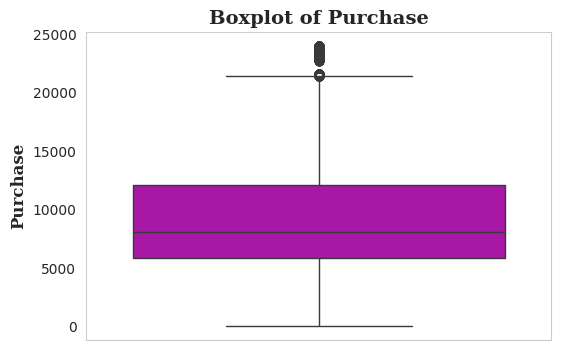

In [164]:
# Visualizing the dependent feature "Purchase" for Outliers

fig = plt.figure(figsize = (6,4))
sns.set_style("whitegrid")

sns.boxplot(df["Purchase"], color = 'm')
plt.title("Boxplot of Purchase", fontweight = "bold", fontsize = 14, fontname = 'Serif')
plt.ylabel('Purchase', fontsize = 12, fontweight = "bold", fontname = 'Serif')

plt.grid(False)
plt.show()

In [165]:
# Outlier Treatment: Remove top 5% & bottom 1% of the Column Outlier values

q1 = np.percentile(df['Purchase'],25)
q3 = np.percentile(df['Purchase'],75)
print(f'q1: {q1}')
print(f'q3: {q3}')

IQR= q3 - q1
print(f'IQR: {IQR}')

upper_bound = q3 + (1.5 * IQR)
lower_bound = q1 - (1.5 * IQR)

print(f'Upper Bound = {upper_bound}')
print(f'Lower Bound = {lower_bound}')
print('Median =', df['Purchase'].median())
print("Percentage of values exhibiting outlier behaviour: ", round((len(df.loc[df['Purchase'] > upper_bound])/ len(df)) * 100,2))

q1: 5823.0
q3: 12054.0
IQR: 6231.0
Upper Bound = 21400.5
Lower Bound = -3523.5
Median = 8047.0
Percentage of values exhibiting outlier behaviour:  0.49


**Around 0.49% of the values in the 'Purchase' column exhibit outlier behavior. Removing these outliers is not a good option since these values could potentially provide valuable insights and prove useful for conducting sample analysis using central limit theorem and confidence interval.**

# **Part B3: Inferences:**

In [166]:
# Average Purchase per Gender
avg_female_purchase = df[df['Gender'] == 'F']['Purchase'].mean()
avg_male_purchase = df[df['Gender'] == 'M']['Purchase'].mean()

print("Average Purchase Amount for Female Customers: ", round(avg_female_purchase,2))
print("Average Purchase Amount for Male Customers: ", round(avg_male_purchase,2))

Average Purchase Amount for Female Customers:  8734.57
Average Purchase Amount for Male Customers:  9437.53


In [167]:
# Average Purchase per Marital Status
avg_unmarried_purchase = df[df['Marital_Status'] == "Unmarried"]['Purchase'].mean()
avg_married_purchase = df[df['Marital_Status'] == "Married"]['Purchase'].mean()

print("Average Purchase Amount for Unmarried Customers: ", round(avg_unmarried_purchase,2))
print("Average Purchase Amount for Married Customers: ", round(avg_married_purchase,2))

Average Purchase Amount for Unmarried Customers:  9265.91
Average Purchase Amount for Married Customers:  9261.17


In [168]:
# Average Purchase per City Category
avg_purchase_cityA = df[df['City_Category'] == 'A']['Purchase'].mean()
avg_purchase_cityB = df[df['City_Category'] == 'B']['Purchase'].mean()
avg_purchase_cityC = df[df['City_Category'] == 'C']['Purchase'].mean()

print("Average Purchase Amount for City Category A: ", round(avg_purchase_cityA,2))
print("Average Purchase Amount for City Category B: ", round(avg_purchase_cityB,2))
print("Average Purchase Amount for City Category C: ", round(avg_purchase_cityC,2))

Average Purchase Amount for City Category A:  8911.94
Average Purchase Amount for City Category B:  9151.3
Average Purchase Amount for City Category C:  9719.92


In [169]:
# Average Purchase per Age Category
avg_purchase_age_0_17 = df[df['Age'] == '0-17']['Purchase'].mean()
avg_purchase_age_18_25 = df[df['Age'] == '18-25']['Purchase'].mean()
avg_purchase_age_26_35 = df[df['Age'] == '26-35']['Purchase'].mean()
avg_purchase_age_36_45 = df[df['Age'] == '36-45']['Purchase'].mean()
avg_purchase_age_46_50 = df[df['Age'] == '46-50']['Purchase'].mean()
avg_purchase_age_51_55 = df[df['Age'] == '51-55']['Purchase'].mean()
avg_purchase_age_55plus = df[df['Age'] == '55+']['Purchase'].mean()

print("Average Purchase Amount for Age Category 0-17: ", round(avg_purchase_age_0_17,2))
print("Average Purchase Amount for Age Category 18-25: ", round(avg_purchase_age_18_25,2))
print("Average Purchase Amount for Age Category 26-35: ", round(avg_purchase_age_26_35,2))
print("Average Purchase Amount for Age Category 36-45: ", round(avg_purchase_age_36_45,2))
print("Average Purchase Amount for Age Category 46-50: ", round(avg_purchase_age_46_50,2))
print("Average Purchase Amount for Age Category 51-55: ", round(avg_purchase_age_51_55,2))
print("Average Purchase Amount for Age Category 55+: ", round(avg_purchase_age_55plus,2))

Average Purchase Amount for Age Category 0-17:  8933.46
Average Purchase Amount for Age Category 18-25:  9169.66
Average Purchase Amount for Age Category 26-35:  9252.69
Average Purchase Amount for Age Category 36-45:  9331.35
Average Purchase Amount for Age Category 46-50:  9208.63
Average Purchase Amount for Age Category 51-55:  9534.81
Average Purchase Amount for Age Category 55+:  9336.28


In [170]:
# Average Purchase per Year of Stay in the Current City
avg_purchase_stay_incity_0year = df[df['Stay_In_Current_City_Years'] == '0']['Purchase'].mean()
avg_purchase_stay_incity_1year = df[df['Stay_In_Current_City_Years'] == '1']['Purchase'].mean()
avg_purchase_stay_incity_2year = df[df['Stay_In_Current_City_Years'] == '2']['Purchase'].mean()
avg_purchase_stay_incity_3year = df[df['Stay_In_Current_City_Years'] == '3']['Purchase'].mean()
avg_purchase_stay_incity_4plus = df[df['Stay_In_Current_City_Years'] == '4+']['Purchase'].mean()

print("Average Purchase Amount for Stay in Current City Year 0: ", round(avg_purchase_stay_incity_0year,2))
print("Average Purchase Amount for Stay in Current City Year 1: ", round(avg_purchase_stay_incity_1year,2))
print("Average Purchase Amount for Stay in Current City Year 2: ", round(avg_purchase_stay_incity_2year,2))
print("Average Purchase Amount for Stay in Current City Year 3: ", round(avg_purchase_stay_incity_3year,2))
print("Average Purchase Amount for Stay in Current City Year 4+: ", round(avg_purchase_stay_incity_4plus,2))

Average Purchase Amount for Stay in Current City Year 0:  9180.08
Average Purchase Amount for Stay in Current City Year 1:  9250.15
Average Purchase Amount for Stay in Current City Year 2:  9320.43
Average Purchase Amount for Stay in Current City Year 3:  9286.9
Average Purchase Amount for Stay in Current City Year 4+:  9275.6


In [171]:
# Average Purchase per Product Category
df.groupby(['Product_Category'])['Purchase'].mean().sort_values(ascending=False)

Product_Category
10    19675.570927
7     16365.689600
6     15838.478550
9     15537.375610
15    14780.451828
16    14766.037037
1     13606.218596
14    13141.625739
2     11251.935384
17    10170.759516
3     10096.705734
8      7498.958078
5      6240.088178
11     4685.268456
18     2972.864320
4      2329.659491
12     1350.859894
13      722.400613
20      370.481176
19       37.041797
Name: Purchase, dtype: float64

### **The population means of the dependent variable, Purchase, for male customers, female customers, married and unmarried customers as well as customers from city tier A, B and C, each age category from 0-17 years to 55+ years, years of stay in the current city and each product category has been calculated in this section.**

# **Part C: Univariate and Bivariate Analysis:**

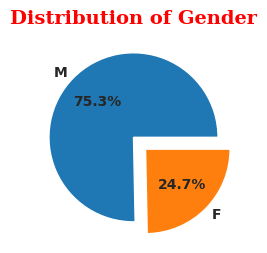

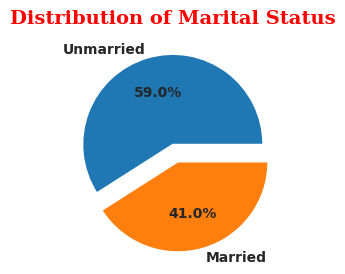

In [172]:
# Distribution of Gender and Marital Status

plt.figure(figsize = (6,6))
sns.set_style("dark")
explode = (0, 0.2)

plt.subplot(1,2,1)
plt.pie(df['Gender'].value_counts(), labels = df['Gender'].value_counts().index, explode = explode, autopct = '%1.1f%%', textprops = {'weight': 'bold'})
plt.title('Distribution of Gender', fontsize = 14, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.grid(False)
plt.show()

plt.subplot(1,2,2)
plt.pie(df['Marital_Status'].value_counts(), labels = df['Marital_Status'].value_counts().index, explode = explode, autopct = '%1.1f%%', textprops = {'weight': 'bold'})
plt.title('Distribution of Marital Status', fontsize = 14, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.grid(False)
plt.show()

### **Distribution of Gender and Marital Status shows that in majority, Male customers and Unmarried customers spent the most.**

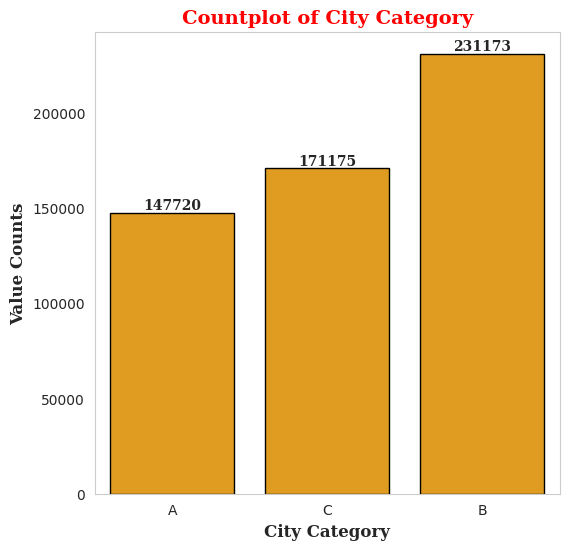

In [173]:
# Countplot of City Category

plt.figure(figsize = (6,6))
sns.set_style("whitegrid")
ax = sns.countplot(data = df, x = df['City_Category'], edgecolor = 'black', color = 'orange')

# Display values on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type = 'edge', fontsize = 10, fontweight = 'bold', fontname = 'Serif')

plt.title('Countplot of City Category', fontsize = 14, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.xlabel('City Category', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Value Counts', fontsize = 12, fontweight = 'bold', fontname = 'Serif')

plt.grid(False)
plt.show()

### **City tier B has the highest customers while City tier A has the lowest customers.**

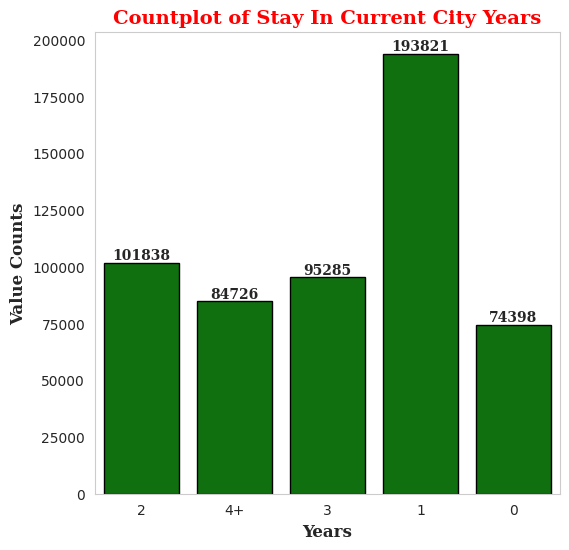

In [174]:
# Countplot of Stay In Current City Years

plt.figure(figsize = (6,6))
sns.set_style("whitegrid")
ax = sns.countplot(data = df, x = df['Stay_In_Current_City_Years'], edgecolor = 'black', color = 'green')

# Display values on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type = 'edge', fontsize = 10, fontweight = 'bold', fontname = 'Serif')

plt.title('Countplot of Stay In Current City Years', fontsize = 14, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.xlabel('Years', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Value Counts', fontsize = 12, fontweight = 'bold', fontname = 'Serif')

plt.grid(False)
plt.show()

### **Customers living in a city for 1 year spent the most compared to other stay in current city categories suggesting that moving to a new city requires a wide range of products to settle.**

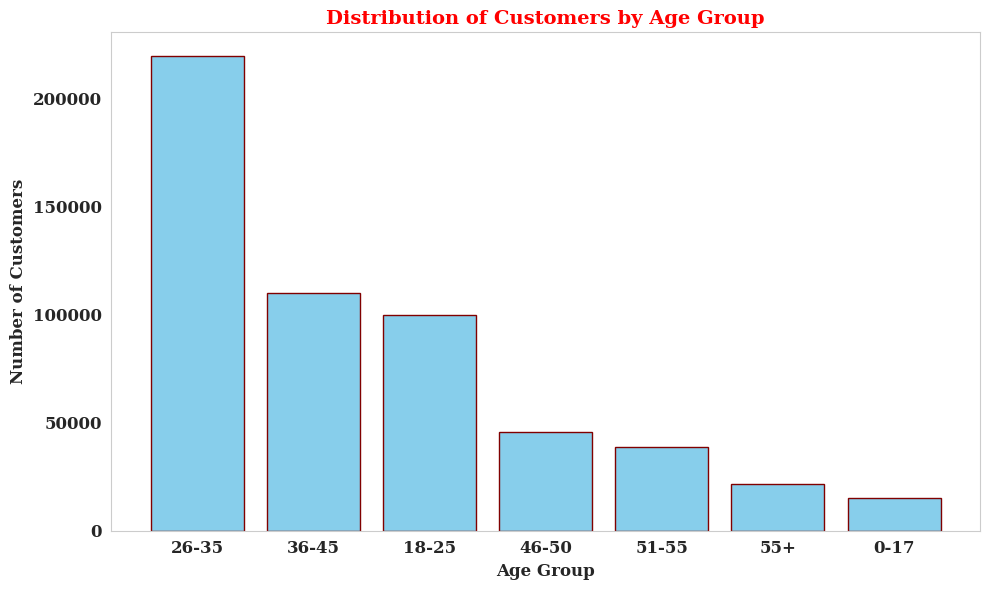

In [175]:
# Distribution of Customers by Age Category

labels = df['Age'].value_counts().index
values = df['Age'].value_counts().values

plt.figure(figsize = (10, 6))
plt.bar(labels, values, color = 'skyblue', edgecolor = 'maroon')
plt.title('Distribution of Customers by Age Group', fontsize = 14, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.xlabel('Age Group', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Number of Customers', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xticks(fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.yticks(fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.tight_layout()
plt.grid(False)
plt.show()

### **The age group having the highest number of customers is 26-35 years while the lowest is 0-17 years. As the age group increases from 25 years, the number of customers decreases which is a potential concern.**

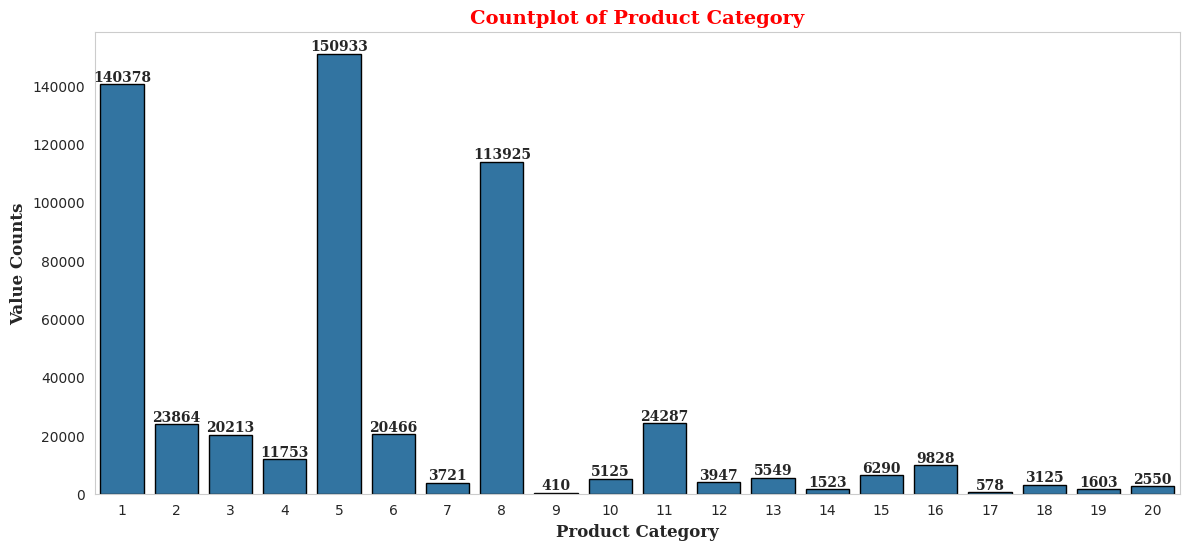

In [176]:
# Countplot of Product Category

plt.figure(figsize = (14,6))
sns.set_style("whitegrid")
ax = sns.countplot(data = df, x = df['Product_Category'], edgecolor = 'black')

# Display values on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type = 'edge', fontsize = 10, fontweight = 'bold', fontname = 'Serif')

plt.title('Countplot of Product Category', fontsize = 14, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.xlabel('Product Category', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Value Counts', fontsize = 12, fontweight = 'bold', fontname = 'Serif')

plt.grid(False)
plt.show()

### **Categories 1,5,8,11 and 2 are the top 5 product categories.**

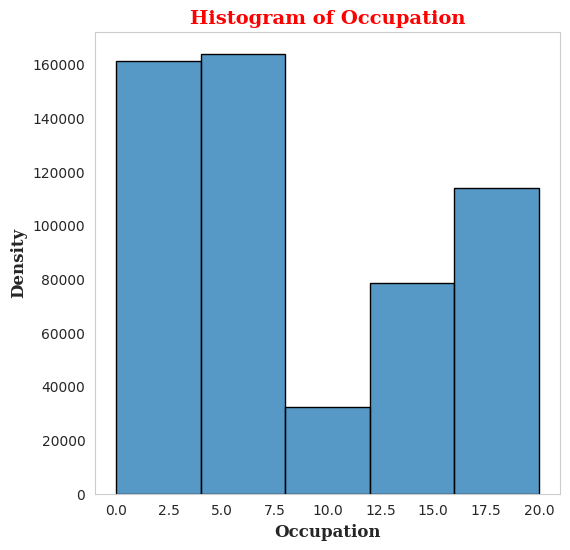

In [177]:
# Histogram of Occupation

plt.figure(figsize = (6,6))
sns.set_style("whitegrid")
sns.histplot(data = df, x = df['Occupation'], bins = 5, edgecolor = 'black')

plt.title('Histogram of Occupation', fontsize = 14, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.xlabel('Occupation', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 12, fontweight = 'bold', fontname = 'Serif')

plt.grid(False)
plt.show()

### **The histogram of occupation shows a right-skewed distribution, with peak frequencies exceeding 14,000 in the 0-5 range and steadily declining to around 2,000 for values above 15.**

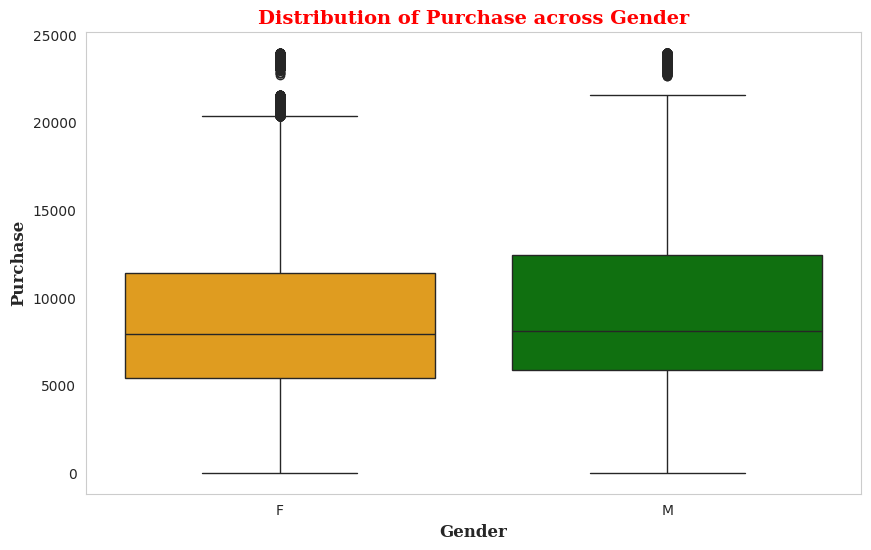

In [178]:
# Distribution of Purchase across Gender

plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
sns.boxplot(data = df, x = 'Gender', y = 'Purchase', palette = ['orange', 'green'])
plt.title("Distribution of Purchase across Gender", fontsize = 14, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.xlabel('Gender', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Purchase', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)
plt.show()

### **The box plot illustrates similar purchase distributions for females (median ~11,000) and males (median ~11,000), with overlapping interquartile ranges from ~10,000 to ~12,000 and comparable outlier spreads.**

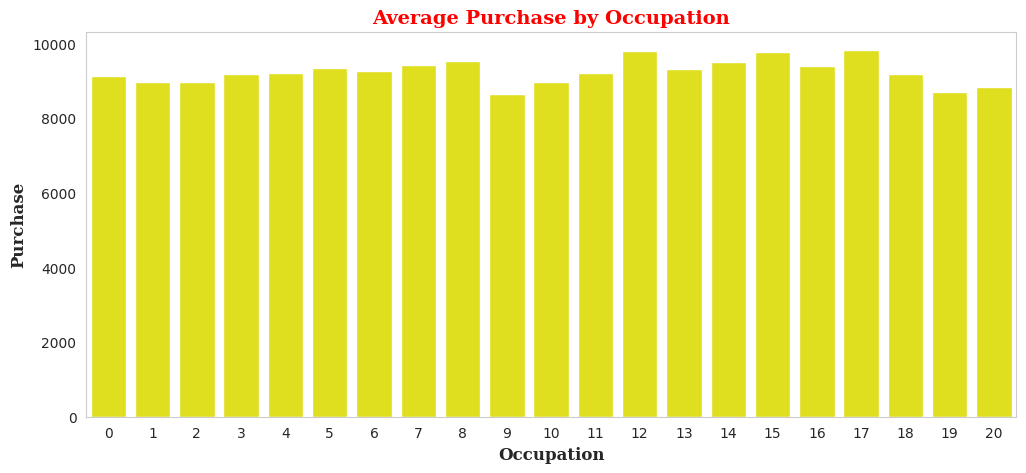

In [179]:
# Occupation vs Purchase (Avg Purchase by Occupation)

plt.figure(figsize = (12,5))
sns.set_style("whitegrid")
sns.barplot(data = df, x = 'Occupation', y = 'Purchase', estimator = np.mean, ci = None, color = 'yellow')
plt.title("Average Purchase by Occupation", fontsize = 14, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.xlabel('Occupation', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Purchase', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)
plt.show()

### **The bar chart displays average purchase amounts by occupation (0-20 i.e., 21 categories), fluctuating between roughly 8,000 and 10,000, with peaks near 10,000 for occupations 11 and 17, and dips around 8,000 for 6 and 9.**

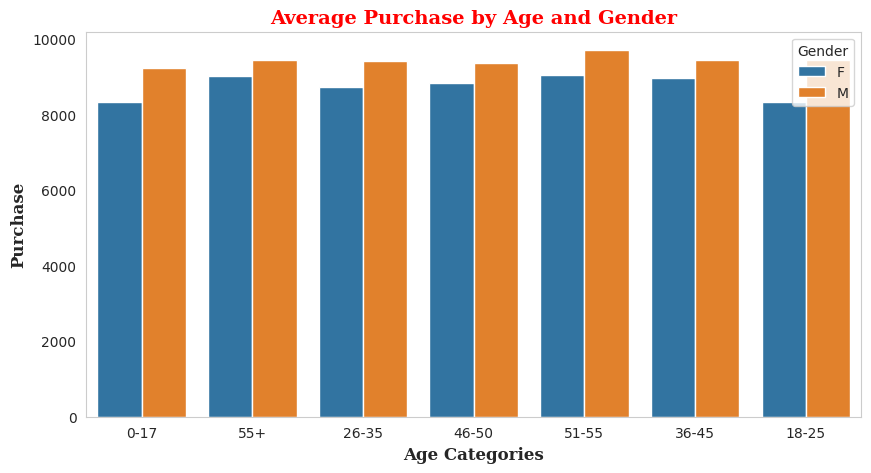

In [180]:
# Grouped Barplot of Age vs Gender on Purchase

plt.figure(figsize = (10,5))
sns.set_style("whitegrid")
sns.barplot(data = df, x = 'Age', y = 'Purchase', hue = 'Gender', estimator = np.mean, ci = None)
plt.title("Average Purchase by Age and Gender", fontsize = 14, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.xlabel('Age Categories', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Purchase', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)
plt.show()

### **The grouped bar chart illustrates average purchase amounts by age categories (0-17 to 55+) and gender, with males (orange) generally exhibiting slightly higher averages (around 9,000-9,500) than females (blue, around 8,500-9,000) across most groups, peaking for males in the 51-55 and 55+ categories.**

<Figure size 1000x500 with 0 Axes>

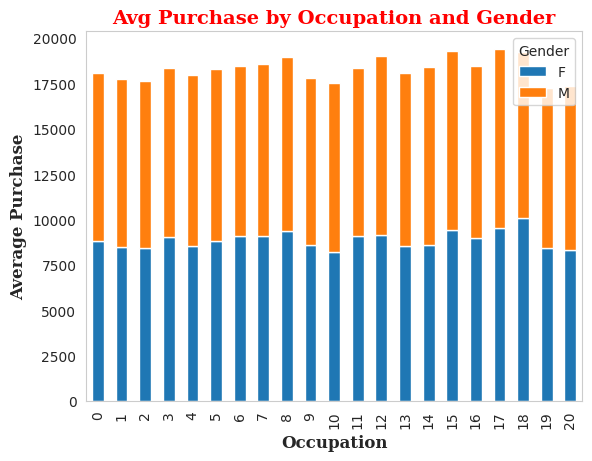

In [181]:
# Average Purchase by Occupation and Gender

plt.figure(figsize = (10,5))
sns.set_style("whitegrid")
pivot_data = df.groupby(['Occupation','Gender'])['Purchase'].mean().unstack()
pivot_data.plot(kind = 'bar', stacked = True)
plt.title("Avg Purchase by Occupation and Gender", fontsize = 14, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.xlabel('Occupation', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel("Average Purchase", fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)
plt.show()

### **The stacked bar chart depicts average purchase amounts by occupation (0-20) and gender, with blue representing females (lower segment) and orange males (upper segment), showing totals ranging from approximately 16,000 to 20,000, with males often contributing more and peaks around occupations 11, 15, and 17.**

<Figure size 1000x500 with 0 Axes>

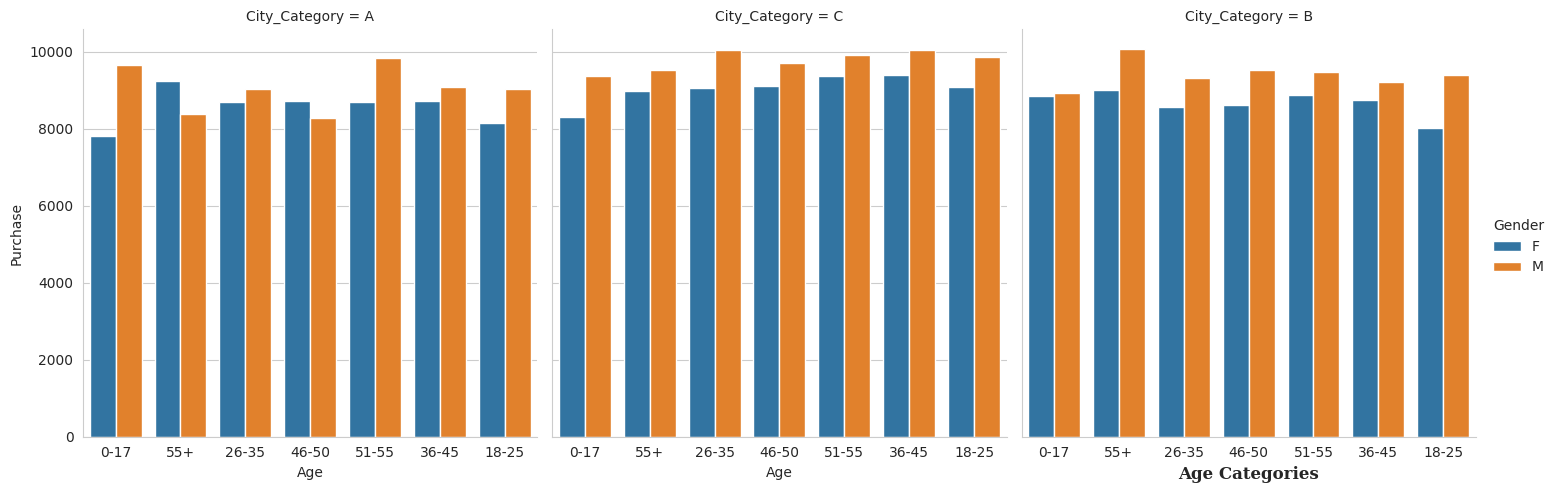

In [182]:
# Age vs Occupation vs Purchase
# Average Purchase by Age, Gender, and City Category

plt.figure(figsize = (10,5))
sns.set_style("whitegrid")
sns.catplot(x = "Age", y = "Purchase", hue = "Gender", col = "City_Category",
                data = df, kind = "bar", estimator = np.mean, ci = None, height = 5, aspect = 1)
plt.xlabel('Age Categories', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel("Average Purchase", fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)
plt.show()

### **The faceted grouped bar chart illustrates average purchase amounts by age categories (0-17 to 55+) and gender across city categories A, C, and B, with males (orange) generally showing higher spending (around 8,500-10,000) than females (blue, around 7,500-9,500) in most groups, and subtle differences in levels between cities.**

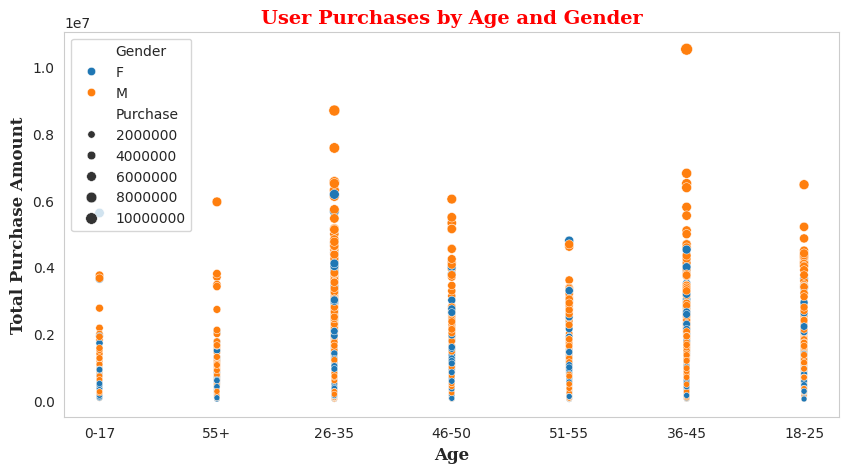

In [183]:
# Scatterplot of User Purchases by Age and Gender

plt.figure(figsize = (10,5))
sns.set_style("whitegrid")
user_data = df.groupby(['User_ID','Age','Gender'])['Purchase'].sum().reset_index()

sns.scatterplot(x = 'Age', y = 'Purchase', hue = 'Gender', size = 'Purchase', data = user_data)
plt.title("User Purchases by Age and Gender", fontsize = 14, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.xlabel('Age', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Total Purchase Amount', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)
plt.show()

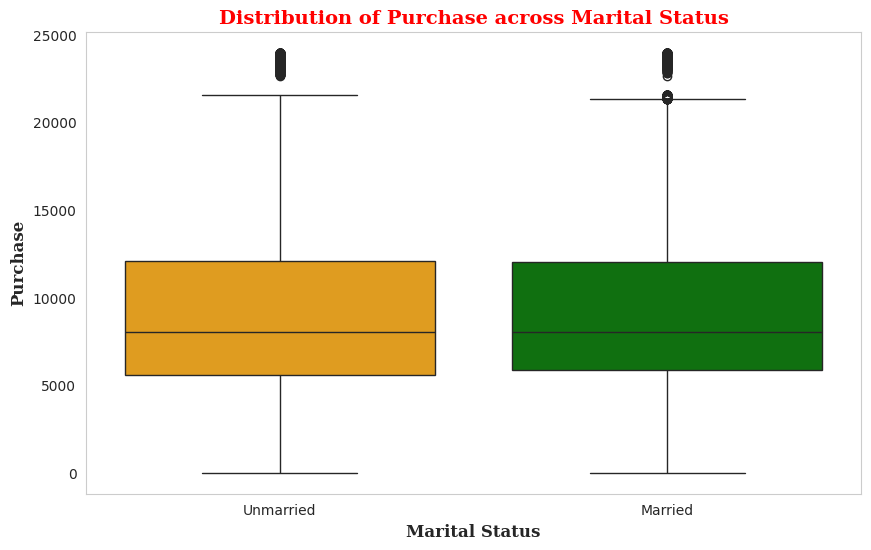

In [184]:
# Distribution of Purchase across Marital Status

plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
sns.boxplot(data = df, x = 'Marital_Status', y = 'Purchase', palette = ['orange', 'green'])
plt.title("Distribution of Purchase across Marital Status", fontsize = 14, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.xlabel('Marital Status', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Purchase', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)
plt.show()

### **The box plot illustrates nearly identical purchase distributions for unmarried (gold, median ~9,000) and married (green, median ~9,000) statuses, with overlapping interquartile ranges from ~5,000 to ~12,000 and similar outlier spreads up to 25,000.**

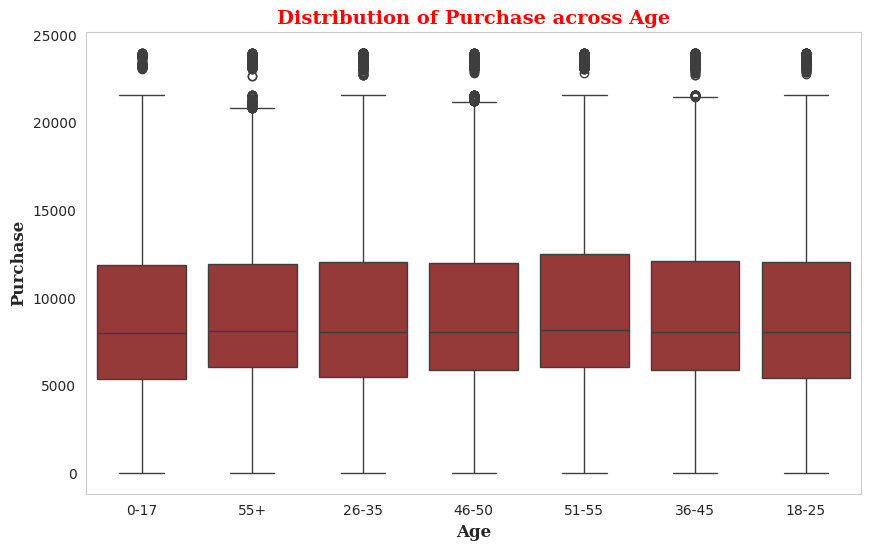

In [185]:
# Distribution of Purchase across Age

plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
sns.boxplot(data = df, x = 'Age', y = 'Purchase', color = 'brown')
plt.title("Distribution of Purchase across Age", fontsize = 14, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.xlabel('Age', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Purchase', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)
plt.show()

### **The boxplot shows that purchase amounts are fairly similar across all age groups, with comparable medians and spreads, though each group has high-value outliers.**

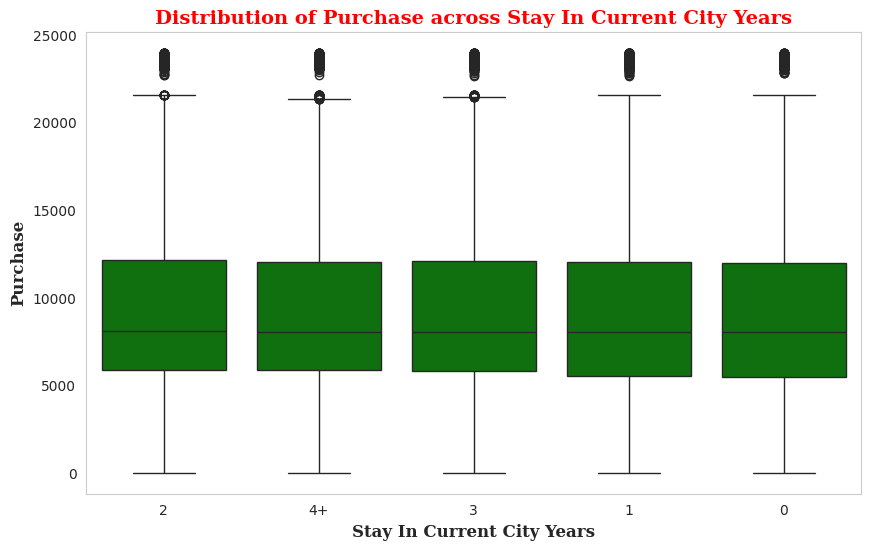

In [186]:
# Distribution of Purchase across Stay In Current City Years

plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
sns.boxplot(data = df, x = 'Stay_In_Current_City_Years', y = 'Purchase', color = 'green')
plt.title("Distribution of Purchase across Stay In Current City Years", fontsize = 14, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.xlabel('Stay In Current City Years', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Purchase', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)
plt.show()

### **The box plot shows similar purchase distributions across stay in current city years (0-4+), with medians around 9,000-10,000, interquartile ranges from ~5,000 to ~12,000, and comparable outlier spreads up to 25,000 for all categories.**

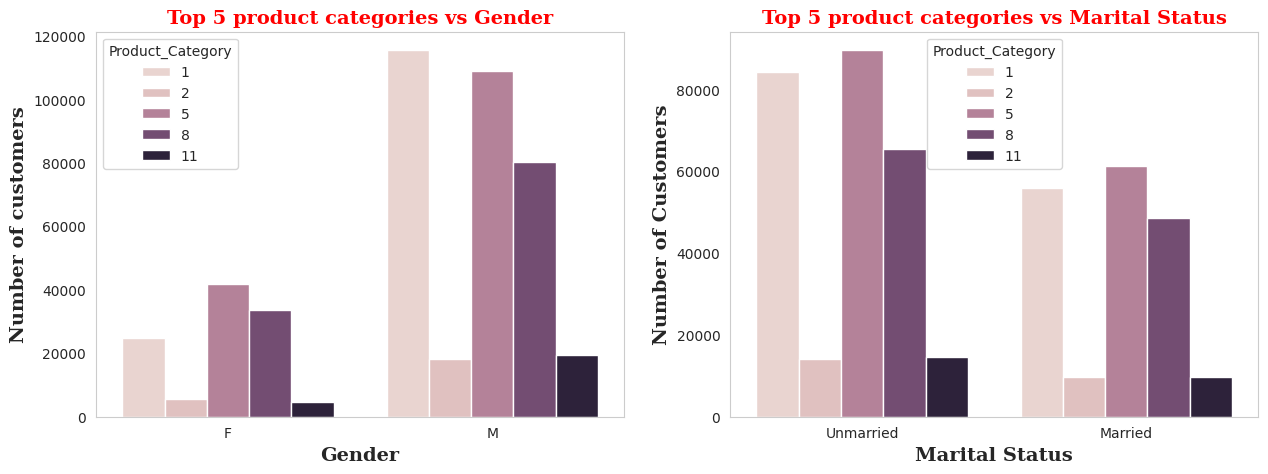

In [187]:
# Distribution of top 5 Product Categories across Gender and Marital Status

pdt_cat_top5 = df['Product_Category'].value_counts().index[:5]
df_top5 = df[df['Product_Category'].isin(pdt_cat_top5)]

# Countplot for top 5 product category vs Gender
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot(data = df_top5, x = 'Gender', hue = 'Product_Category')
plt.title('Top 5 product categories vs Gender', fontsize = 14, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.xlabel('Gender', fontsize = 14, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Number of customers', fontsize = 14, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

# Countplot for top 5 product category vs Martial Status
plt.subplot(1,2,2)
sns.countplot(data = df_top5, x = 'Marital_Status', hue = 'Product_Category')
plt.title('Top 5 product categories vs Marital Status', fontsize = 14, fontweight = 'bold', fontname = 'Serif', color = 'red')
plt.xlabel('Marital Status', fontsize = 14, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Number of Customers', fontsize = 14, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.show()

### **The graphs show that males and unmarried customers dominate purchases across the top 5 product categories, with Product Categories 1, 2, and 5,8 ad 11 being the most popular overall.**

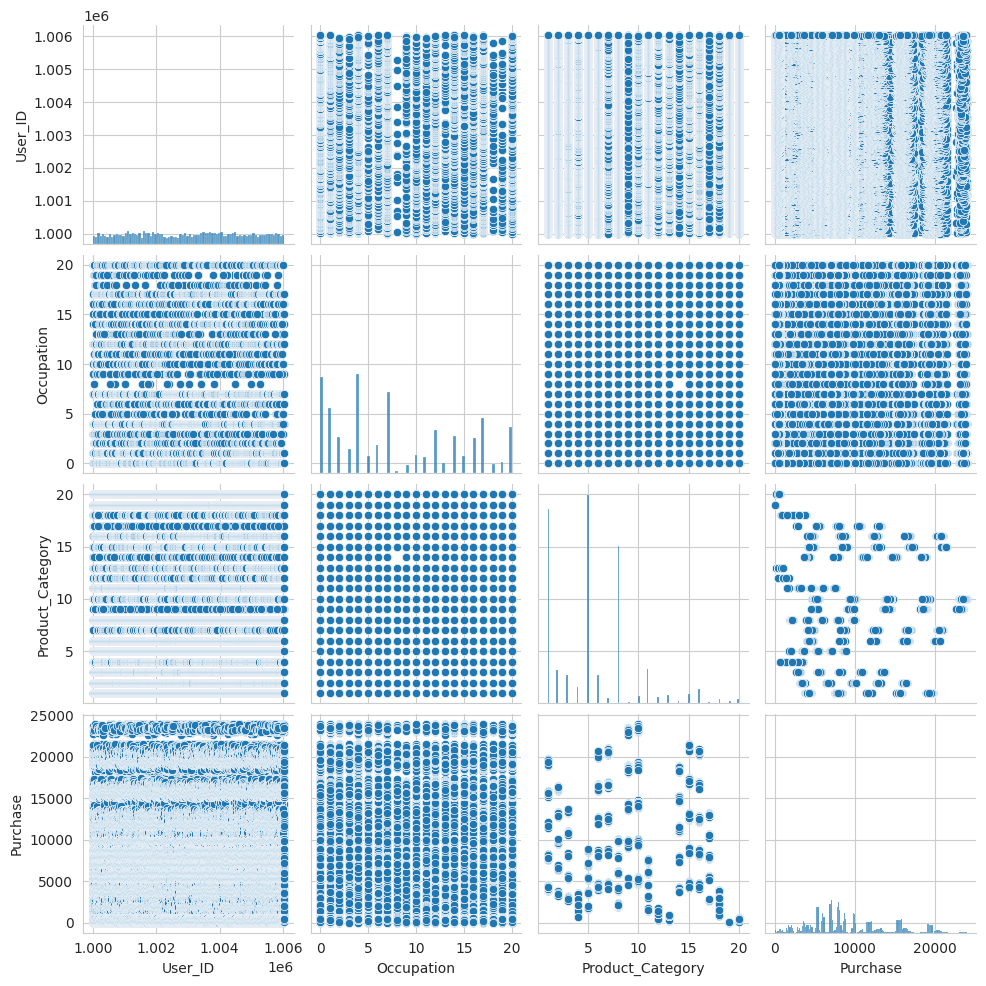

In [188]:
# Pairplot
sns.pairplot(df)

# **Part D: Sample Analysis Using Central Limit Theorem and Confidence Interval**

# **Part D1: Gender - Male Customers**

In [189]:
# CLT and CI for Male Customers
df_male_cust_purch = df[df['Gender'] == 'M']['Purchase']
df_male_cust_purch

4          7969
5         15227
6         19215
7         15854
8         15686
          ...  
550057       61
550058      121
550060      494
550062      473
550063      368
Name: Purchase, Length: 414259, dtype: int64

In [190]:
print("Mean of the purchase amounts for male customers: ", df_male_cust_purch.mean())

Mean of the purchase amounts for male customers:  9437.526040472265


# **Sample size 1000 and computing means through bootstraping**

CI for male customers at 90% for a sample size of 1000: [9167.66 , 9702.68]
CI for male customers at 95% for a sample size of 1000: [9119.68 , 9753.31]
CI for male customers at 99% for a sample size of 1000: [9018.62 , 9843.08]


Standard error for male customers for a sample size of 1000: 161.03
Standard error for male customers for a sample size of 1000 using bootstrapping: 161.19




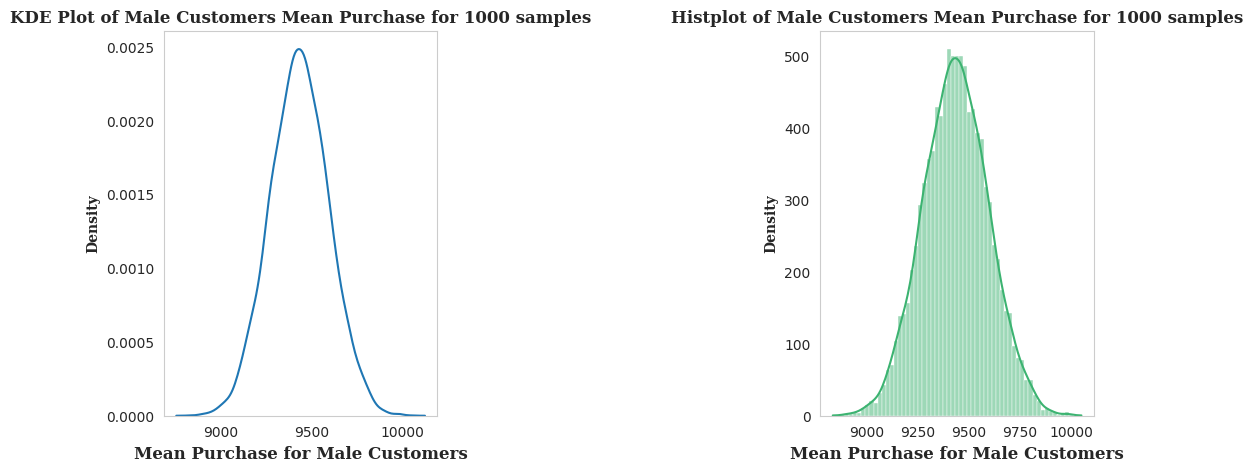

In [191]:
# Computing means through bootstrapping
male_cust_mean_purch_1000_samp = []
for i in range(10000):
    bootstraped_sample = np.random.choice(df_male_cust_purch, size = 1000)
    bootstraped_mean = np.mean(bootstraped_sample)
    male_cust_mean_purch_1000_samp.append(bootstraped_mean)

# Calculating CI at 90%,95% and 99%
CI_male_cust_90_pct = np.percentile(male_cust_mean_purch_1000_samp,[5,95])
CI_male_cust_95_pct = np.percentile(male_cust_mean_purch_1000_samp,[2.5,97.5])
CI_male_cust_99_pct = np.percentile(male_cust_mean_purch_1000_samp,[0.5,99.5])

print(f'CI for male customers at 90% for a sample size of 1000: [{np.round(CI_male_cust_90_pct[0],2)} , {np.round(CI_male_cust_90_pct[1],2)}]')
print(f'CI for male customers at 95% for a sample size of 1000: [{np.round(CI_male_cust_95_pct[0],2)} , {np.round(CI_male_cust_95_pct[1],2)}]')
print(f'CI for male customers at 99% for a sample size of 1000: [{np.round(CI_male_cust_99_pct[0],2)} , {np.round(CI_male_cust_99_pct[1],2)}]')
print("\n")

std_error_male_cust_1000_samples = (df_male_cust_purch.std() / np.sqrt(1000))
print(f'Standard error for male customers for a sample size of 1000: {np.round(std_error_male_cust_1000_samples,2)}')

# Standard error using bootstraping
print(f'Standard error for male customers for a sample size of 1000 using bootstrapping: {np.round(pd.Series(male_cust_mean_purch_1000_samp).std(),2)}')
print("\n")

# Visualizing the CI for male customers for a sample size of 1000 with a KDE plot and a histplot
sns.set_style("whitegrid")
plt.figure(figsize = (12,5))

plt.subplot(1,3,1)
sns.kdeplot(male_cust_mean_purch_1000_samp)
plt.title('KDE Plot of Male Customers Mean Purchase for 1000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Male Customers', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.subplot(1,3,3)
sns.histplot(male_cust_mean_purch_1000_samp, kde = True, color = 'mediumseagreen')
plt.title('Histplot of Male Customers Mean Purchase for 1000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Male Customers', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.show()

# **Sample size 2500 and computing means through bootstraping**

CI for male customers at 90% for a sample size of 2500: [9270.08 , 9607.06]
CI for male customers at 95% for a sample size of 2500: [9236.36 , 9637.38]
CI for male customers at 99% for a sample size of 2500: [9174.52 , 9702.83]


Standard error for male customers for a sample size of 2500: 101.84
Standard error for male customers for a sample size of 2500 using bootstrapping: 101.87




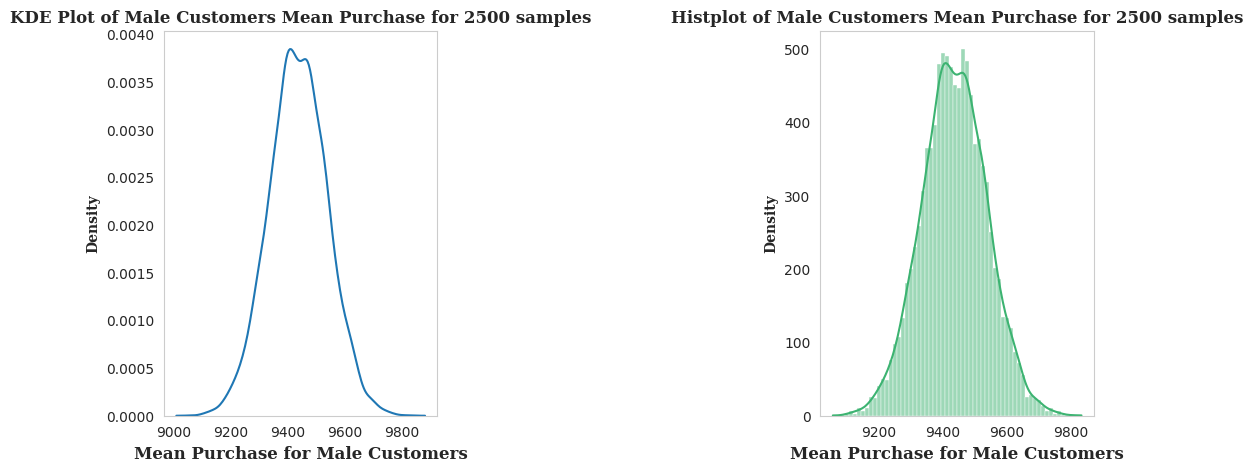

In [192]:
# Computing means through bootstrapping
male_cust_mean_purch_2500_samp = []
for i in range(10000):
    bootstraped_sample = np.random.choice(df_male_cust_purch, size = 2500)
    bootstraped_mean = np.mean(bootstraped_sample)
    male_cust_mean_purch_2500_samp.append(bootstraped_mean)

# Calculating CI at 90%,95% and 99%
CI_male_cust_90_pct = np.percentile(male_cust_mean_purch_2500_samp,[5,95])
CI_male_cust_95_pct = np.percentile(male_cust_mean_purch_2500_samp,[2.5,97.5])
CI_male_cust_99_pct = np.percentile(male_cust_mean_purch_2500_samp,[0.5,99.5])

print(f'CI for male customers at 90% for a sample size of 2500: [{np.round(CI_male_cust_90_pct[0],2)} , {np.round(CI_male_cust_90_pct[1],2)}]')
print(f'CI for male customers at 95% for a sample size of 2500: [{np.round(CI_male_cust_95_pct[0],2)} , {np.round(CI_male_cust_95_pct[1],2)}]')
print(f'CI for male customers at 99% for a sample size of 2500: [{np.round(CI_male_cust_99_pct[0],2)} , {np.round(CI_male_cust_99_pct[1],2)}]')
print("\n")

std_error_male_cust_2500_samples = (df_male_cust_purch.std() / np.sqrt(2500))
print(f'Standard error for male customers for a sample size of 2500: {np.round(std_error_male_cust_2500_samples,2)}')

# Standard error using bootstraping
print(f'Standard error for male customers for a sample size of 2500 using bootstrapping: {np.round(pd.Series(male_cust_mean_purch_2500_samp).std(),2)}')
print("\n")

# Visualizing the CI for male customers for a sample size of 2500 with a KDE plot and a histplot
sns.set_style("whitegrid")
plt.figure(figsize = (12,5))

plt.subplot(1,3,1)
sns.kdeplot(male_cust_mean_purch_2500_samp)
plt.title('KDE Plot of Male Customers Mean Purchase for 2500 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Male Customers', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.subplot(1,3,3)
sns.histplot(male_cust_mean_purch_2500_samp, kde = True, color = 'mediumseagreen')
plt.title('Histplot of Male Customers Mean Purchase for 2500 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Male Customers', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.show()

# **Sample size 5000 and computing means through bootstrapping**

CI for male customers at 90% for a sample size of 5000: [9319.98 , 9553.25]
CI for male customers at 95% for a sample size of 5000: [9297.34 , 9574.45]
CI for male customers at 99% for a sample size of 5000: [9256.92 , 9621.52]


Standard error for male customers for a sample size of 5000: 72.01
Standard error for male customers for a sample size of 5000 using bootstrapping: 71.33




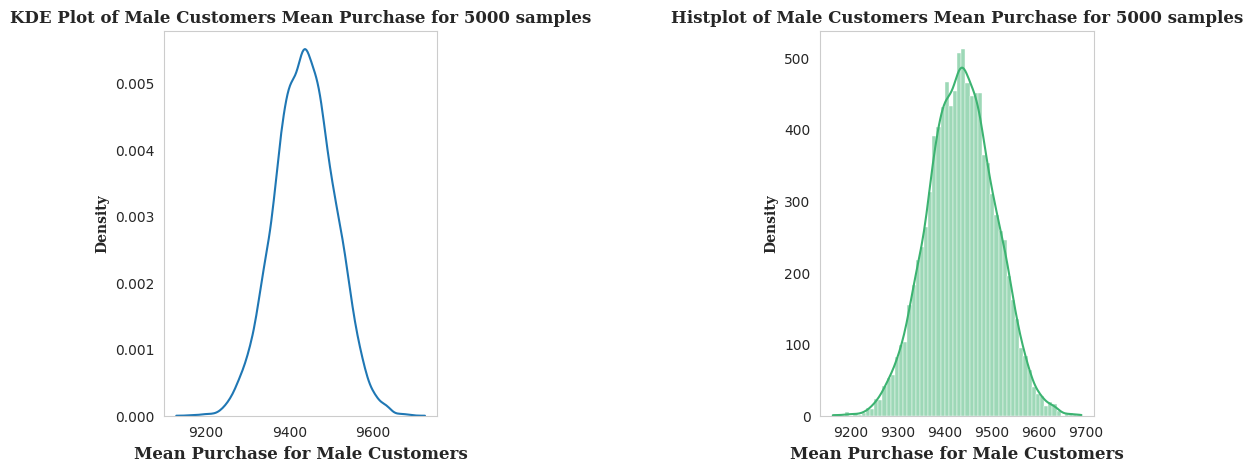

In [193]:
# Computing means through bootstrapping
male_cust_mean_purch_5000_samp = []
for i in range(10000):
    bootstraped_sample = np.random.choice(df_male_cust_purch, size = 5000)
    bootstraped_mean = np.mean(bootstraped_sample)
    male_cust_mean_purch_5000_samp.append(bootstraped_mean)

# Calculating CI at 90%,95% and 99%
CI_male_cust_90_pct = np.percentile(male_cust_mean_purch_5000_samp,[5,95])
CI_male_cust_95_pct = np.percentile(male_cust_mean_purch_5000_samp,[2.5,97.5])
CI_male_cust_99_pct = np.percentile(male_cust_mean_purch_5000_samp,[0.5,99.5])

print(f'CI for male customers at 90% for a sample size of 5000: [{np.round(CI_male_cust_90_pct[0],2)} , {np.round(CI_male_cust_90_pct[1],2)}]')
print(f'CI for male customers at 95% for a sample size of 5000: [{np.round(CI_male_cust_95_pct[0],2)} , {np.round(CI_male_cust_95_pct[1],2)}]')
print(f'CI for male customers at 99% for a sample size of 5000: [{np.round(CI_male_cust_99_pct[0],2)} , {np.round(CI_male_cust_99_pct[1],2)}]')
print("\n")

std_error_male_cust_5000_samples = (df_male_cust_purch.std() / np.sqrt(5000))
print(f'Standard error for male customers for a sample size of 5000: {np.round(std_error_male_cust_5000_samples,2)}')

# Standard error using bootstraping
print(f'Standard error for male customers for a sample size of 5000 using bootstrapping: {np.round(pd.Series(male_cust_mean_purch_5000_samp).std(),2)}')
print("\n")

# Visualizing the CI for male customers for a sample size of 5000 with a KDE plot and a histplot
sns.set_style("whitegrid")
plt.figure(figsize = (12,5))

plt.subplot(1,3,1)
sns.kdeplot(male_cust_mean_purch_5000_samp)
plt.title('KDE Plot of Male Customers Mean Purchase for 5000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Male Customers', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.subplot(1,3,3)
sns.histplot(male_cust_mean_purch_5000_samp, kde = True, color = 'mediumseagreen')
plt.title('Histplot of Male Customers Mean Purchase for 5000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Male Customers', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.show()

# **Part D1: Gender - Female Customers**

In [194]:
# CLT and CI for Female Customers
df_female_cust_purch = df[df['Gender'] == 'F']['Purchase']
df_female_cust_purch

0          8370
1         15200
2          1422
3          1057
14         5378
          ...  
550061      599
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 135809, dtype: int64

In [195]:
print("Mean of the purchase amounts for female customers: ", df_female_cust_purch.mean())

Mean of the purchase amounts for female customers:  8734.565765155476


# **Sample size 1000 and computing means through bootstraping**

CI for female customers at 90% for a sample size of 1000: [8487.34 , 8986.39]
CI for female customers at 95% for a sample size of 1000: [8437.21 , 9034.54]
CI for female customers at 99% for a sample size of 1000: [8351.52 , 9134.07]


Standard error for female customers for a sample size of 1000: 150.75
Standard error for female customers for a sample size of 1000 using bootstrapping: 152.07




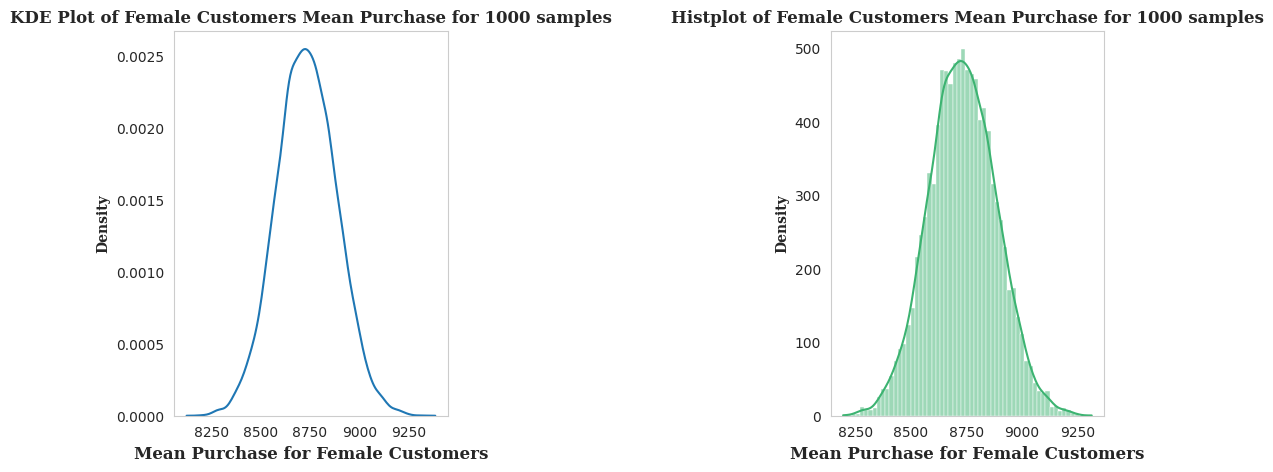

In [196]:
# Computing means through bootstrapping
female_cust_mean_purch_1000_samp = []
for i in range(10000):
    bootstraped_sample = np.random.choice(df_female_cust_purch, size = 1000)
    bootstraped_mean = np.mean(bootstraped_sample)
    female_cust_mean_purch_1000_samp.append(bootstraped_mean)

# Calculating CI at 90%,95% and 99%
CI_female_cust_90_pct = np.percentile(female_cust_mean_purch_1000_samp,[5,95])
CI_female_cust_95_pct = np.percentile(female_cust_mean_purch_1000_samp,[2.5,97.5])
CI_female_cust_99_pct = np.percentile(female_cust_mean_purch_1000_samp,[0.5,99.5])

print(f'CI for female customers at 90% for a sample size of 1000: [{np.round(CI_female_cust_90_pct[0],2)} , {np.round(CI_female_cust_90_pct[1],2)}]')
print(f'CI for female customers at 95% for a sample size of 1000: [{np.round(CI_female_cust_95_pct[0],2)} , {np.round(CI_female_cust_95_pct[1],2)}]')
print(f'CI for female customers at 99% for a sample size of 1000: [{np.round(CI_female_cust_99_pct[0],2)} , {np.round(CI_female_cust_99_pct[1],2)}]')
print("\n")

std_error_female_cust_1000_samples = (df_female_cust_purch.std() / np.sqrt(1000))
print(f'Standard error for female customers for a sample size of 1000: {np.round(std_error_female_cust_1000_samples,2)}')

# Standard error using bootstraping
print(f'Standard error for female customers for a sample size of 1000 using bootstrapping: {np.round(pd.Series(female_cust_mean_purch_1000_samp).std(),2)}')
print("\n")

# Visualizing the CI for female customers for a sample size of 1000 with a KDE plot and a histplot
sns.set_style("whitegrid")
plt.figure(figsize = (12,5))

plt.subplot(1,3,1)
sns.kdeplot(female_cust_mean_purch_1000_samp)
plt.title('KDE Plot of Female Customers Mean Purchase for 1000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Female Customers', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.subplot(1,3,3)
sns.histplot(female_cust_mean_purch_1000_samp, kde = True, color = 'mediumseagreen')
plt.title('Histplot of Female Customers Mean Purchase for 1000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Female Customers', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.show()

# **Sample size 2500 and computing means through bootstraping**

CI for female customers at 90% for a sample size of 2500: [8579.27 , 8891.66]
CI for female customers at 95% for a sample size of 2500: [8552.6 , 8923.02]
CI for female customers at 99% for a sample size of 2500: [8495.52 , 8983.01]


Standard error for female customers for a sample size of 2500: 95.34
Standard error for female customers for a sample size of 2500 using bootstrapping: 95.29




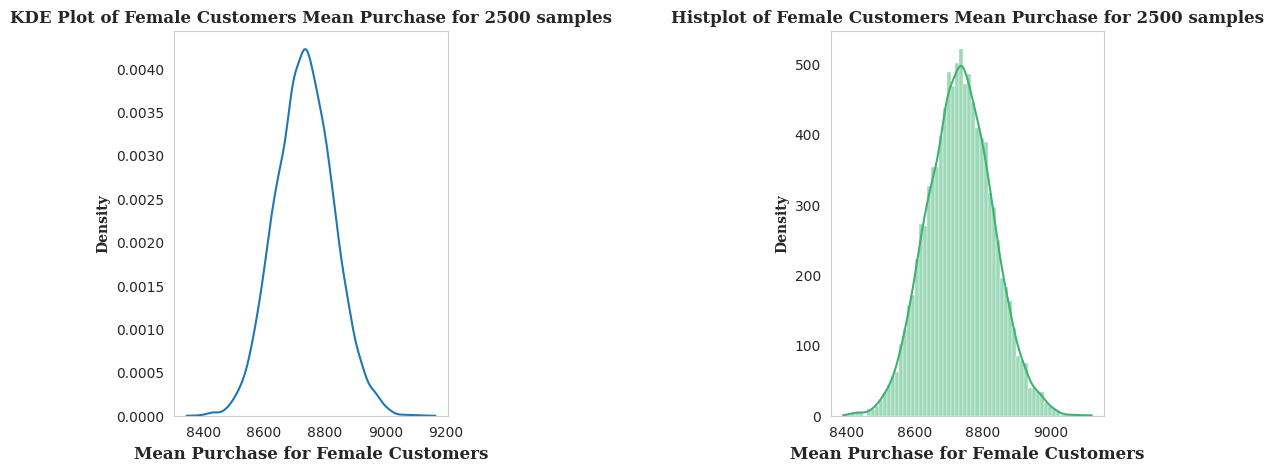

In [197]:
# Computing means through bootstrapping
female_cust_mean_purch_2500_samp = []
for i in range(10000):
    bootstraped_sample = np.random.choice(df_female_cust_purch, size = 2500)
    bootstraped_mean = np.mean(bootstraped_sample)
    female_cust_mean_purch_2500_samp.append(bootstraped_mean)

# Calculating CI at 90%,95% and 99%
CI_female_cust_90_pct = np.percentile(female_cust_mean_purch_2500_samp,[5,95])
CI_female_cust_95_pct = np.percentile(female_cust_mean_purch_2500_samp,[2.5,97.5])
CI_female_cust_99_pct = np.percentile(female_cust_mean_purch_2500_samp,[0.5,99.5])

print(f'CI for female customers at 90% for a sample size of 2500: [{np.round(CI_female_cust_90_pct[0],2)} , {np.round(CI_female_cust_90_pct[1],2)}]')
print(f'CI for female customers at 95% for a sample size of 2500: [{np.round(CI_female_cust_95_pct[0],2)} , {np.round(CI_female_cust_95_pct[1],2)}]')
print(f'CI for female customers at 99% for a sample size of 2500: [{np.round(CI_female_cust_99_pct[0],2)} , {np.round(CI_female_cust_99_pct[1],2)}]')
print("\n")

std_error_female_cust_2500_samples = (df_female_cust_purch.std() / np.sqrt(2500))
print(f'Standard error for female customers for a sample size of 2500: {np.round(std_error_female_cust_2500_samples,2)}')

# Standard error using bootstraping
print(f'Standard error for female customers for a sample size of 2500 using bootstrapping: {np.round(pd.Series(female_cust_mean_purch_2500_samp).std(),2)}')
print("\n")

# Visualizing the CI for female customers for a sample size of 2500 with a KDE plot and a histplot
sns.set_style("whitegrid")
plt.figure(figsize = (12,5))

plt.subplot(1,3,1)
sns.kdeplot(female_cust_mean_purch_2500_samp)
plt.title('KDE Plot of Female Customers Mean Purchase for 2500 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Female Customers', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.subplot(1,3,3)
sns.histplot(female_cust_mean_purch_2500_samp, kde = True, color = 'mediumseagreen')
plt.title('Histplot of Female Customers Mean Purchase for 2500 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Female Customers', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.show()

# **Sample size 5000 and computing means through bootstraping**

CI for female customers at 90% for a sample size of 5000: [8623.07 , 8845.9]
CI for female customers at 95% for a sample size of 5000: [8601.39 , 8870.27]
CI for female customers at 99% for a sample size of 5000: [8560.84 , 8908.87]


Standard error for female customers for a sample size of 5000: 67.42
Standard error for female customers for a sample size of 5000 using bootstrapping: 67.97




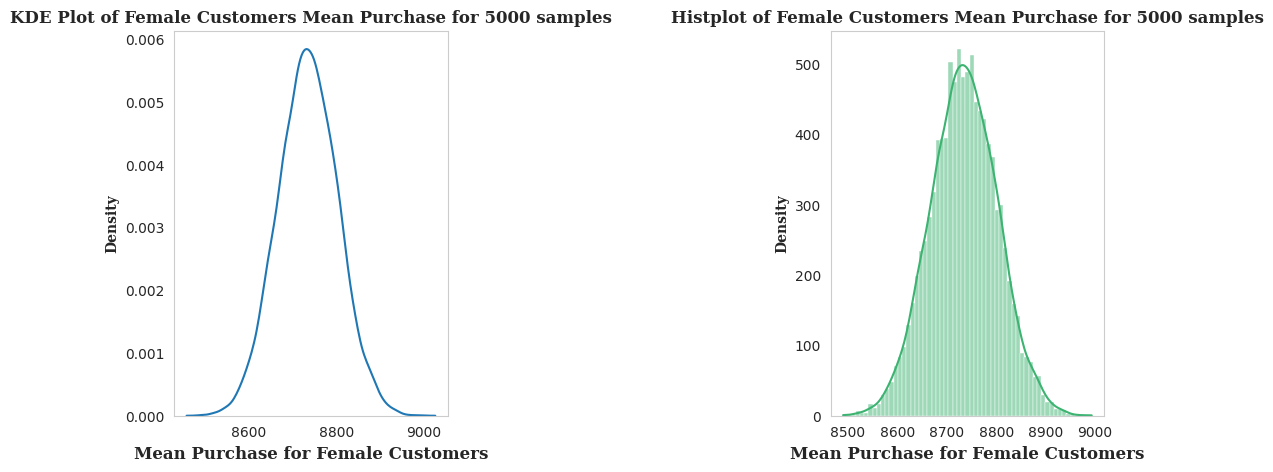

In [198]:
# Computing means through bootstrapping
female_cust_mean_purch_5000_samp = []
for i in range(10000):
    bootstraped_sample = np.random.choice(df_female_cust_purch, size = 5000)
    bootstraped_mean = np.mean(bootstraped_sample)
    female_cust_mean_purch_5000_samp.append(bootstraped_mean)

# Calculating CI at 90%,95% and 99%
CI_female_cust_90_pct = np.percentile(female_cust_mean_purch_5000_samp,[5,95])
CI_female_cust_95_pct = np.percentile(female_cust_mean_purch_5000_samp,[2.5,97.5])
CI_female_cust_99_pct = np.percentile(female_cust_mean_purch_5000_samp,[0.5,99.5])

print(f'CI for female customers at 90% for a sample size of 5000: [{np.round(CI_female_cust_90_pct[0],2)} , {np.round(CI_female_cust_90_pct[1],2)}]')
print(f'CI for female customers at 95% for a sample size of 5000: [{np.round(CI_female_cust_95_pct[0],2)} , {np.round(CI_female_cust_95_pct[1],2)}]')
print(f'CI for female customers at 99% for a sample size of 5000: [{np.round(CI_female_cust_99_pct[0],2)} , {np.round(CI_female_cust_99_pct[1],2)}]')
print("\n")

std_error_female_cust_5000_samples = (df_female_cust_purch.std() / np.sqrt(5000))
print(f'Standard error for female customers for a sample size of 5000: {np.round(std_error_female_cust_5000_samples,2)}')

# Standard error using bootstraping
print(f'Standard error for female customers for a sample size of 5000 using bootstrapping: {np.round(pd.Series(female_cust_mean_purch_5000_samp).std(),2)}')
print("\n")

# Visualizing the CI for female customers for a sample size of 5000 with a KDE plot and a histplot
sns.set_style("whitegrid")
plt.figure(figsize = (12,5))

plt.subplot(1,3,1)
sns.kdeplot(female_cust_mean_purch_5000_samp)
plt.title('KDE Plot of Female Customers Mean Purchase for 5000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Female Customers', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.subplot(1,3,3)
sns.histplot(female_cust_mean_purch_5000_samp, kde = True, color = 'mediumseagreen')
plt.title('Histplot of Female Customers Mean Purchase for 5000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Female Customers', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.show()

# **Part D2: Marital Status - Married Customers**

In [199]:
# CLT and CI for Married Customers
df_married_cust_purch = df[df['Marital_Status'] == 'Married']['Purchase']
df_married_cust_purch

6         19215
7         15854
8         15686
9          7871
10         5254
          ...  
550060      494
550061      599
550063      368
550065      137
550067      490
Name: Purchase, Length: 225337, dtype: int64

In [200]:
print("Mean of the purchase amounts for married customers: ", df_married_cust_purch.mean())

Mean of the purchase amounts for married customers:  9261.174574082374


# **Sample size 1000 and computing means through bootstraping**

CI for married customers at 90% for a sample size of 1000: [9001.95 , 9526.51]
CI for married customers at 95% for a sample size of 1000: [8956.5 , 9575.18]
CI for married customers at 99% for a sample size of 1000: [8853.06 , 9671.92]


Standard error for married customers for a sample size of 1000: 158.65
Standard error for married customers for a sample size of 1000 using bootstrapping: 160.05




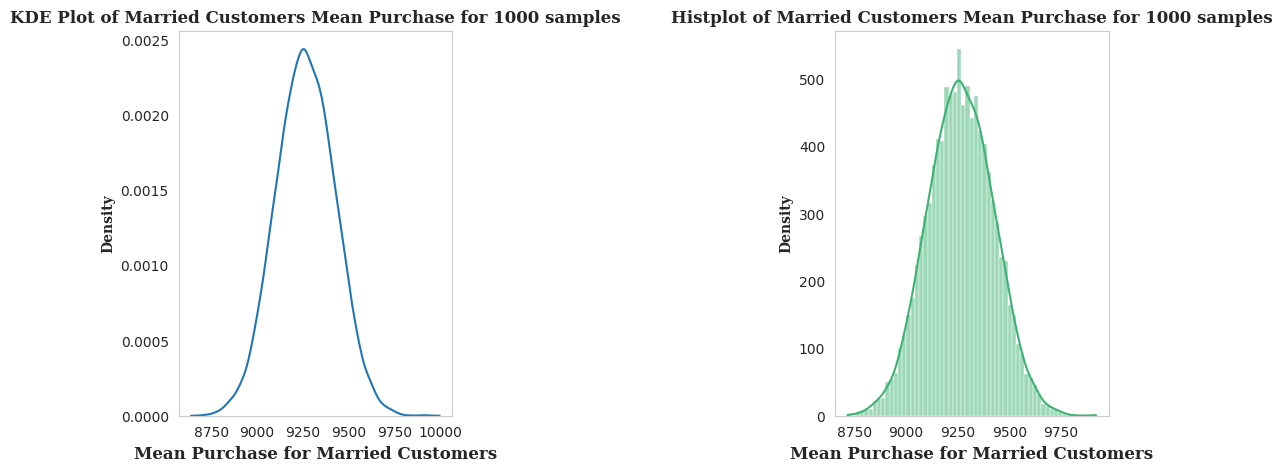

In [201]:
# Computing means through bootstrapping
married_cust_mean_purch_1000_samp = []
for i in range(10000):
    bootstraped_sample = np.random.choice(df_married_cust_purch, size = 1000)
    bootstraped_mean = np.mean(bootstraped_sample)
    married_cust_mean_purch_1000_samp.append(bootstraped_mean)

# Calculating CI at 90%,95% and 99%
CI_married_cust_90_pct = np.percentile(married_cust_mean_purch_1000_samp,[5,95])
CI_married_cust_95_pct = np.percentile(married_cust_mean_purch_1000_samp,[2.5,97.5])
CI_married_cust_99_pct = np.percentile(married_cust_mean_purch_1000_samp,[0.5,99.5])

print(f'CI for married customers at 90% for a sample size of 1000: [{np.round(CI_married_cust_90_pct[0],2)} , {np.round(CI_married_cust_90_pct[1],2)}]')
print(f'CI for married customers at 95% for a sample size of 1000: [{np.round(CI_married_cust_95_pct[0],2)} , {np.round(CI_married_cust_95_pct[1],2)}]')
print(f'CI for married customers at 99% for a sample size of 1000: [{np.round(CI_married_cust_99_pct[0],2)} , {np.round(CI_married_cust_99_pct[1],2)}]')
print("\n")

std_error_married_cust_1000_samples = (df_married_cust_purch.std() / np.sqrt(1000))
print(f'Standard error for married customers for a sample size of 1000: {np.round(std_error_married_cust_1000_samples,2)}')

# Standard error using bootstraping
print(f'Standard error for married customers for a sample size of 1000 using bootstrapping: {np.round(pd.Series(married_cust_mean_purch_1000_samp).std(),2)}')
print("\n")

# Visualizing the CI for married customers for a sample size of 1000 with a KDE plot and a histplot
sns.set_style("whitegrid")
plt.figure(figsize = (12,5))

plt.subplot(1,3,1)
sns.kdeplot(married_cust_mean_purch_1000_samp)
plt.title('KDE Plot of Married Customers Mean Purchase for 1000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Married Customers', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.subplot(1,3,3)
sns.histplot(married_cust_mean_purch_1000_samp, kde = True, color = 'mediumseagreen')
plt.title('Histplot of Married Customers Mean Purchase for 1000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Married Customers', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.show()

# **Sample size 2500 and computing means through bootstraping**

CI for married customers at 90% for a sample size of 2500: [9097.1 , 9428.6]
CI for married customers at 95% for a sample size of 2500: [9065.55 , 9461.97]
CI for married customers at 99% for a sample size of 2500: [9002.87 , 9530.63]


Standard error for married customers for a sample size of 2500: 100.34
Standard error for married customers for a sample size of 2500 using bootstrapping: 100.74




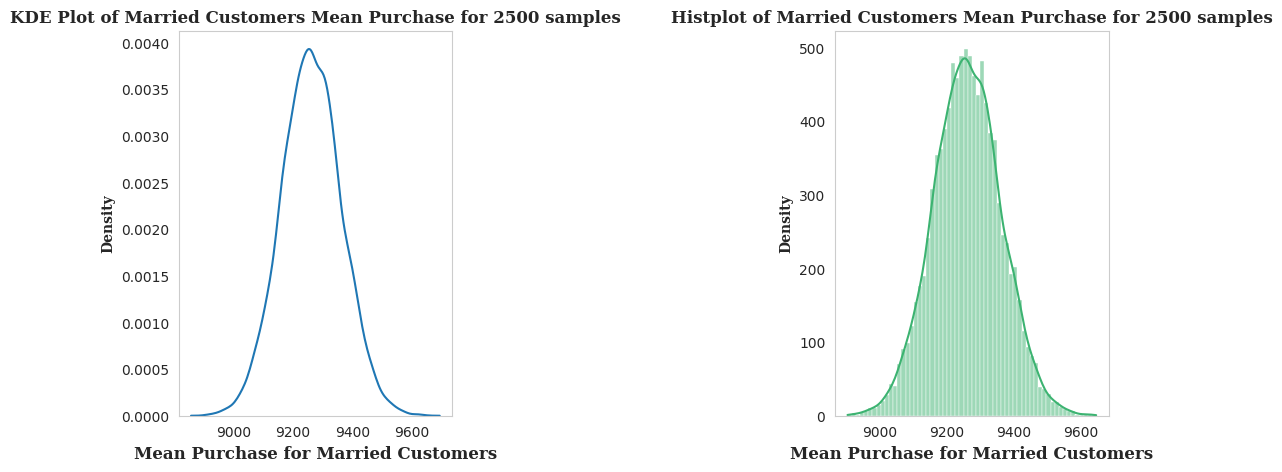

In [202]:
# Computing means through bootstrapping
married_cust_mean_purch_2500_samp = []
for i in range(10000):
    bootstraped_sample = np.random.choice(df_married_cust_purch, size = 2500)
    bootstraped_mean = np.mean(bootstraped_sample)
    married_cust_mean_purch_2500_samp.append(bootstraped_mean)

# Calculating CI at 90%,95% and 99%
CI_married_cust_90_pct = np.percentile(married_cust_mean_purch_2500_samp,[5,95])
CI_married_cust_95_pct = np.percentile(married_cust_mean_purch_2500_samp,[2.5,97.5])
CI_married_cust_99_pct = np.percentile(married_cust_mean_purch_2500_samp,[0.5,99.5])

print(f'CI for married customers at 90% for a sample size of 2500: [{np.round(CI_married_cust_90_pct[0],2)} , {np.round(CI_married_cust_90_pct[1],2)}]')
print(f'CI for married customers at 95% for a sample size of 2500: [{np.round(CI_married_cust_95_pct[0],2)} , {np.round(CI_married_cust_95_pct[1],2)}]')
print(f'CI for married customers at 99% for a sample size of 2500: [{np.round(CI_married_cust_99_pct[0],2)} , {np.round(CI_married_cust_99_pct[1],2)}]')
print("\n")

std_error_married_cust_2500_samples = (df_married_cust_purch.std() / np.sqrt(2500))
print(f'Standard error for married customers for a sample size of 2500: {np.round(std_error_married_cust_2500_samples,2)}')

# Standard error using bootstraping
print(f'Standard error for married customers for a sample size of 2500 using bootstrapping: {np.round(pd.Series(married_cust_mean_purch_2500_samp).std(),2)}')
print("\n")

# Visualizing the CI for married customers for a sample size of 2500 with a KDE plot and a histplot
sns.set_style("whitegrid")
plt.figure(figsize = (12,5))

plt.subplot(1,3,1)
sns.kdeplot(married_cust_mean_purch_2500_samp)
plt.title('KDE Plot of Married Customers Mean Purchase for 2500 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Married Customers', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.subplot(1,3,3)
sns.histplot(married_cust_mean_purch_2500_samp, kde = True, color = 'mediumseagreen')
plt.title('Histplot of Married Customers Mean Purchase for 2500 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Married Customers', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.show()

# **Sample size 5000 and computing means through bootstraping**

CI for married customers at 90% for a sample size of 5000: [9144.26 , 9377.11]
CI for married customers at 95% for a sample size of 5000: [9123.1 , 9400.77]
CI for married customers at 99% for a sample size of 5000: [9075.63 , 9445.54]


Standard error for married customers for a sample size of 5000: 70.95
Standard error for married customers for a sample size of 5000 using bootstrapping: 71.09




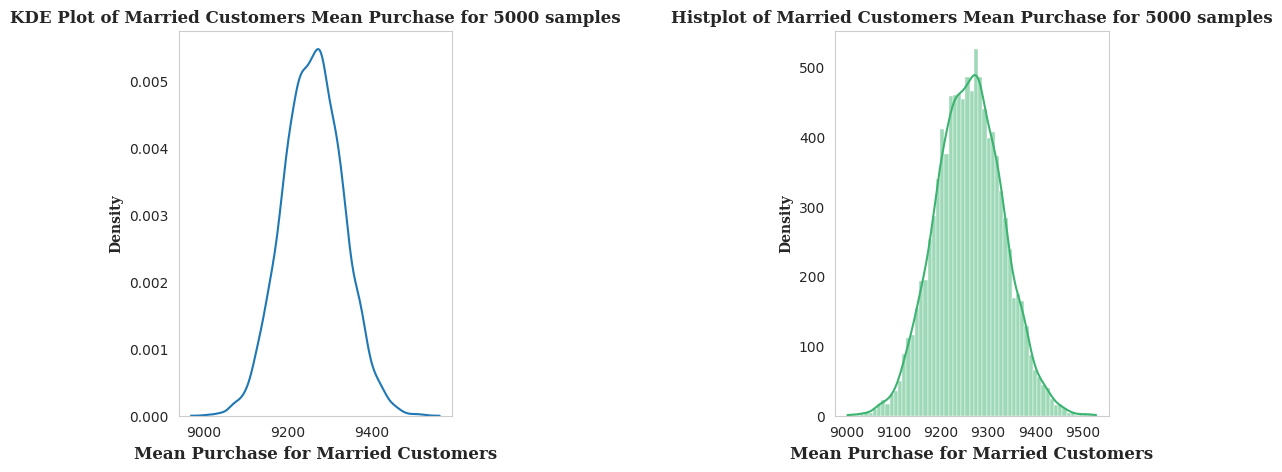

In [203]:
# Computing means through bootstrapping
married_cust_mean_purch_5000_samp = []
for i in range(10000):
    bootstraped_sample = np.random.choice(df_married_cust_purch, size = 5000)
    bootstraped_mean = np.mean(bootstraped_sample)
    married_cust_mean_purch_5000_samp.append(bootstraped_mean)

# Calculating CI at 90%,95% and 99%
CI_married_cust_90_pct = np.percentile(married_cust_mean_purch_5000_samp,[5,95])
CI_married_cust_95_pct = np.percentile(married_cust_mean_purch_5000_samp,[2.5,97.5])
CI_married_cust_99_pct = np.percentile(married_cust_mean_purch_5000_samp,[0.5,99.5])

print(f'CI for married customers at 90% for a sample size of 5000: [{np.round(CI_married_cust_90_pct[0],2)} , {np.round(CI_married_cust_90_pct[1],2)}]')
print(f'CI for married customers at 95% for a sample size of 5000: [{np.round(CI_married_cust_95_pct[0],2)} , {np.round(CI_married_cust_95_pct[1],2)}]')
print(f'CI for married customers at 99% for a sample size of 5000: [{np.round(CI_married_cust_99_pct[0],2)} , {np.round(CI_married_cust_99_pct[1],2)}]')
print("\n")

std_error_married_cust_5000_samples = (df_married_cust_purch.std() / np.sqrt(5000))
print(f'Standard error for married customers for a sample size of 5000: {np.round(std_error_married_cust_5000_samples,2)}')

# Standard error using bootstraping
print(f'Standard error for married customers for a sample size of 5000 using bootstrapping: {np.round(pd.Series(married_cust_mean_purch_5000_samp).std(),2)}')
print("\n")

# Visualizing the CI for married customers for a sample size of 5000 with a KDE plot and a histplot
sns.set_style("whitegrid")
plt.figure(figsize = (12,5))

plt.subplot(1,3,1)
sns.kdeplot(married_cust_mean_purch_5000_samp)
plt.title('KDE Plot of Married Customers Mean Purchase for 5000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Married Customers', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.subplot(1,3,3)
sns.histplot(married_cust_mean_purch_5000_samp, kde = True, color = 'mediumseagreen')
plt.title('Histplot of Married Customers Mean Purchase for 5000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Married Customers', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.show()

# **Part D2: Marital Status - Unmarried Customers**

In [204]:
# CLT and CI for Unmarried Customers
df_unmarried_cust_purch = df[df['Marital_Status'] == 'Unmarried']['Purchase']
df_unmarried_cust_purch

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550056      254
550059       48
550062      473
550064      371
550066      365
Name: Purchase, Length: 324731, dtype: int64

In [205]:
print("Mean of the purchase amounts for unmarried customers: ", df_unmarried_cust_purch.mean())

Mean of the purchase amounts for unmarried customers:  9265.907618921507


# **Sample size 1000 and computing means through bootstraping**

CI for unmarried customers at 90% for a sample size of 1000: [9003.51 , 9529.86]
CI for unmarried customers at 95% for a sample size of 1000: [8951.51 , 9582.93]
CI for unmarried customers at 99% for a sample size of 1000: [8854.99 , 9675.29]


Standard error for unmarried customers for a sample size of 1000: 158.98
Standard error for unmarried customers for a sample size of 1000 using bootstrapping: 160.12




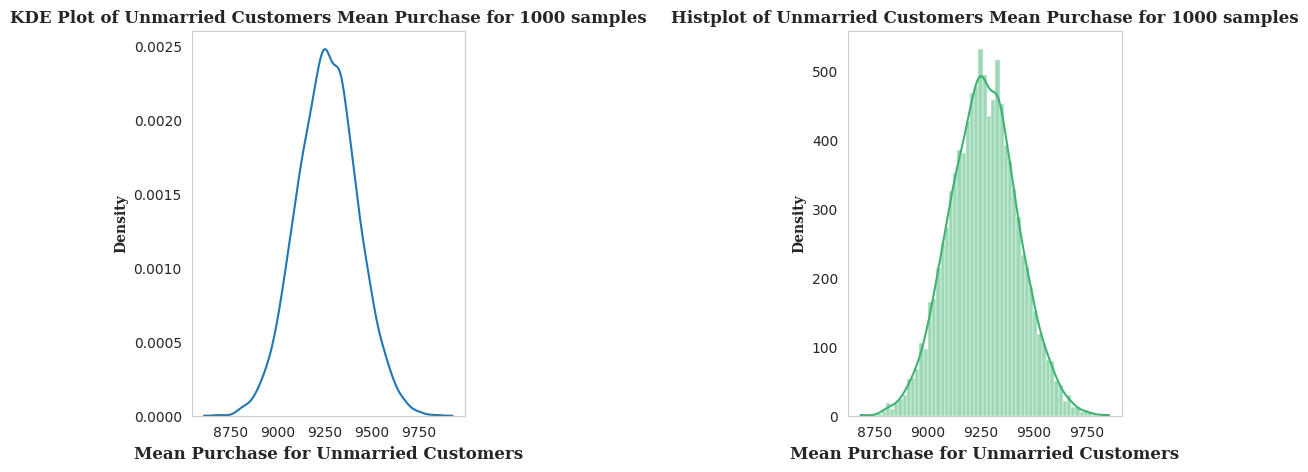

In [206]:
# Computing means through bootstrapping
unmarried_cust_mean_purch_1000_samp = []
for i in range(10000):
    bootstraped_sample = np.random.choice(df_unmarried_cust_purch, size = 1000)
    bootstraped_mean = np.mean(bootstraped_sample)
    unmarried_cust_mean_purch_1000_samp.append(bootstraped_mean)

# Calculating CI at 90%,95% and 99%
CI_unmarried_cust_90_pct = np.percentile(unmarried_cust_mean_purch_1000_samp,[5,95])
CI_unmarried_cust_95_pct = np.percentile(unmarried_cust_mean_purch_1000_samp,[2.5,97.5])
CI_unmarried_cust_99_pct = np.percentile(unmarried_cust_mean_purch_1000_samp,[0.5,99.5])

print(f'CI for unmarried customers at 90% for a sample size of 1000: [{np.round(CI_unmarried_cust_90_pct[0],2)} , {np.round(CI_unmarried_cust_90_pct[1],2)}]')
print(f'CI for unmarried customers at 95% for a sample size of 1000: [{np.round(CI_unmarried_cust_95_pct[0],2)} , {np.round(CI_unmarried_cust_95_pct[1],2)}]')
print(f'CI for unmarried customers at 99% for a sample size of 1000: [{np.round(CI_unmarried_cust_99_pct[0],2)} , {np.round(CI_unmarried_cust_99_pct[1],2)}]')
print("\n")

std_error_unmarried_cust_1000_samples = (df_unmarried_cust_purch.std() / np.sqrt(1000))
print(f'Standard error for unmarried customers for a sample size of 1000: {np.round(std_error_unmarried_cust_1000_samples,2)}')

# Standard error using bootstraping
print(f'Standard error for unmarried customers for a sample size of 1000 using bootstrapping: {np.round(pd.Series(unmarried_cust_mean_purch_1000_samp).std(),2)}')
print("\n")

# Visualizing the CI for unmarried customers for a sample size of 1000 with a KDE plot and a histplot
sns.set_style("whitegrid")
plt.figure(figsize = (12,5))

plt.subplot(1,3,1)
sns.kdeplot(unmarried_cust_mean_purch_1000_samp)
plt.title('KDE Plot of Unmarried Customers Mean Purchase for 1000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Unmarried Customers', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.subplot(1,3,3)
sns.histplot(unmarried_cust_mean_purch_1000_samp, kde = True, color = 'mediumseagreen')
plt.title('Histplot of Unmarried Customers Mean Purchase for 1000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Unmarried Customers', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.show()

# **Sample size 2500 and computing means through bootstraping**

CI for unmarried customers at 90% for a sample size of 2500: [9101.77 , 9431.21]
CI for unmarried customers at 95% for a sample size of 2500: [9071.65 , 9464.63]
CI for unmarried customers at 99% for a sample size of 2500: [9009.56 , 9533.05]


Standard error for unmarried customers for a sample size of 2500: 100.55
Standard error for unmarried customers for a sample size of 2500 using bootstrapping: 100.72




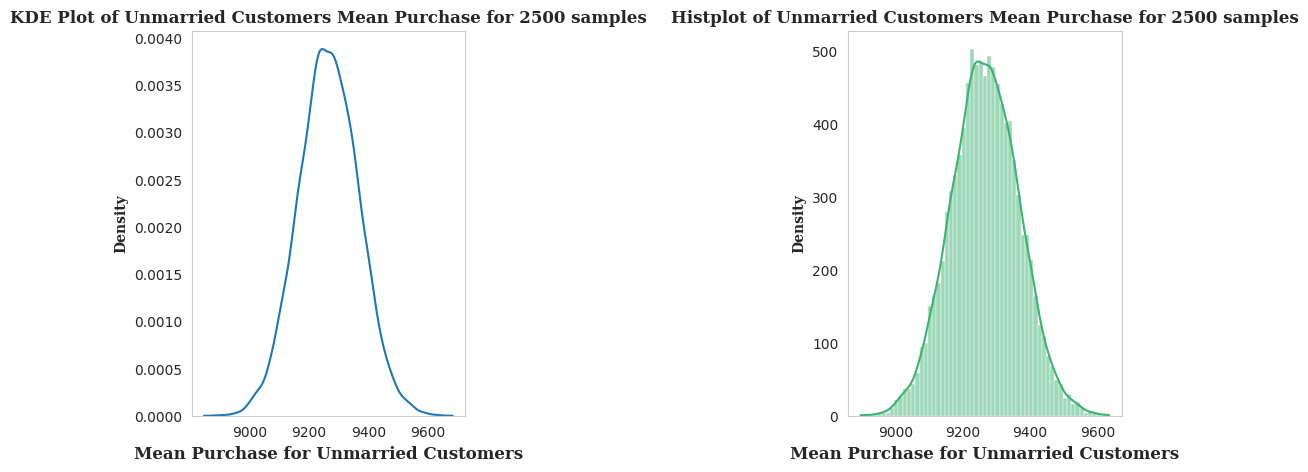

In [207]:
# Computing means through bootstrapping
unmarried_cust_mean_purch_2500_samp = []
for i in range(10000):
    bootstraped_sample = np.random.choice(df_unmarried_cust_purch, size = 2500)
    bootstraped_mean = np.mean(bootstraped_sample)
    unmarried_cust_mean_purch_2500_samp.append(bootstraped_mean)

# Calculating CI at 90%,95% and 99%
CI_unmarried_cust_90_pct = np.percentile(unmarried_cust_mean_purch_2500_samp,[5,95])
CI_unmarried_cust_95_pct = np.percentile(unmarried_cust_mean_purch_2500_samp,[2.5,97.5])
CI_unmarried_cust_99_pct = np.percentile(unmarried_cust_mean_purch_2500_samp,[0.5,99.5])

print(f'CI for unmarried customers at 90% for a sample size of 2500: [{np.round(CI_unmarried_cust_90_pct[0],2)} , {np.round(CI_unmarried_cust_90_pct[1],2)}]')
print(f'CI for unmarried customers at 95% for a sample size of 2500: [{np.round(CI_unmarried_cust_95_pct[0],2)} , {np.round(CI_unmarried_cust_95_pct[1],2)}]')
print(f'CI for unmarried customers at 99% for a sample size of 2500: [{np.round(CI_unmarried_cust_99_pct[0],2)} , {np.round(CI_unmarried_cust_99_pct[1],2)}]')
print("\n")

std_error_unmarried_cust_2500_samples = (df_unmarried_cust_purch.std() / np.sqrt(2500))
print(f'Standard error for unmarried customers for a sample size of 2500: {np.round(std_error_unmarried_cust_2500_samples,2)}')

# Standard error using bootstraping
print(f'Standard error for unmarried customers for a sample size of 2500 using bootstrapping: {np.round(pd.Series(unmarried_cust_mean_purch_2500_samp).std(),2)}')
print("\n")

# Visualizing the CI for unmarried customers for a sample size of 2500 with a KDE plot and a histplot
sns.set_style("whitegrid")
plt.figure(figsize = (12,5))

plt.subplot(1,3,1)
sns.kdeplot(unmarried_cust_mean_purch_2500_samp)
plt.title('KDE Plot of Unmarried Customers Mean Purchase for 2500 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Unmarried Customers', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.subplot(1,3,3)
sns.histplot(unmarried_cust_mean_purch_2500_samp, kde = True, color = 'mediumseagreen')
plt.title('Histplot of Unmarried Customers Mean Purchase for 2500 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Unmarried Customers', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.show()

# **Sample size 5000 and computing means through bootstraping**

CI for unmarried customers at 90% for a sample size of 5000: [9146.45 , 9385.01]
CI for unmarried customers at 95% for a sample size of 5000: [9124.06 , 9409.22]
CI for unmarried customers at 99% for a sample size of 5000: [9080.85 , 9448.34]


Standard error for unmarried customers for a sample size of 5000: 71.1
Standard error for unmarried customers for a sample size of 5000 using bootstrapping: 71.97




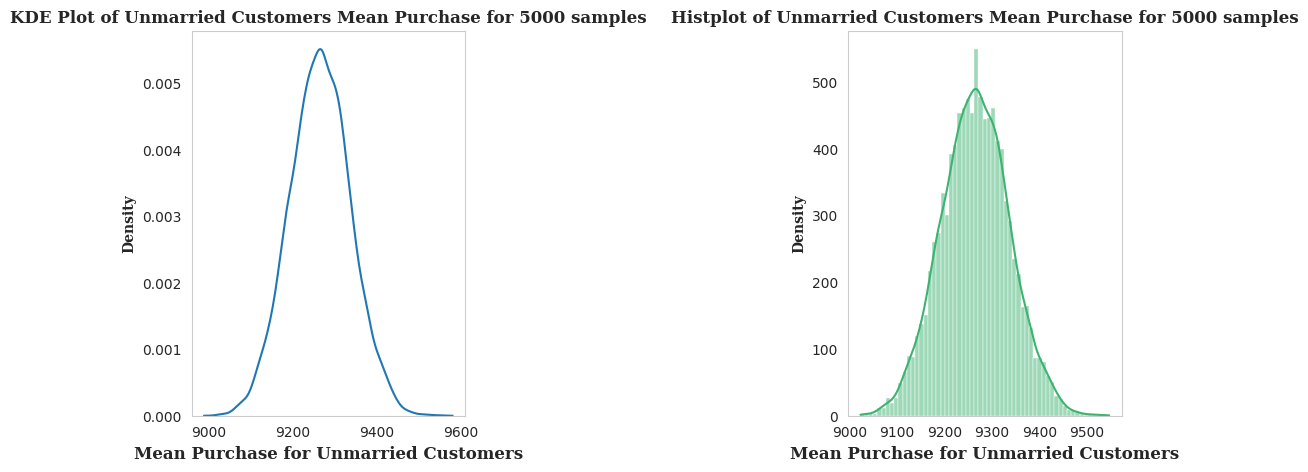

In [208]:
# Computing means through bootstrapping
unmarried_cust_mean_purch_5000_samp = []
for i in range(10000):
    bootstraped_sample = np.random.choice(df_unmarried_cust_purch, size = 5000)
    bootstraped_mean = np.mean(bootstraped_sample)
    unmarried_cust_mean_purch_5000_samp.append(bootstraped_mean)

# Calculating CI at 90%,95% and 99%
CI_unmarried_cust_90_pct = np.percentile(unmarried_cust_mean_purch_5000_samp,[5,95])
CI_unmarried_cust_95_pct = np.percentile(unmarried_cust_mean_purch_5000_samp,[2.5,97.5])
CI_unmarried_cust_99_pct = np.percentile(unmarried_cust_mean_purch_5000_samp,[0.5,99.5])

print(f'CI for unmarried customers at 90% for a sample size of 5000: [{np.round(CI_unmarried_cust_90_pct[0],2)} , {np.round(CI_unmarried_cust_90_pct[1],2)}]')
print(f'CI for unmarried customers at 95% for a sample size of 5000: [{np.round(CI_unmarried_cust_95_pct[0],2)} , {np.round(CI_unmarried_cust_95_pct[1],2)}]')
print(f'CI for unmarried customers at 99% for a sample size of 5000: [{np.round(CI_unmarried_cust_99_pct[0],2)} , {np.round(CI_unmarried_cust_99_pct[1],2)}]')
print("\n")

std_error_unmarried_cust_5000_samples = (df_unmarried_cust_purch.std() / np.sqrt(5000))
print(f'Standard error for unmarried customers for a sample size of 5000: {np.round(std_error_unmarried_cust_5000_samples,2)}')

# Standard error using bootstraping
print(f'Standard error for unmarried customers for a sample size of 5000 using bootstrapping: {np.round(pd.Series(unmarried_cust_mean_purch_5000_samp).std(),2)}')
print("\n")

# Visualizing the CI for unmarried customers for a sample size of 5000 with a KDE plot and a histplot
sns.set_style("whitegrid")
plt.figure(figsize = (12,5))

plt.subplot(1,3,1)
sns.kdeplot(unmarried_cust_mean_purch_5000_samp)
plt.title('KDE Plot of Unmarried Customers Mean Purchase for 5000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Unmarried Customers', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.subplot(1,3,3)
sns.histplot(unmarried_cust_mean_purch_5000_samp, kde = True, color = 'mediumseagreen')
plt.title('Histplot of Unmarried Customers Mean Purchase for 5000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Unmarried Customers', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.show()

In [209]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

# **Part D3: Age Group - 0-17 Years**

In [210]:
# CLT and CI for Customers aged 0-17 Years
df_age_0to17_cust_purch = df[df['Age'] == '0-17']['Purchase']
df_age_0to17_cust_purch

0          8370
1         15200
2          1422
3          1057
85         7746
          ...  
549904      256
550012       26
550024       12
550035       61
550046      236
Name: Purchase, Length: 15102, dtype: int64

In [211]:
print("Mean of the purchase amounts for customers aged 0-17 years: ", df_age_0to17_cust_purch.mean())

Mean of the purchase amounts for customers aged 0-17 years:  8933.464640444974


# **Sample size 1000 and computing means through bootstraping**

CI for customers aged 0 to 17 years at 90% for a sample size of 1000: [8668.89 , 9203.39]
CI for customers aged 0 to 17 years at 95% for a sample size of 1000: [8615.43 , 9248.89]
CI for customers aged 0 to 17 years at 99% for a sample size of 1000: [8512.83 , 9351.28]


Standard error for customers aged 0 to 17 years for a sample size of 1000: 161.63
Standard error for customers aged 0 to 17 years for a sample size of 1000 using bootstrapping: 162.27




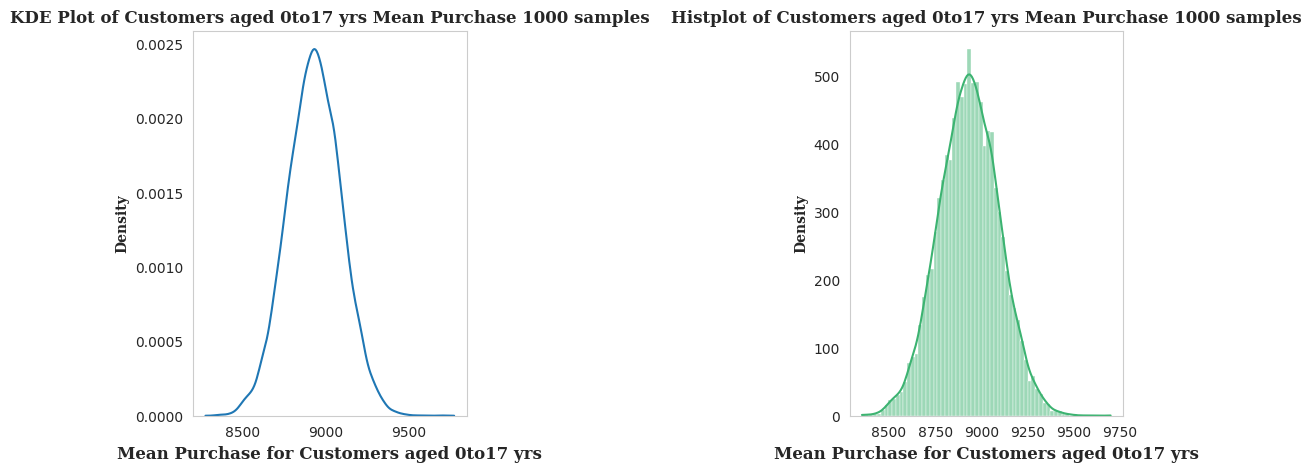

In [212]:
# Computing means through bootstrapping
cust_0to17_years_mean_purch_1000_samp = []
for i in range(10000):
    bootstraped_sample = np.random.choice(df_age_0to17_cust_purch, size = 1000)
    bootstraped_mean = np.mean(bootstraped_sample)
    cust_0to17_years_mean_purch_1000_samp.append(bootstraped_mean)

# Calculating CI at 90%,95% and 99%
CI_0to17_years_cust_90_pct = np.percentile(cust_0to17_years_mean_purch_1000_samp,[5,95])
CI_0to17_years_cust_95_pct = np.percentile(cust_0to17_years_mean_purch_1000_samp,[2.5,97.5])
CI_0to17_years_cust_99_pct = np.percentile(cust_0to17_years_mean_purch_1000_samp,[0.5,99.5])

print(f'CI for customers aged 0 to 17 years at 90% for a sample size of 1000: [{np.round(CI_0to17_years_cust_90_pct[0],2)} , {np.round(CI_0to17_years_cust_90_pct[1],2)}]')
print(f'CI for customers aged 0 to 17 years at 95% for a sample size of 1000: [{np.round(CI_0to17_years_cust_95_pct[0],2)} , {np.round(CI_0to17_years_cust_95_pct[1],2)}]')
print(f'CI for customers aged 0 to 17 years at 99% for a sample size of 1000: [{np.round(CI_0to17_years_cust_99_pct[0],2)} , {np.round(CI_0to17_years_cust_99_pct[1],2)}]')
print("\n")

std_error_cust_0to17_years_1000_samples = (df_age_0to17_cust_purch.std() / np.sqrt(1000))
print(f'Standard error for customers aged 0 to 17 years for a sample size of 1000: {np.round(std_error_cust_0to17_years_1000_samples,2)}')

# Standard error using bootstraping
print(f'Standard error for customers aged 0 to 17 years for a sample size of 1000 using bootstrapping: {np.round(pd.Series(cust_0to17_years_mean_purch_1000_samp).std(),2)}')
print("\n")

# Visualizing the CI for customers aged 0 to 17 years for a sample size of 1000 with a KDE plot and a histplot
sns.set_style("whitegrid")
plt.figure(figsize = (12,5))

plt.subplot(1,3,1)
sns.kdeplot(cust_0to17_years_mean_purch_1000_samp)
plt.title('KDE Plot of Customers aged 0to17 yrs Mean Purchase 1000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 0to17 yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.subplot(1,3,3)
sns.histplot(cust_0to17_years_mean_purch_1000_samp, kde = True, color = 'mediumseagreen')
plt.title('Histplot of Customers aged 0to17 yrs Mean Purchase 1000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 0to17 yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.show()

# **Sample size 2500 and computing means through bootstraping**

CI for customers aged 0 to 17 years at 90% for a sample size of 2500: [8763.54 , 9096.94]
CI for customers aged 0 to 17 years at 95% for a sample size of 2500: [8733.93 , 9132.06]
CI for customers aged 0 to 17 years at 99% for a sample size of 2500: [8676.77 , 9197.07]


Standard error for customers aged 0 to 17 years for a sample size of 2500: 102.22
Standard error for customers aged 0 to 17 years for a sample size of 2500 using bootstrapping: 101.99




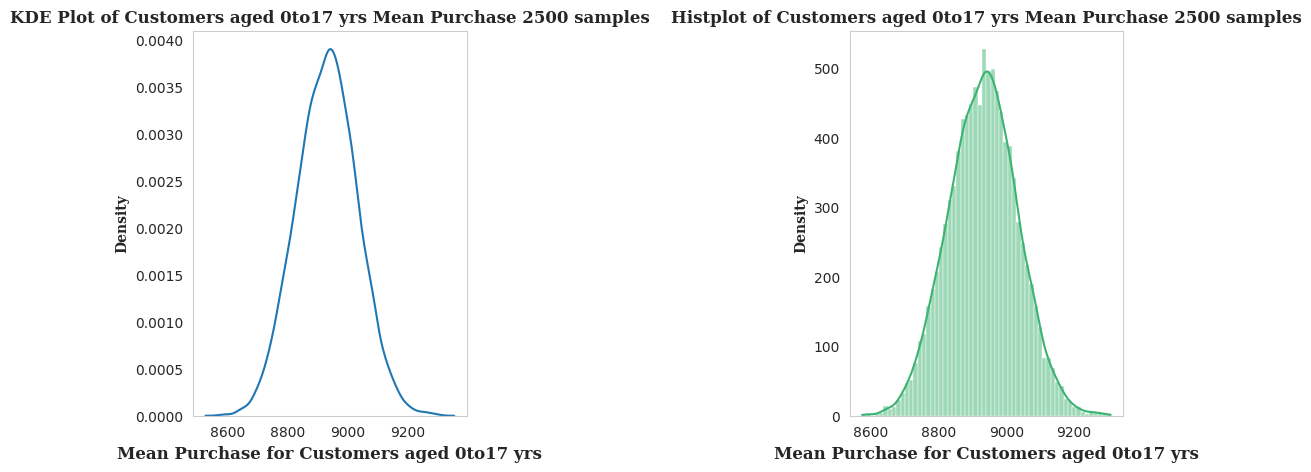

In [213]:
# Computing means through bootstrapping
cust_0to17_years_mean_purch_2500_samp = []
for i in range(10000):
    bootstraped_sample = np.random.choice(df_age_0to17_cust_purch, size = 2500)
    bootstraped_mean = np.mean(bootstraped_sample)
    cust_0to17_years_mean_purch_2500_samp.append(bootstraped_mean)

# Calculating CI at 90%,95% and 99%
CI_0to17_years_cust_90_pct = np.percentile(cust_0to17_years_mean_purch_2500_samp,[5,95])
CI_0to17_years_cust_95_pct = np.percentile(cust_0to17_years_mean_purch_2500_samp,[2.5,97.5])
CI_0to17_years_cust_99_pct = np.percentile(cust_0to17_years_mean_purch_2500_samp,[0.5,99.5])

print(f'CI for customers aged 0 to 17 years at 90% for a sample size of 2500: [{np.round(CI_0to17_years_cust_90_pct[0],2)} , {np.round(CI_0to17_years_cust_90_pct[1],2)}]')
print(f'CI for customers aged 0 to 17 years at 95% for a sample size of 2500: [{np.round(CI_0to17_years_cust_95_pct[0],2)} , {np.round(CI_0to17_years_cust_95_pct[1],2)}]')
print(f'CI for customers aged 0 to 17 years at 99% for a sample size of 2500: [{np.round(CI_0to17_years_cust_99_pct[0],2)} , {np.round(CI_0to17_years_cust_99_pct[1],2)}]')
print("\n")

std_error_cust_0to17_years_2500_samples = (df_age_0to17_cust_purch.std() / np.sqrt(2500))
print(f'Standard error for customers aged 0 to 17 years for a sample size of 2500: {np.round(std_error_cust_0to17_years_2500_samples,2)}')

# Standard error using bootstraping
print(f'Standard error for customers aged 0 to 17 years for a sample size of 2500 using bootstrapping: {np.round(pd.Series(cust_0to17_years_mean_purch_2500_samp).std(),2)}')
print("\n")

# Visualizing the CI for customers aged 0 to 17 years for a sample size of 2500 with a KDE plot and a histplot
sns.set_style("whitegrid")
plt.figure(figsize = (12,5))

plt.subplot(1,3,1)
sns.kdeplot(cust_0to17_years_mean_purch_2500_samp)
plt.title('KDE Plot of Customers aged 0to17 yrs Mean Purchase 2500 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 0to17 yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.subplot(1,3,3)
sns.histplot(cust_0to17_years_mean_purch_2500_samp, kde = True, color = 'mediumseagreen')
plt.title('Histplot of Customers aged 0to17 yrs Mean Purchase 2500 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 0to17 yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.show()

# **Sample size 5000 and computing means through bootstraping**

CI for customers aged 0 to 17 years at 90% for a sample size of 5000: [8815.69 , 9052.33]
CI for customers aged 0 to 17 years at 95% for a sample size of 5000: [8790.78 , 9074.52]
CI for customers aged 0 to 17 years at 99% for a sample size of 5000: [8748.97 , 9120.52]


Standard error for customers aged 0 to 17 years for a sample size of 5000: 72.28
Standard error for customers aged 0 to 17 years for a sample size of 5000 using bootstrapping: 72.31




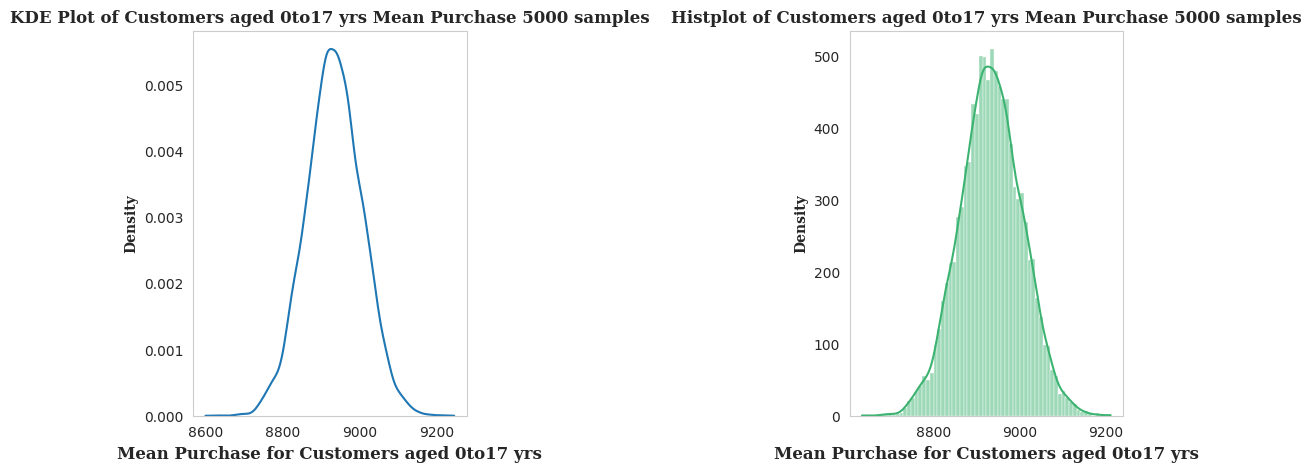

In [214]:
# Computing means through bootstrapping
cust_0to17_years_mean_purch_5000_samp = []
for i in range(10000):
    bootstraped_sample = np.random.choice(df_age_0to17_cust_purch, size = 5000)
    bootstraped_mean = np.mean(bootstraped_sample)
    cust_0to17_years_mean_purch_5000_samp.append(bootstraped_mean)

# Calculating CI at 90%,95% and 99%
CI_0to17_years_cust_90_pct = np.percentile(cust_0to17_years_mean_purch_5000_samp,[5,95])
CI_0to17_years_cust_95_pct = np.percentile(cust_0to17_years_mean_purch_5000_samp,[2.5,97.5])
CI_0to17_years_cust_99_pct = np.percentile(cust_0to17_years_mean_purch_5000_samp,[0.5,99.5])

print(f'CI for customers aged 0 to 17 years at 90% for a sample size of 5000: [{np.round(CI_0to17_years_cust_90_pct[0],2)} , {np.round(CI_0to17_years_cust_90_pct[1],2)}]')
print(f'CI for customers aged 0 to 17 years at 95% for a sample size of 5000: [{np.round(CI_0to17_years_cust_95_pct[0],2)} , {np.round(CI_0to17_years_cust_95_pct[1],2)}]')
print(f'CI for customers aged 0 to 17 years at 99% for a sample size of 5000: [{np.round(CI_0to17_years_cust_99_pct[0],2)} , {np.round(CI_0to17_years_cust_99_pct[1],2)}]')
print("\n")

std_error_cust_0to17_years_5000_samples = (df_age_0to17_cust_purch.std() / np.sqrt(5000))
print(f'Standard error for customers aged 0 to 17 years for a sample size of 5000: {np.round(std_error_cust_0to17_years_5000_samples,2)}')

# Standard error using bootstraping
print(f'Standard error for customers aged 0 to 17 years for a sample size of 5000 using bootstrapping: {np.round(pd.Series(cust_0to17_years_mean_purch_5000_samp).std(),2)}')
print("\n")

# Visualizing the CI for customers aged 0 to 17 years for a sample size of 5000 with a KDE plot and a histplot
sns.set_style("whitegrid")
plt.figure(figsize = (12,5))

plt.subplot(1,3,1)
sns.kdeplot(cust_0to17_years_mean_purch_5000_samp)
plt.title('KDE Plot of Customers aged 0to17 yrs Mean Purchase 5000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 0to17 yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.subplot(1,3,3)
sns.histplot(cust_0to17_years_mean_purch_5000_samp, kde = True, color = 'mediumseagreen')
plt.title('Histplot of Customers aged 0to17 yrs Mean Purchase 5000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 0to17 yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.show()

# **Part D3: Age Group - 18-25 Years**

In [215]:
# CLT and CI for Customers aged 18-25 Years
df_age_18to25_cust_purch = df[df['Age'] == '18-25']['Purchase']
df_age_18to25_cust_purch

70         1780
71        10754
72         2802
73        19473
74        19672
          ...  
550000       14
550015      477
550017      363
550020       36
550032      491
Name: Purchase, Length: 99660, dtype: int64

In [216]:
print("Mean of the purchase amounts for customers aged 18-25 years: ", df_age_18to25_cust_purch.mean())

Mean of the purchase amounts for customers aged 18-25 years:  9169.663606261289


# **Sample size 1000 and computing means through bootstraping**

CI for customers aged 18 to 25 years at 90% for a sample size of 1000: [8904.49 , 9435.06]
CI for customers aged 18 to 25 years at 95% for a sample size of 1000: [8854.01 , 9489.89]
CI for customers aged 18 to 25 years at 99% for a sample size of 1000: [8738.42 , 9588.09]


Standard error for customers aged 18 to 25 years for a sample size of 1000: 159.2
Standard error for customers aged 18 to 25 years for a sample size of 1000 using bootstrapping: 162.26




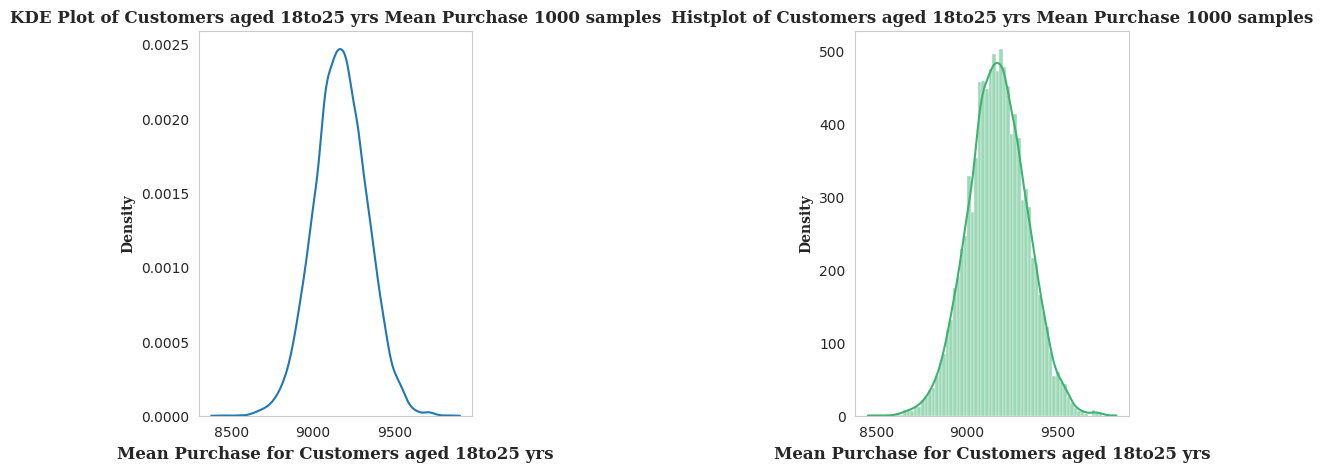

In [217]:
# Computing means through bootstrapping
cust_18to25_years_mean_purch_1000_samp = []
for i in range(10000):
    bootstraped_sample = np.random.choice(df_age_18to25_cust_purch, size = 1000)
    bootstraped_mean = np.mean(bootstraped_sample)
    cust_18to25_years_mean_purch_1000_samp.append(bootstraped_mean)

# Calculating CI at 90%,95% and 99%
CI_18to25_years_cust_90_pct = np.percentile(cust_18to25_years_mean_purch_1000_samp,[5,95])
CI_18to25_years_cust_95_pct = np.percentile(cust_18to25_years_mean_purch_1000_samp,[2.5,97.5])
CI_18to25_years_cust_99_pct = np.percentile(cust_18to25_years_mean_purch_1000_samp,[0.5,99.5])

print(f'CI for customers aged 18 to 25 years at 90% for a sample size of 1000: [{np.round(CI_18to25_years_cust_90_pct[0],2)} , {np.round(CI_18to25_years_cust_90_pct[1],2)}]')
print(f'CI for customers aged 18 to 25 years at 95% for a sample size of 1000: [{np.round(CI_18to25_years_cust_95_pct[0],2)} , {np.round(CI_18to25_years_cust_95_pct[1],2)}]')
print(f'CI for customers aged 18 to 25 years at 99% for a sample size of 1000: [{np.round(CI_18to25_years_cust_99_pct[0],2)} , {np.round(CI_18to25_years_cust_99_pct[1],2)}]')
print("\n")

std_error_cust_18to25_years_1000_samples = (df_age_18to25_cust_purch.std() / np.sqrt(1000))
print(f'Standard error for customers aged 18 to 25 years for a sample size of 1000: {np.round(std_error_cust_18to25_years_1000_samples,2)}')

# Standard error using bootstraping
print(f'Standard error for customers aged 18 to 25 years for a sample size of 1000 using bootstrapping: {np.round(pd.Series(cust_18to25_years_mean_purch_1000_samp).std(),2)}')
print("\n")

# Visualizing the CI for customers aged 18 to 25 years for a sample size of 1000 with a KDE plot and a histplot
sns.set_style("whitegrid")
plt.figure(figsize = (12,5))

plt.subplot(1,3,1)
sns.kdeplot(cust_18to25_years_mean_purch_1000_samp)
plt.title('KDE Plot of Customers aged 18to25 yrs Mean Purchase 1000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 18to25 yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.subplot(1,3,3)
sns.histplot(cust_18to25_years_mean_purch_1000_samp, kde = True, color = 'mediumseagreen')
plt.title('Histplot of Customers aged 18to25 yrs Mean Purchase 1000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 18to25 yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.show()

# **Sample size 2500 and computing means through bootstraping**

CI for customers aged 18 to 25 years at 90% for a sample size of 2500: [9004.52 , 9334.29]
CI for customers aged 18 to 25 years at 95% for a sample size of 2500: [8972.25 , 9367.02]
CI for customers aged 18 to 25 years at 99% for a sample size of 2500: [8910.83 , 9428.16]


Standard error for customers aged 18 to 25 years for a sample size of 2500: 100.69
Standard error for customers aged 18 to 25 years for a sample size of 2500 using bootstrapping: 101.23




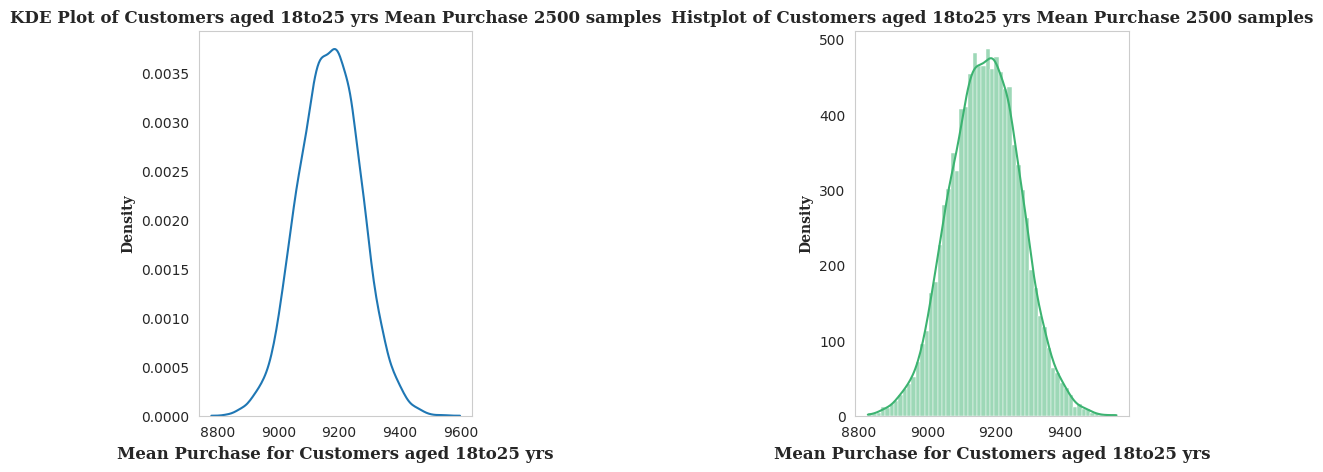

In [218]:
# Computing means through bootstrapping
cust_18to25_years_mean_purch_2500_samp = []
for i in range(10000):
    bootstraped_sample = np.random.choice(df_age_18to25_cust_purch, size = 2500)
    bootstraped_mean = np.mean(bootstraped_sample)
    cust_18to25_years_mean_purch_2500_samp.append(bootstraped_mean)

# Calculating CI at 90%,95% and 99%
CI_18to25_years_cust_90_pct = np.percentile(cust_18to25_years_mean_purch_2500_samp,[5,95])
CI_18to25_years_cust_95_pct = np.percentile(cust_18to25_years_mean_purch_2500_samp,[2.5,97.5])
CI_18to25_years_cust_99_pct = np.percentile(cust_18to25_years_mean_purch_2500_samp,[0.5,99.5])

print(f'CI for customers aged 18 to 25 years at 90% for a sample size of 2500: [{np.round(CI_18to25_years_cust_90_pct[0],2)} , {np.round(CI_18to25_years_cust_90_pct[1],2)}]')
print(f'CI for customers aged 18 to 25 years at 95% for a sample size of 2500: [{np.round(CI_18to25_years_cust_95_pct[0],2)} , {np.round(CI_18to25_years_cust_95_pct[1],2)}]')
print(f'CI for customers aged 18 to 25 years at 99% for a sample size of 2500: [{np.round(CI_18to25_years_cust_99_pct[0],2)} , {np.round(CI_18to25_years_cust_99_pct[1],2)}]')
print("\n")

std_error_cust_18to25_years_2500_samples = (df_age_18to25_cust_purch.std() / np.sqrt(2500))
print(f'Standard error for customers aged 18 to 25 years for a sample size of 2500: {np.round(std_error_cust_18to25_years_2500_samples,2)}')

# Standard error using bootstraping
print(f'Standard error for customers aged 18 to 25 years for a sample size of 2500 using bootstrapping: {np.round(pd.Series(cust_18to25_years_mean_purch_2500_samp).std(),2)}')
print("\n")

# Visualizing the CI for customers aged 18 to 25 years for a sample size of 2500 with a KDE plot and a histplot
sns.set_style("whitegrid")
plt.figure(figsize = (12,5))

plt.subplot(1,3,1)
sns.kdeplot(cust_18to25_years_mean_purch_2500_samp)
plt.title('KDE Plot of Customers aged 18to25 yrs Mean Purchase 2500 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 18to25 yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.subplot(1,3,3)
sns.histplot(cust_18to25_years_mean_purch_2500_samp, kde = True, color = 'mediumseagreen')
plt.title('Histplot of Customers aged 18to25 yrs Mean Purchase 2500 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 18to25 yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.show()

# **Sample size 5000 and computing means through bootstraping**

CI for customers aged 18 to 25 years at 90% for a sample size of 5000: [9053.89 , 9286.25]
CI for customers aged 18 to 25 years at 95% for a sample size of 5000: [9031.01 , 9309.96]
CI for customers aged 18 to 25 years at 99% for a sample size of 5000: [8983.16 , 9356.86]


Standard error for customers aged 18 to 25 years for a sample size of 5000: 71.2
Standard error for customers aged 18 to 25 years for a sample size of 5000 using bootstrapping: 71.41




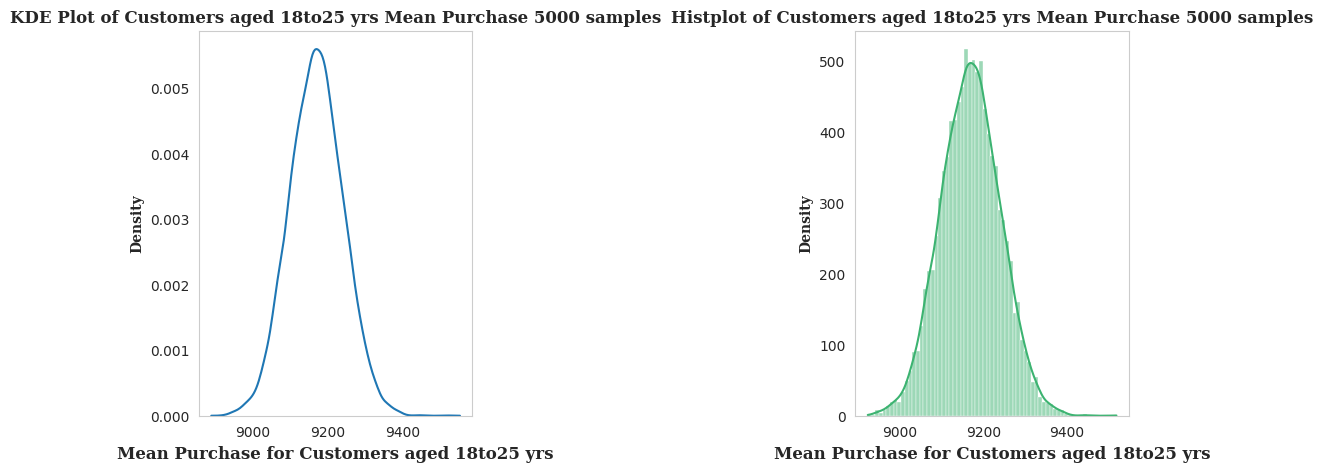

In [219]:
# Computing means through bootstrapping
cust_18to25_years_mean_purch_5000_samp = []
for i in range(10000):
    bootstraped_sample = np.random.choice(df_age_18to25_cust_purch, size = 5000)
    bootstraped_mean = np.mean(bootstraped_sample)
    cust_18to25_years_mean_purch_5000_samp.append(bootstraped_mean)

# Calculating CI at 90%,95% and 99%
CI_18to25_years_cust_90_pct = np.percentile(cust_18to25_years_mean_purch_5000_samp,[5,95])
CI_18to25_years_cust_95_pct = np.percentile(cust_18to25_years_mean_purch_5000_samp,[2.5,97.5])
CI_18to25_years_cust_99_pct = np.percentile(cust_18to25_years_mean_purch_5000_samp,[0.5,99.5])

print(f'CI for customers aged 18 to 25 years at 90% for a sample size of 5000: [{np.round(CI_18to25_years_cust_90_pct[0],2)} , {np.round(CI_18to25_years_cust_90_pct[1],2)}]')
print(f'CI for customers aged 18 to 25 years at 95% for a sample size of 5000: [{np.round(CI_18to25_years_cust_95_pct[0],2)} , {np.round(CI_18to25_years_cust_95_pct[1],2)}]')
print(f'CI for customers aged 18 to 25 years at 99% for a sample size of 5000: [{np.round(CI_18to25_years_cust_99_pct[0],2)} , {np.round(CI_18to25_years_cust_99_pct[1],2)}]')
print("\n")

std_error_cust_18to25_years_5000_samples = (df_age_18to25_cust_purch.std() / np.sqrt(5000))
print(f'Standard error for customers aged 18 to 25 years for a sample size of 5000: {np.round(std_error_cust_18to25_years_5000_samples,2)}')

# Standard error using bootstraping
print(f'Standard error for customers aged 18 to 25 years for a sample size of 5000 using bootstrapping: {np.round(pd.Series(cust_18to25_years_mean_purch_5000_samp).std(),2)}')
print("\n")

# Visualizing the CI for customers aged 18 to 25 years for a sample size of 5000 with a KDE plot and a histplot
sns.set_style("whitegrid")
plt.figure(figsize = (12,5))

plt.subplot(1,3,1)
sns.kdeplot(cust_18to25_years_mean_purch_5000_samp)
plt.title('KDE Plot of Customers aged 18to25 yrs Mean Purchase 5000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 18to25 yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.subplot(1,3,3)
sns.histplot(cust_18to25_years_mean_purch_5000_samp, kde = True, color = 'mediumseagreen')
plt.title('Histplot of Customers aged 18to25 yrs Mean Purchase 5000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 18to25 yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.show()

# **Part D3: Age Group - 26-35 Years**

In [220]:
# CLT and CI for Customers aged 26-35 Years
df_age_26to35_cust_purch = df[df['Age'] == '26-35']['Purchase']
df_age_26to35_cust_purch

5         15227
9          7871
10         5254
11         3957
12         6073
          ...  
550058      121
550059       48
550061      599
550064      371
550065      137
Name: Purchase, Length: 219587, dtype: int64

In [221]:
print("Mean of the purchase amounts for customers aged 26-35 years: ", df_age_26to35_cust_purch.mean())

Mean of the purchase amounts for customers aged 26-35 years:  9252.690632869888


# **Sample size 1000 and computing means through bootstraping**

CI for customers aged 26 to 35 years at 90% for a sample size of 1000: [8987.39 , 9517.62]
CI for customers aged 26 to 35 years at 95% for a sample size of 1000: [8935.66 , 9569.21]
CI for customers aged 26 to 35 years at 99% for a sample size of 1000: [8838.57 , 9660.98]


Standard error for customers aged 26 to 35 years for a sample size of 1000: 158.45
Standard error for customers aged 26 to 35 years for a sample size of 1000 using bootstrapping: 160.57




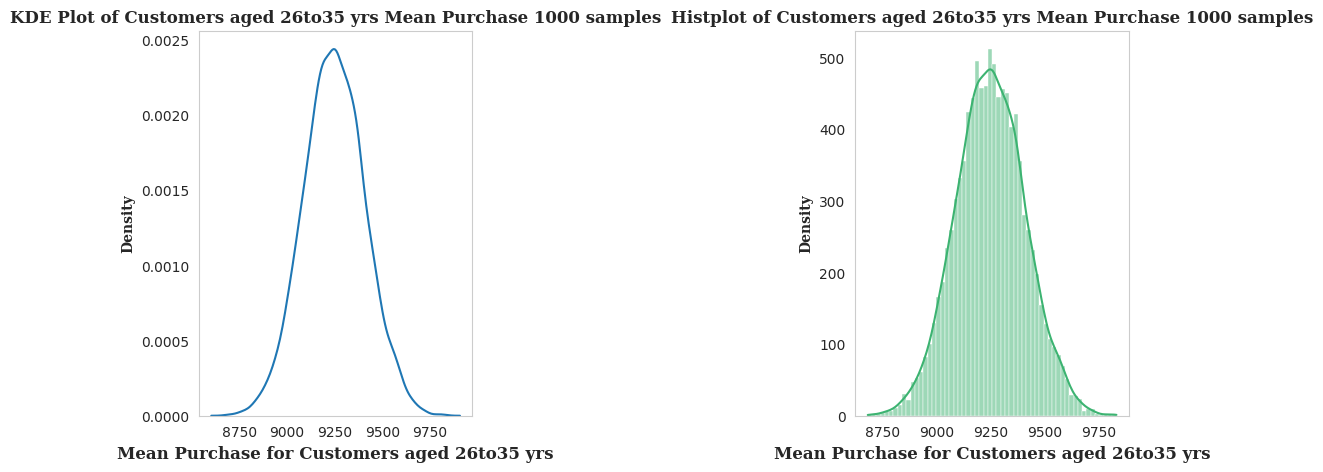

In [222]:
# Computing means through bootstrapping
cust_26to35_years_mean_purch_1000_samp = []
for i in range(10000):
    bootstraped_sample = np.random.choice(df_age_26to35_cust_purch, size = 1000)
    bootstraped_mean = np.mean(bootstraped_sample)
    cust_26to35_years_mean_purch_1000_samp.append(bootstraped_mean)

# Calculating CI at 90%,95% and 99%
CI_26to35_years_cust_90_pct = np.percentile(cust_26to35_years_mean_purch_1000_samp,[5,95])
CI_26to35_years_cust_95_pct = np.percentile(cust_26to35_years_mean_purch_1000_samp,[2.5,97.5])
CI_26to35_years_cust_99_pct = np.percentile(cust_26to35_years_mean_purch_1000_samp,[0.5,99.5])

print(f'CI for customers aged 26 to 35 years at 90% for a sample size of 1000: [{np.round(CI_26to35_years_cust_90_pct[0],2)} , {np.round(CI_26to35_years_cust_90_pct[1],2)}]')
print(f'CI for customers aged 26 to 35 years at 95% for a sample size of 1000: [{np.round(CI_26to35_years_cust_95_pct[0],2)} , {np.round(CI_26to35_years_cust_95_pct[1],2)}]')
print(f'CI for customers aged 26 to 35 years at 99% for a sample size of 1000: [{np.round(CI_26to35_years_cust_99_pct[0],2)} , {np.round(CI_26to35_years_cust_99_pct[1],2)}]')
print("\n")

std_error_cust_26to35_years_1000_samples = (df_age_26to35_cust_purch.std() / np.sqrt(1000))
print(f'Standard error for customers aged 26 to 35 years for a sample size of 1000: {np.round(std_error_cust_26to35_years_1000_samples,2)}')

# Standard error using bootstraping
print(f'Standard error for customers aged 26 to 35 years for a sample size of 1000 using bootstrapping: {np.round(pd.Series(cust_26to35_years_mean_purch_1000_samp).std(),2)}')
print("\n")

# Visualizing the CI for customers aged 26 to 35 years for a sample size of 1000 with a KDE plot and a histplot
sns.set_style("whitegrid")
plt.figure(figsize = (12,5))

plt.subplot(1,3,1)
sns.kdeplot(cust_26to35_years_mean_purch_1000_samp)
plt.title('KDE Plot of Customers aged 26to35 yrs Mean Purchase 1000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 26to35 yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.subplot(1,3,3)
sns.histplot(cust_26to35_years_mean_purch_1000_samp, kde = True, color = 'mediumseagreen')
plt.title('Histplot of Customers aged 26to35 yrs Mean Purchase 1000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 26to35 yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.show()

# **Sample size 2500 and computing means through bootstraping**

CI for customers aged 26 to 35 years at 90% for a sample size of 2500: [9088.68 , 9418.13]
CI for customers aged 26 to 35 years at 95% for a sample size of 2500: [9058.28 , 9447.97]
CI for customers aged 26 to 35 years at 99% for a sample size of 2500: [8993.15 , 9510.01]


Standard error for customers aged 26 to 35 years for a sample size of 2500: 100.21
Standard error for customers aged 26 to 35 years for a sample size of 2500 using bootstrapping: 100.42




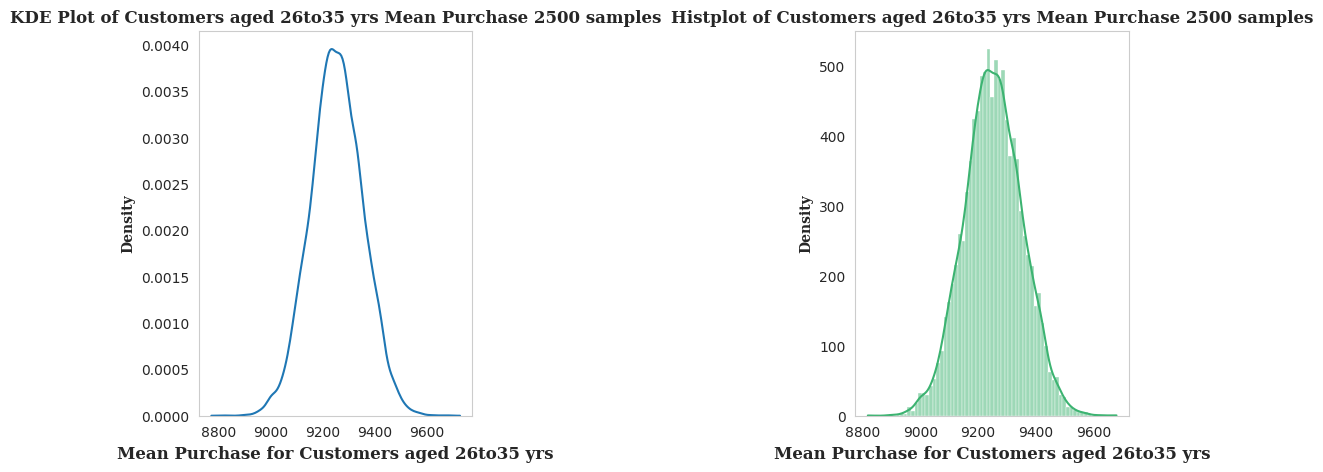

In [223]:
# Computing means through bootstrapping
cust_26to35_years_mean_purch_2500_samp = []
for i in range(10000):
    bootstraped_sample = np.random.choice(df_age_26to35_cust_purch, size = 2500)
    bootstraped_mean = np.mean(bootstraped_sample)
    cust_26to35_years_mean_purch_2500_samp.append(bootstraped_mean)

# Calculating CI at 90%,95% and 99%
CI_26to35_years_cust_90_pct = np.percentile(cust_26to35_years_mean_purch_2500_samp,[5,95])
CI_26to35_years_cust_95_pct = np.percentile(cust_26to35_years_mean_purch_2500_samp,[2.5,97.5])
CI_26to35_years_cust_99_pct = np.percentile(cust_26to35_years_mean_purch_2500_samp,[0.5,99.5])

print(f'CI for customers aged 26 to 35 years at 90% for a sample size of 2500: [{np.round(CI_26to35_years_cust_90_pct[0],2)} , {np.round(CI_26to35_years_cust_90_pct[1],2)}]')
print(f'CI for customers aged 26 to 35 years at 95% for a sample size of 2500: [{np.round(CI_26to35_years_cust_95_pct[0],2)} , {np.round(CI_26to35_years_cust_95_pct[1],2)}]')
print(f'CI for customers aged 26 to 35 years at 99% for a sample size of 2500: [{np.round(CI_26to35_years_cust_99_pct[0],2)} , {np.round(CI_26to35_years_cust_99_pct[1],2)}]')
print("\n")

std_error_cust_26to35_years_2500_samples = (df_age_26to35_cust_purch.std() / np.sqrt(2500))
print(f'Standard error for customers aged 26 to 35 years for a sample size of 2500: {np.round(std_error_cust_26to35_years_2500_samples,2)}')

# Standard error using bootstraping
print(f'Standard error for customers aged 26 to 35 years for a sample size of 2500 using bootstrapping: {np.round(pd.Series(cust_26to35_years_mean_purch_2500_samp).std(),2)}')
print("\n")

# Visualizing the CI for customers aged 26 to 35 years for a sample size of 2500 with a KDE plot and a histplot
sns.set_style("whitegrid")
plt.figure(figsize = (12,5))

plt.subplot(1,3,1)
sns.kdeplot(cust_26to35_years_mean_purch_2500_samp)
plt.title('KDE Plot of Customers aged 26to35 yrs Mean Purchase 2500 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 26to35 yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.subplot(1,3,3)
sns.histplot(cust_26to35_years_mean_purch_2500_samp, kde = True, color = 'mediumseagreen')
plt.title('Histplot of Customers aged 26to35 yrs Mean Purchase 2500 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 26to35 yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.show()

# **Sample size 5000 and computing means through bootstraping**

CI for customers aged 26 to 35 years at 90% for a sample size of 5000: [9134.39 , 9367.33]
CI for customers aged 26 to 35 years at 95% for a sample size of 5000: [9111.56 , 9390.0]
CI for customers aged 26 to 35 years at 99% for a sample size of 5000: [9073.52 , 9437.84]


Standard error for customers aged 26 to 35 years for a sample size of 5000: 70.86
Standard error for customers aged 26 to 35 years for a sample size of 5000 using bootstrapping: 71.17




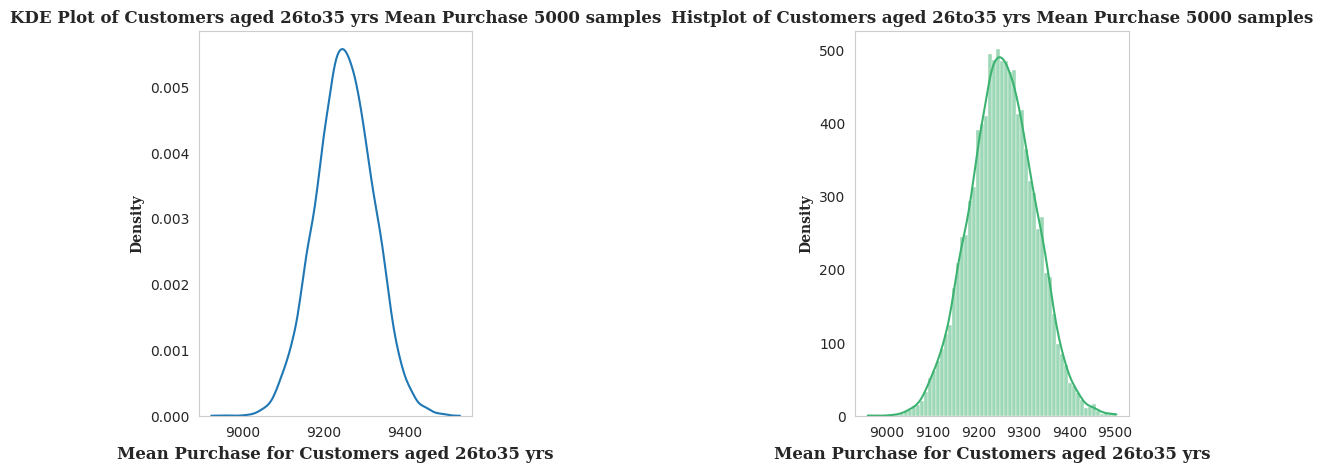

In [224]:
# Computing means through bootstrapping
cust_26to35_years_mean_purch_5000_samp = []
for i in range(10000):
    bootstraped_sample = np.random.choice(df_age_26to35_cust_purch, size = 5000)
    bootstraped_mean = np.mean(bootstraped_sample)
    cust_26to35_years_mean_purch_5000_samp.append(bootstraped_mean)

# Calculating CI at 90%,95% and 99%
CI_26to35_years_cust_90_pct = np.percentile(cust_26to35_years_mean_purch_5000_samp,[5,95])
CI_26to35_years_cust_95_pct = np.percentile(cust_26to35_years_mean_purch_5000_samp,[2.5,97.5])
CI_26to35_years_cust_99_pct = np.percentile(cust_26to35_years_mean_purch_5000_samp,[0.5,99.5])

print(f'CI for customers aged 26 to 35 years at 90% for a sample size of 5000: [{np.round(CI_26to35_years_cust_90_pct[0],2)} , {np.round(CI_26to35_years_cust_90_pct[1],2)}]')
print(f'CI for customers aged 26 to 35 years at 95% for a sample size of 5000: [{np.round(CI_26to35_years_cust_95_pct[0],2)} , {np.round(CI_26to35_years_cust_95_pct[1],2)}]')
print(f'CI for customers aged 26 to 35 years at 99% for a sample size of 5000: [{np.round(CI_26to35_years_cust_99_pct[0],2)} , {np.round(CI_26to35_years_cust_99_pct[1],2)}]')
print("\n")

std_error_cust_26to35_years_5000_samples = (df_age_26to35_cust_purch.std() / np.sqrt(5000))
print(f'Standard error for customers aged 26 to 35 years for a sample size of 5000: {np.round(std_error_cust_26to35_years_5000_samples,2)}')

# Standard error using bootstraping
print(f'Standard error for customers aged 26 to 35 years for a sample size of 5000 using bootstrapping: {np.round(pd.Series(cust_26to35_years_mean_purch_5000_samp).std(),2)}')
print("\n")

# Visualizing the CI for customers aged 26 to 35 years for a sample size of 5000 with a KDE plot and a histplot
sns.set_style("whitegrid")
plt.figure(figsize = (12,5))

plt.subplot(1,3,1)
sns.kdeplot(cust_26to35_years_mean_purch_5000_samp)
plt.title('KDE Plot of Customers aged 26to35 yrs Mean Purchase 5000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 26to35 yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.subplot(1,3,3)
sns.histplot(cust_26to35_years_mean_purch_5000_samp, kde = True, color = 'mediumseagreen')
plt.title('Histplot of Customers aged 26to35 yrs Mean Purchase 5000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 26to35 yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.show()

# **Part D3: Age Group - 36-45 Years**

In [225]:
# CLT and CI for Customers aged 36-45 Years
df_age_36to45_cust_purch = df[df['Age'] == '36-45']['Purchase']
df_age_36to45_cust_purch

18        11788
29        16352
30         8886
31         5875
32         8854
          ...  
550049      473
550050      368
550053      371
550054       60
550060      494
Name: Purchase, Length: 110013, dtype: int64

In [226]:
print("Mean of the purchase amounts for customers aged 36-45 years: ", df_age_36to45_cust_purch.mean())

Mean of the purchase amounts for customers aged 36-45 years:  9331.350694917874


# **Sample size 1000 and computing means through bootstraping**

CI for customers aged 36 to 45 years at 90% for a sample size of 1000: [9065.25 , 9586.46]
CI for customers aged 36 to 45 years at 95% for a sample size of 1000: [9015.65 , 9636.98]
CI for customers aged 36 to 45 years at 99% for a sample size of 1000: [8927.93 , 9731.87]


Standard error for customers aged 36 to 45 years for a sample size of 1000: 158.84
Standard error for customers aged 36 to 45 years for a sample size of 1000 using bootstrapping: 158.94




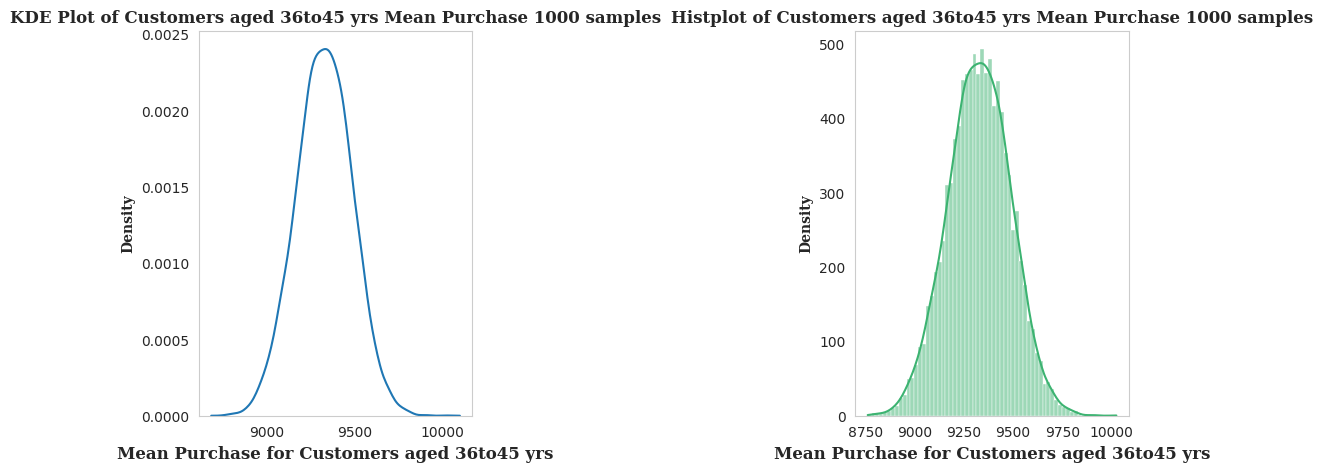

In [227]:
# Computing means through bootstrapping
cust_36to45_years_mean_purch_1000_samp = []
for i in range(10000):
    bootstraped_sample = np.random.choice(df_age_36to45_cust_purch, size = 1000)
    bootstraped_mean = np.mean(bootstraped_sample)
    cust_36to45_years_mean_purch_1000_samp.append(bootstraped_mean)

# Calculating CI at 90%,95% and 99%
CI_36to45_years_cust_90_pct = np.percentile(cust_36to45_years_mean_purch_1000_samp,[5,95])
CI_36to45_years_cust_95_pct = np.percentile(cust_36to45_years_mean_purch_1000_samp,[2.5,97.5])
CI_36to45_years_cust_99_pct = np.percentile(cust_36to45_years_mean_purch_1000_samp,[0.5,99.5])

print(f'CI for customers aged 36 to 45 years at 90% for a sample size of 1000: [{np.round(CI_36to45_years_cust_90_pct[0],2)} , {np.round(CI_36to45_years_cust_90_pct[1],2)}]')
print(f'CI for customers aged 36 to 45 years at 95% for a sample size of 1000: [{np.round(CI_36to45_years_cust_95_pct[0],2)} , {np.round(CI_36to45_years_cust_95_pct[1],2)}]')
print(f'CI for customers aged 36 to 45 years at 99% for a sample size of 1000: [{np.round(CI_36to45_years_cust_99_pct[0],2)} , {np.round(CI_36to45_years_cust_99_pct[1],2)}]')
print("\n")

std_error_cust_36to45_years_1000_samples = (df_age_36to45_cust_purch.std() / np.sqrt(1000))
print(f'Standard error for customers aged 36 to 45 years for a sample size of 1000: {np.round(std_error_cust_36to45_years_1000_samples,2)}')

# Standard error using bootstraping
print(f'Standard error for customers aged 36 to 45 years for a sample size of 1000 using bootstrapping: {np.round(pd.Series(cust_36to45_years_mean_purch_1000_samp).std(),2)}')
print("\n")

# Visualizing the CI for customers aged 36 to 45 years for a sample size of 1000 with a KDE plot and a histplot
sns.set_style("whitegrid")
plt.figure(figsize = (12,5))

plt.subplot(1,3,1)
sns.kdeplot(cust_36to45_years_mean_purch_1000_samp)
plt.title('KDE Plot of Customers aged 36to45 yrs Mean Purchase 1000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 36to45 yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.subplot(1,3,3)
sns.histplot(cust_36to45_years_mean_purch_1000_samp, kde = True, color = 'mediumseagreen')
plt.title('Histplot of Customers aged 36to45 yrs Mean Purchase 1000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 36to45 yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.show()

# **Sample size 2500 and computing means through bootstraping**

CI for customers aged 36 to 45 years at 90% for a sample size of 2500: [9165.42 , 9496.35]
CI for customers aged 36 to 45 years at 95% for a sample size of 2500: [9135.79 , 9531.26]
CI for customers aged 36 to 45 years at 99% for a sample size of 2500: [9066.78 , 9588.02]


Standard error for customers aged 36 to 45 years for a sample size of 2500: 100.46
Standard error for customers aged 36 to 45 years for a sample size of 2500 using bootstrapping: 100.7




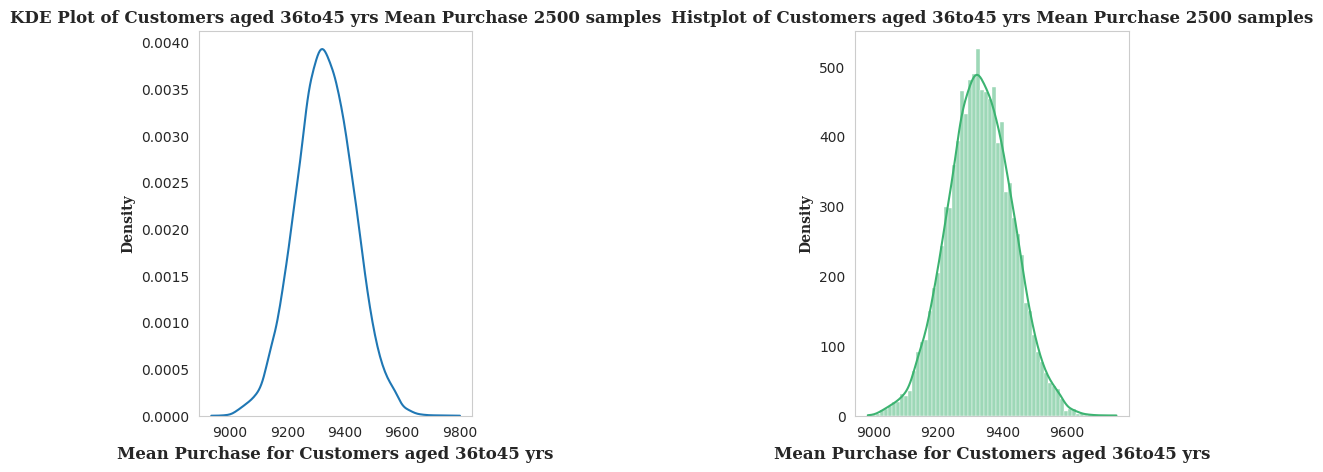

In [228]:
# Computing means through bootstrapping
cust_36to45_years_mean_purch_2500_samp = []
for i in range(10000):
    bootstraped_sample = np.random.choice(df_age_36to45_cust_purch, size = 2500)
    bootstraped_mean = np.mean(bootstraped_sample)
    cust_36to45_years_mean_purch_2500_samp.append(bootstraped_mean)

# Calculating CI at 90%,95% and 99%
CI_36to45_years_cust_90_pct = np.percentile(cust_36to45_years_mean_purch_2500_samp,[5,95])
CI_36to45_years_cust_95_pct = np.percentile(cust_36to45_years_mean_purch_2500_samp,[2.5,97.5])
CI_36to45_years_cust_99_pct = np.percentile(cust_36to45_years_mean_purch_2500_samp,[0.5,99.5])

print(f'CI for customers aged 36 to 45 years at 90% for a sample size of 2500: [{np.round(CI_36to45_years_cust_90_pct[0],2)} , {np.round(CI_36to45_years_cust_90_pct[1],2)}]')
print(f'CI for customers aged 36 to 45 years at 95% for a sample size of 2500: [{np.round(CI_36to45_years_cust_95_pct[0],2)} , {np.round(CI_36to45_years_cust_95_pct[1],2)}]')
print(f'CI for customers aged 36 to 45 years at 99% for a sample size of 2500: [{np.round(CI_36to45_years_cust_99_pct[0],2)} , {np.round(CI_36to45_years_cust_99_pct[1],2)}]')
print("\n")

std_error_cust_36to45_years_2500_samples = (df_age_36to45_cust_purch.std() / np.sqrt(2500))
print(f'Standard error for customers aged 36 to 45 years for a sample size of 2500: {np.round(std_error_cust_36to45_years_2500_samples,2)}')

# Standard error using bootstraping
print(f'Standard error for customers aged 36 to 45 years for a sample size of 2500 using bootstrapping: {np.round(pd.Series(cust_36to45_years_mean_purch_2500_samp).std(),2)}')
print("\n")

# Visualizing the CI for customers aged 36 to 45 years for a sample size of 2500 with a KDE plot and a histplot
sns.set_style("whitegrid")
plt.figure(figsize = (12,5))

plt.subplot(1,3,1)
sns.kdeplot(cust_36to45_years_mean_purch_2500_samp)
plt.title('KDE Plot of Customers aged 36to45 yrs Mean Purchase 2500 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 36to45 yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.subplot(1,3,3)
sns.histplot(cust_36to45_years_mean_purch_2500_samp, kde = True, color = 'mediumseagreen')
plt.title('Histplot of Customers aged 36to45 yrs Mean Purchase 2500 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 36to45 yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.show()

# **Sample size 5000 and computing means through bootstraping**

CI for customers aged 36 to 45 years at 90% for a sample size of 5000: [9213.5 , 9446.37]
CI for customers aged 36 to 45 years at 95% for a sample size of 5000: [9191.69 , 9469.11]
CI for customers aged 36 to 45 years at 99% for a sample size of 5000: [9154.32 , 9514.44]


Standard error for customers aged 36 to 45 years for a sample size of 5000: 71.03
Standard error for customers aged 36 to 45 years for a sample size of 5000 using bootstrapping: 70.4




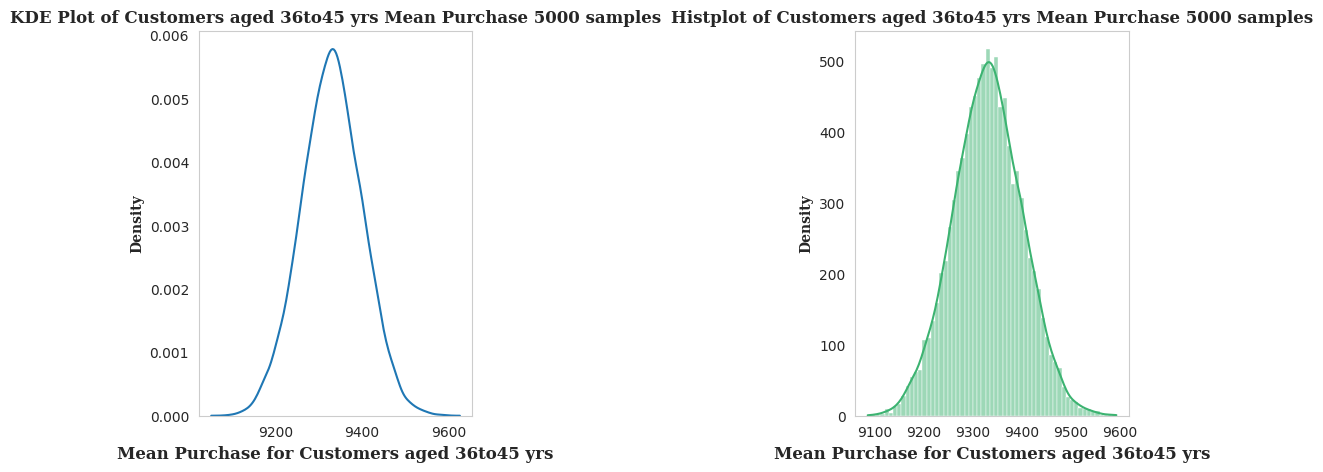

In [229]:
# Computing means through bootstrapping
cust_36to45_years_mean_purch_5000_samp = []
for i in range(10000):
    bootstraped_sample = np.random.choice(df_age_36to45_cust_purch, size = 5000)
    bootstraped_mean = np.mean(bootstraped_sample)
    cust_36to45_years_mean_purch_5000_samp.append(bootstraped_mean)

# Calculating CI at 90%,95% and 99%
CI_36to45_years_cust_90_pct = np.percentile(cust_36to45_years_mean_purch_5000_samp,[5,95])
CI_36to45_years_cust_95_pct = np.percentile(cust_36to45_years_mean_purch_5000_samp,[2.5,97.5])
CI_36to45_years_cust_99_pct = np.percentile(cust_36to45_years_mean_purch_5000_samp,[0.5,99.5])

print(f'CI for customers aged 36 to 45 years at 90% for a sample size of 5000: [{np.round(CI_36to45_years_cust_90_pct[0],2)} , {np.round(CI_36to45_years_cust_90_pct[1],2)}]')
print(f'CI for customers aged 36 to 45 years at 95% for a sample size of 5000: [{np.round(CI_36to45_years_cust_95_pct[0],2)} , {np.round(CI_36to45_years_cust_95_pct[1],2)}]')
print(f'CI for customers aged 36 to 45 years at 99% for a sample size of 5000: [{np.round(CI_36to45_years_cust_99_pct[0],2)} , {np.round(CI_36to45_years_cust_99_pct[1],2)}]')
print("\n")

std_error_cust_36to45_years_5000_samples = (df_age_36to45_cust_purch.std() / np.sqrt(5000))
print(f'Standard error for customers aged 36 to 45 years for a sample size of 5000: {np.round(std_error_cust_36to45_years_5000_samples,2)}')

# Standard error using bootstraping
print(f'Standard error for customers aged 36 to 45 years for a sample size of 5000 using bootstrapping: {np.round(pd.Series(cust_36to45_years_mean_purch_5000_samp).std(),2)}')
print("\n")

# Visualizing the CI for customers aged 36 to 45 years for a sample size of 5000 with a KDE plot and a histplot
sns.set_style("whitegrid")
plt.figure(figsize = (12,5))

plt.subplot(1,3,1)
sns.kdeplot(cust_36to45_years_mean_purch_5000_samp)
plt.title('KDE Plot of Customers aged 36to45 yrs Mean Purchase 5000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 36to45 yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.subplot(1,3,3)
sns.histplot(cust_36to45_years_mean_purch_5000_samp, kde = True, color = 'mediumseagreen')
plt.title('Histplot of Customers aged 36to45 yrs Mean Purchase 5000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 36to45 yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.show()

# **Part D3: Age Group - 46-50 Years**

In [230]:
# CLT and CI for Customers aged 46-50 Years
df_age_46to50_cust_purch = df[df['Age'] == '46-50']['Purchase']
df_age_46to50_cust_purch

6         19215
7         15854
8         15686
52         5839
53        15912
          ...  
550041      488
550043       48
550052      239
550062      473
550067      490
Name: Purchase, Length: 45701, dtype: int64

In [231]:
print("Mean of the purchase amounts for customers aged 46-50 years: ", df_age_46to50_cust_purch.mean())

Mean of the purchase amounts for customers aged 46-50 years:  9208.625697468327


# **Sample size 1000 and computing means through bootstraping**

CI for customers aged 46 to 50 years at 90% for a sample size of 1000: [8952.91 , 9469.59]
CI for customers aged 46 to 50 years at 95% for a sample size of 1000: [8903.69 , 9522.13]
CI for customers aged 46 to 50 years at 99% for a sample size of 1000: [8807.57 , 9621.65]


Standard error for customers aged 46 to 50 years for a sample size of 1000: 157.08
Standard error for customers aged 46 to 50 years for a sample size of 1000 using bootstrapping: 157.79




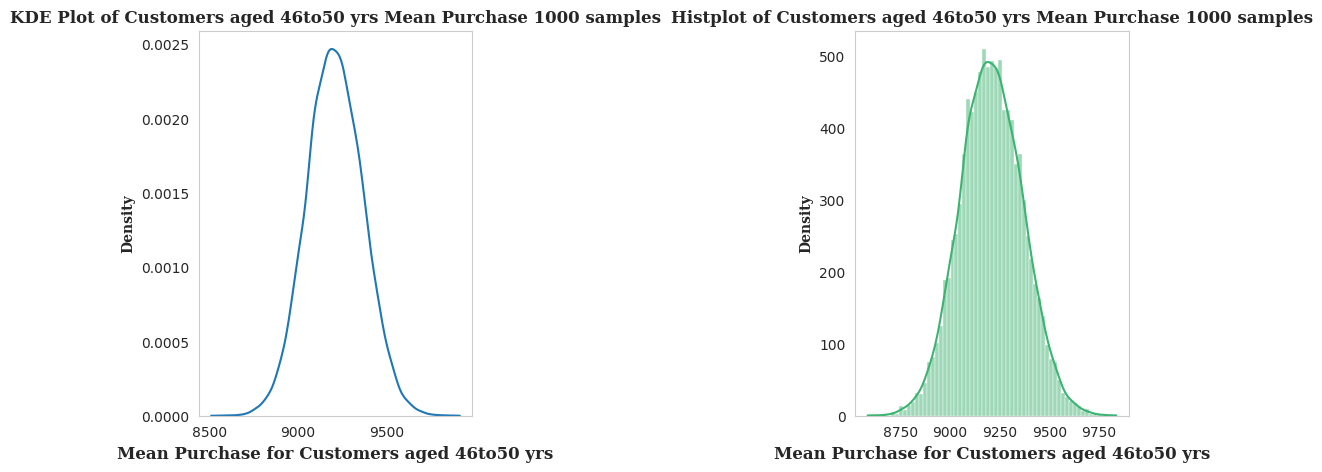

In [232]:
# Computing means through bootstrapping
cust_46to50_years_mean_purch_1000_samp = []
for i in range(10000):
    bootstraped_sample = np.random.choice(df_age_46to50_cust_purch, size = 1000)
    bootstraped_mean = np.mean(bootstraped_sample)
    cust_46to50_years_mean_purch_1000_samp.append(bootstraped_mean)

# Calculating CI at 90%,95% and 99%
CI_46to50_years_cust_90_pct = np.percentile(cust_46to50_years_mean_purch_1000_samp,[5,95])
CI_46to50_years_cust_95_pct = np.percentile(cust_46to50_years_mean_purch_1000_samp,[2.5,97.5])
CI_46to50_years_cust_99_pct = np.percentile(cust_46to50_years_mean_purch_1000_samp,[0.5,99.5])

print(f'CI for customers aged 46 to 50 years at 90% for a sample size of 1000: [{np.round(CI_46to50_years_cust_90_pct[0],2)} , {np.round(CI_46to50_years_cust_90_pct[1],2)}]')
print(f'CI for customers aged 46 to 50 years at 95% for a sample size of 1000: [{np.round(CI_46to50_years_cust_95_pct[0],2)} , {np.round(CI_46to50_years_cust_95_pct[1],2)}]')
print(f'CI for customers aged 46 to 50 years at 99% for a sample size of 1000: [{np.round(CI_46to50_years_cust_99_pct[0],2)} , {np.round(CI_46to50_years_cust_99_pct[1],2)}]')
print("\n")

std_error_cust_46to50_years_1000_samples = (df_age_46to50_cust_purch.std() / np.sqrt(1000))
print(f'Standard error for customers aged 46 to 50 years for a sample size of 1000: {np.round(std_error_cust_46to50_years_1000_samples,2)}')

# Standard error using bootstraping
print(f'Standard error for customers aged 46 to 50 years for a sample size of 1000 using bootstrapping: {np.round(pd.Series(cust_46to50_years_mean_purch_1000_samp).std(),2)}')
print("\n")

# Visualizing the CI for customers aged 46 to 50 years for a sample size of 1000 with a KDE plot and a histplot
sns.set_style("whitegrid")
plt.figure(figsize = (12,5))

plt.subplot(1,3,1)
sns.kdeplot(cust_46to50_years_mean_purch_1000_samp)
plt.title('KDE Plot of Customers aged 46to50 yrs Mean Purchase 1000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 46to50 yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.subplot(1,3,3)
sns.histplot(cust_46to50_years_mean_purch_1000_samp, kde = True, color = 'mediumseagreen')
plt.title('Histplot of Customers aged 46to50 yrs Mean Purchase 1000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 46to50 yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.show()

# **Sample size 2500 and computing means through bootstraping**

CI for customers aged 46 to 50 years at 90% for a sample size of 2500: [9047.28 , 9372.56]
CI for customers aged 46 to 50 years at 95% for a sample size of 2500: [9014.2 , 9404.22]
CI for customers aged 46 to 50 years at 99% for a sample size of 2500: [8949.04 , 9470.47]


Standard error for customers aged 46 to 50 years for a sample size of 2500: 99.34
Standard error for customers aged 46 to 50 years for a sample size of 2500 using bootstrapping: 99.57




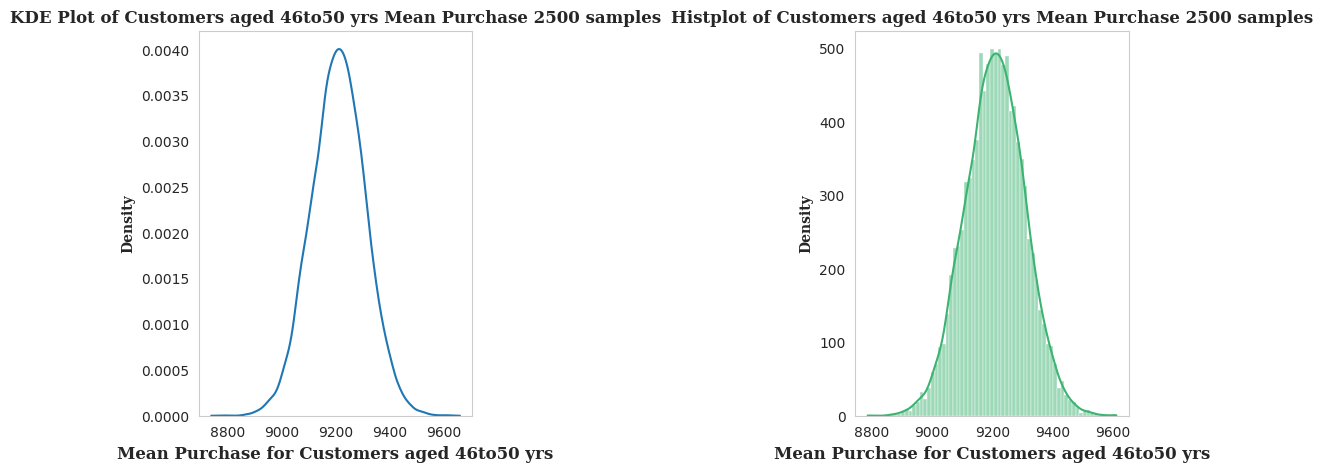

In [233]:
# Computing means through bootstrapping
cust_46to50_years_mean_purch_2500_samp = []
for i in range(10000):
    bootstraped_sample = np.random.choice(df_age_46to50_cust_purch, size = 2500)
    bootstraped_mean = np.mean(bootstraped_sample)
    cust_46to50_years_mean_purch_2500_samp.append(bootstraped_mean)

# Calculating CI at 90%,95% and 99%
CI_46to50_years_cust_90_pct = np.percentile(cust_46to50_years_mean_purch_2500_samp,[5,95])
CI_46to50_years_cust_95_pct = np.percentile(cust_46to50_years_mean_purch_2500_samp,[2.5,97.5])
CI_46to50_years_cust_99_pct = np.percentile(cust_46to50_years_mean_purch_2500_samp,[0.5,99.5])

print(f'CI for customers aged 46 to 50 years at 90% for a sample size of 2500: [{np.round(CI_46to50_years_cust_90_pct[0],2)} , {np.round(CI_46to50_years_cust_90_pct[1],2)}]')
print(f'CI for customers aged 46 to 50 years at 95% for a sample size of 2500: [{np.round(CI_46to50_years_cust_95_pct[0],2)} , {np.round(CI_46to50_years_cust_95_pct[1],2)}]')
print(f'CI for customers aged 46 to 50 years at 99% for a sample size of 2500: [{np.round(CI_46to50_years_cust_99_pct[0],2)} , {np.round(CI_46to50_years_cust_99_pct[1],2)}]')
print("\n")

std_error_cust_46to50_years_2500_samples = (df_age_46to50_cust_purch.std() / np.sqrt(2500))
print(f'Standard error for customers aged 46 to 50 years for a sample size of 2500: {np.round(std_error_cust_46to50_years_2500_samples,2)}')

# Standard error using bootstraping
print(f'Standard error for customers aged 46 to 50 years for a sample size of 2500 using bootstrapping: {np.round(pd.Series(cust_46to50_years_mean_purch_2500_samp).std(),2)}')
print("\n")

# Visualizing the CI for customers aged 46 to 50 years for a sample size of 2500 with a KDE plot and a histplot
sns.set_style("whitegrid")
plt.figure(figsize = (12,5))

plt.subplot(1,3,1)
sns.kdeplot(cust_46to50_years_mean_purch_2500_samp)
plt.title('KDE Plot of Customers aged 46to50 yrs Mean Purchase 2500 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 46to50 yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.subplot(1,3,3)
sns.histplot(cust_46to50_years_mean_purch_2500_samp, kde = True, color = 'mediumseagreen')
plt.title('Histplot of Customers aged 46to50 yrs Mean Purchase 2500 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 46to50 yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.show()

# **Sample size 5000 and computing means through bootstraping**

CI for customers aged 46 to 50 years at 90% for a sample size of 5000: [9093.76 , 9325.18]
CI for customers aged 46 to 50 years at 95% for a sample size of 5000: [9070.96 , 9348.5]
CI for customers aged 46 to 50 years at 99% for a sample size of 5000: [9028.04 , 9388.01]


Standard error for customers aged 46 to 50 years for a sample size of 5000: 70.25
Standard error for customers aged 46 to 50 years for a sample size of 5000 using bootstrapping: 70.3




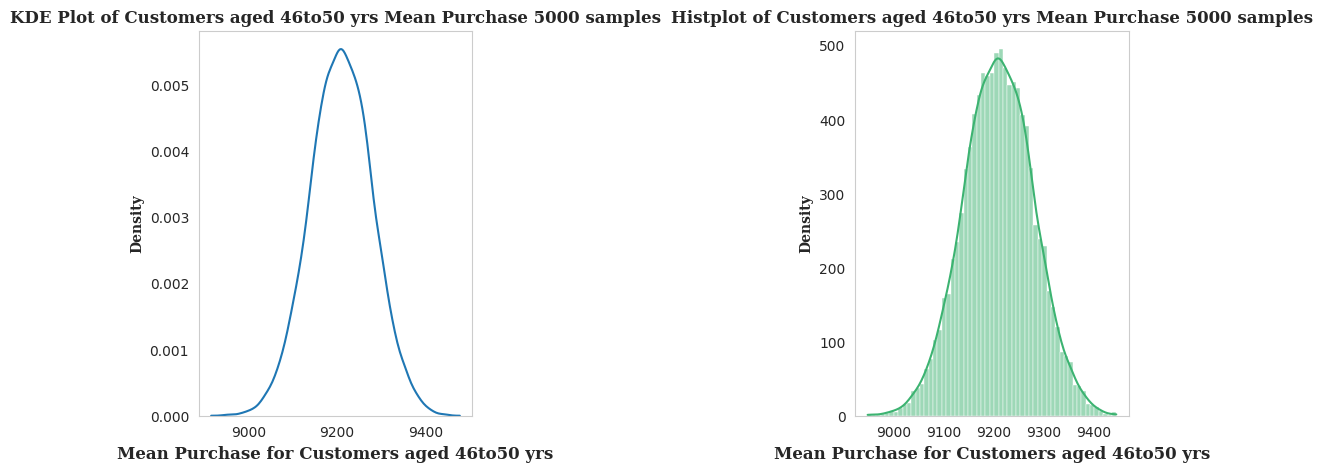

In [234]:
# Computing means through bootstrapping
cust_46to50_years_mean_purch_5000_samp = []
for i in range(10000):
    bootstraped_sample = np.random.choice(df_age_46to50_cust_purch, size = 5000)
    bootstraped_mean = np.mean(bootstraped_sample)
    cust_46to50_years_mean_purch_5000_samp.append(bootstraped_mean)

# Calculating CI at 90%,95% and 99%
CI_46to50_years_cust_90_pct = np.percentile(cust_46to50_years_mean_purch_5000_samp,[5,95])
CI_46to50_years_cust_95_pct = np.percentile(cust_46to50_years_mean_purch_5000_samp,[2.5,97.5])
CI_46to50_years_cust_99_pct = np.percentile(cust_46to50_years_mean_purch_5000_samp,[0.5,99.5])

print(f'CI for customers aged 46 to 50 years at 90% for a sample size of 5000: [{np.round(CI_46to50_years_cust_90_pct[0],2)} , {np.round(CI_46to50_years_cust_90_pct[1],2)}]')
print(f'CI for customers aged 46 to 50 years at 95% for a sample size of 5000: [{np.round(CI_46to50_years_cust_95_pct[0],2)} , {np.round(CI_46to50_years_cust_95_pct[1],2)}]')
print(f'CI for customers aged 46 to 50 years at 99% for a sample size of 5000: [{np.round(CI_46to50_years_cust_99_pct[0],2)} , {np.round(CI_46to50_years_cust_99_pct[1],2)}]')
print("\n")

std_error_cust_46to50_years_5000_samples = (df_age_46to50_cust_purch.std() / np.sqrt(5000))
print(f'Standard error for customers aged 46 to 50 years for a sample size of 5000: {np.round(std_error_cust_46to50_years_5000_samples,2)}')

# Standard error using bootstraping
print(f'Standard error for customers aged 46 to 50 years for a sample size of 5000 using bootstrapping: {np.round(pd.Series(cust_46to50_years_mean_purch_5000_samp).std(),2)}')
print("\n")

# Visualizing the CI for customers aged 46 to 50 years for a sample size of 5000 with a KDE plot and a histplot
sns.set_style("whitegrid")
plt.figure(figsize = (12,5))

plt.subplot(1,3,1)
sns.kdeplot(cust_46to50_years_mean_purch_5000_samp)
plt.title('KDE Plot of Customers aged 46to50 yrs Mean Purchase 5000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 46to50 yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.subplot(1,3,3)
sns.histplot(cust_46to50_years_mean_purch_5000_samp, kde = True, color = 'mediumseagreen')
plt.title('Histplot of Customers aged 46to50 yrs Mean Purchase 5000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 46to50 yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.show()

# **Part D3: Age Group - 51-55 Years**

In [235]:
# CLT and CI for Customers aged 51-55 Years
df_age_51to55_cust_purch = df[df['Age'] == '51-55']['Purchase']
df_age_51to55_cust_purch

14         5378
15         2079
16        13055
17         8851
67        15872
          ...  
549985       24
550004       12
550037       62
550042      243
550063      368
Name: Purchase, Length: 38501, dtype: int64

In [236]:
print("Mean of the purchase amounts for customers aged 51-55 years: ", df_age_51to55_cust_purch.mean())

Mean of the purchase amounts for customers aged 51-55 years:  9534.808030960236


# **Sample size 1000 and computing means through bootstraping**

CI for customers aged 51 to 55 years at 90% for a sample size of 1000: [9271.7 , 9795.22]
CI for customers aged 51 to 55 years at 95% for a sample size of 1000: [9219.91 , 9851.05]
CI for customers aged 51 to 55 years at 99% for a sample size of 1000: [9127.21 , 9948.9]


Standard error for customers aged 51 to 55 years for a sample size of 1000: 160.88
Standard error for customers aged 51 to 55 years for a sample size of 1000 using bootstrapping: 159.41




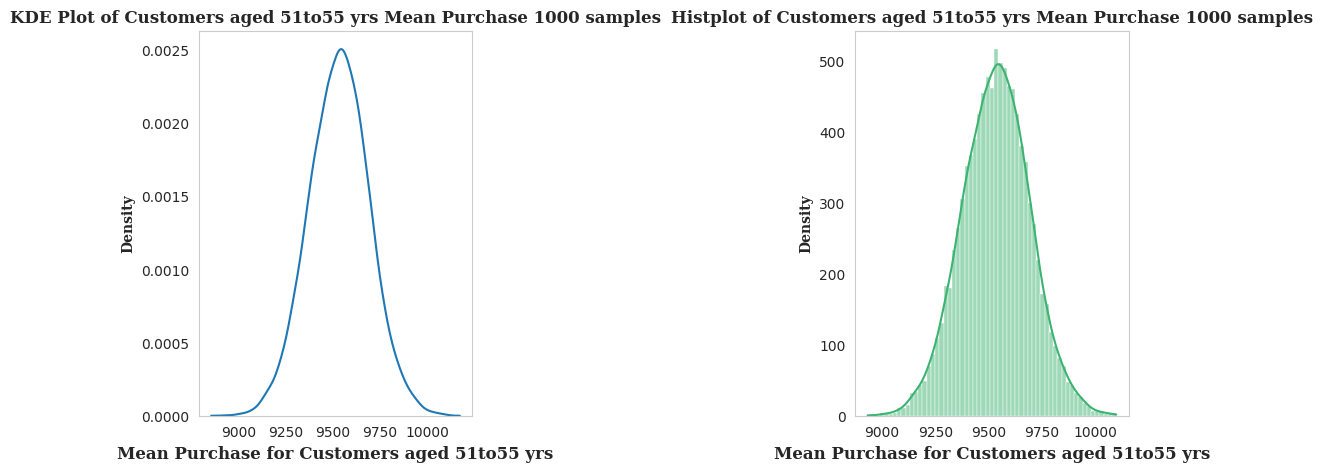

In [237]:
# Computing means through bootstrapping
cust_51to55_years_mean_purch_1000_samp = []
for i in range(10000):
    bootstraped_sample = np.random.choice(df_age_51to55_cust_purch, size = 1000)
    bootstraped_mean = np.mean(bootstraped_sample)
    cust_51to55_years_mean_purch_1000_samp.append(bootstraped_mean)

# Calculating CI at 90%,95% and 99%
CI_51to55_years_cust_90_pct = np.percentile(cust_51to55_years_mean_purch_1000_samp,[5,95])
CI_51to55_years_cust_95_pct = np.percentile(cust_51to55_years_mean_purch_1000_samp,[2.5,97.5])
CI_51to55_years_cust_99_pct = np.percentile(cust_51to55_years_mean_purch_1000_samp,[0.5,99.5])

print(f'CI for customers aged 51 to 55 years at 90% for a sample size of 1000: [{np.round(CI_51to55_years_cust_90_pct[0],2)} , {np.round(CI_51to55_years_cust_90_pct[1],2)}]')
print(f'CI for customers aged 51 to 55 years at 95% for a sample size of 1000: [{np.round(CI_51to55_years_cust_95_pct[0],2)} , {np.round(CI_51to55_years_cust_95_pct[1],2)}]')
print(f'CI for customers aged 51 to 55 years at 99% for a sample size of 1000: [{np.round(CI_51to55_years_cust_99_pct[0],2)} , {np.round(CI_51to55_years_cust_99_pct[1],2)}]')
print("\n")

std_error_cust_51to55_years_1000_samples = (df_age_51to55_cust_purch.std() / np.sqrt(1000))
print(f'Standard error for customers aged 51 to 55 years for a sample size of 1000: {np.round(std_error_cust_51to55_years_1000_samples,2)}')

# Standard error using bootstraping
print(f'Standard error for customers aged 51 to 55 years for a sample size of 1000 using bootstrapping: {np.round(pd.Series(cust_51to55_years_mean_purch_1000_samp).std(),2)}')
print("\n")

# Visualizing the CI for customers aged 51 to 55 years for a sample size of 1000 with a KDE plot and a histplot
sns.set_style("whitegrid")
plt.figure(figsize = (12,5))

plt.subplot(1,3,1)
sns.kdeplot(cust_51to55_years_mean_purch_1000_samp)
plt.title('KDE Plot of Customers aged 51to55 yrs Mean Purchase 1000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 51to55 yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.subplot(1,3,3)
sns.histplot(cust_51to55_years_mean_purch_1000_samp, kde = True, color = 'mediumseagreen')
plt.title('Histplot of Customers aged 51to55 yrs Mean Purchase 1000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 51to55 yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.show()

# **Sample size 2500 and computing means through bootstraping**

CI for customers aged 51 to 55 years at 90% for a sample size of 2500: [9366.58 , 9703.17]
CI for customers aged 51 to 55 years at 95% for a sample size of 2500: [9334.04 , 9735.73]
CI for customers aged 51 to 55 years at 99% for a sample size of 2500: [9276.09 , 9791.55]


Standard error for customers aged 51 to 55 years for a sample size of 2500: 101.75
Standard error for customers aged 51 to 55 years for a sample size of 2500 using bootstrapping: 101.69




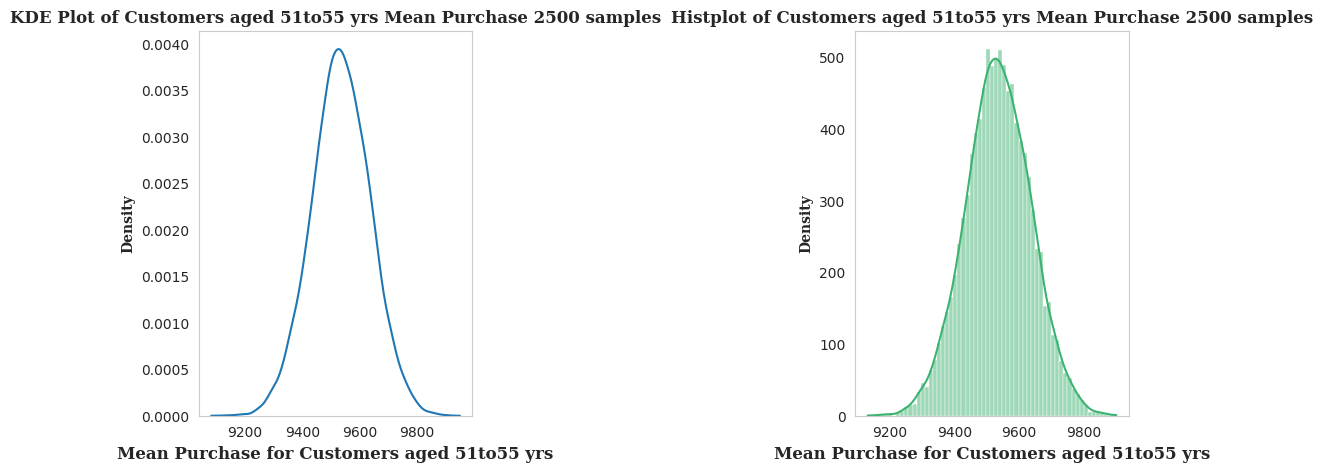

In [238]:
# Computing means through bootstrapping
cust_51to55_years_mean_purch_2500_samp = []
for i in range(10000):
    bootstraped_sample = np.random.choice(df_age_51to55_cust_purch, size = 2500)
    bootstraped_mean = np.mean(bootstraped_sample)
    cust_51to55_years_mean_purch_2500_samp.append(bootstraped_mean)

# Calculating CI at 90%,95% and 99%
CI_51to55_years_cust_90_pct = np.percentile(cust_51to55_years_mean_purch_2500_samp,[5,95])
CI_51to55_years_cust_95_pct = np.percentile(cust_51to55_years_mean_purch_2500_samp,[2.5,97.5])
CI_51to55_years_cust_99_pct = np.percentile(cust_51to55_years_mean_purch_2500_samp,[0.5,99.5])

print(f'CI for customers aged 51 to 55 years at 90% for a sample size of 2500: [{np.round(CI_51to55_years_cust_90_pct[0],2)} , {np.round(CI_51to55_years_cust_90_pct[1],2)}]')
print(f'CI for customers aged 51 to 55 years at 95% for a sample size of 2500: [{np.round(CI_51to55_years_cust_95_pct[0],2)} , {np.round(CI_51to55_years_cust_95_pct[1],2)}]')
print(f'CI for customers aged 51 to 55 years at 99% for a sample size of 2500: [{np.round(CI_51to55_years_cust_99_pct[0],2)} , {np.round(CI_51to55_years_cust_99_pct[1],2)}]')
print("\n")

std_error_cust_51to55_years_2500_samples = (df_age_51to55_cust_purch.std() / np.sqrt(2500))
print(f'Standard error for customers aged 51 to 55 years for a sample size of 2500: {np.round(std_error_cust_51to55_years_2500_samples,2)}')

# Standard error using bootstraping
print(f'Standard error for customers aged 51 to 55 years for a sample size of 2500 using bootstrapping: {np.round(pd.Series(cust_51to55_years_mean_purch_2500_samp).std(),2)}')
print("\n")

# Visualizing the CI for customers aged 51 to 55 years for a sample size of 2500 with a KDE plot and a histplot
sns.set_style("whitegrid")
plt.figure(figsize = (12,5))

plt.subplot(1,3,1)
sns.kdeplot(cust_51to55_years_mean_purch_2500_samp)
plt.title('KDE Plot of Customers aged 51to55 yrs Mean Purchase 2500 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 51to55 yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.subplot(1,3,3)
sns.histplot(cust_51to55_years_mean_purch_2500_samp, kde = True, color = 'mediumseagreen')
plt.title('Histplot of Customers aged 51to55 yrs Mean Purchase 2500 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 51to55 yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.show()

# **Sample size 5000 and computing means through bootstraping**

CI for customers aged 51 to 55 years at 90% for a sample size of 5000: [9415.75 , 9652.2]
CI for customers aged 51 to 55 years at 95% for a sample size of 5000: [9393.33 , 9674.3]
CI for customers aged 51 to 55 years at 99% for a sample size of 5000: [9345.44 , 9716.45]


Standard error for customers aged 51 to 55 years for a sample size of 5000: 71.95
Standard error for customers aged 51 to 55 years for a sample size of 5000 using bootstrapping: 71.84




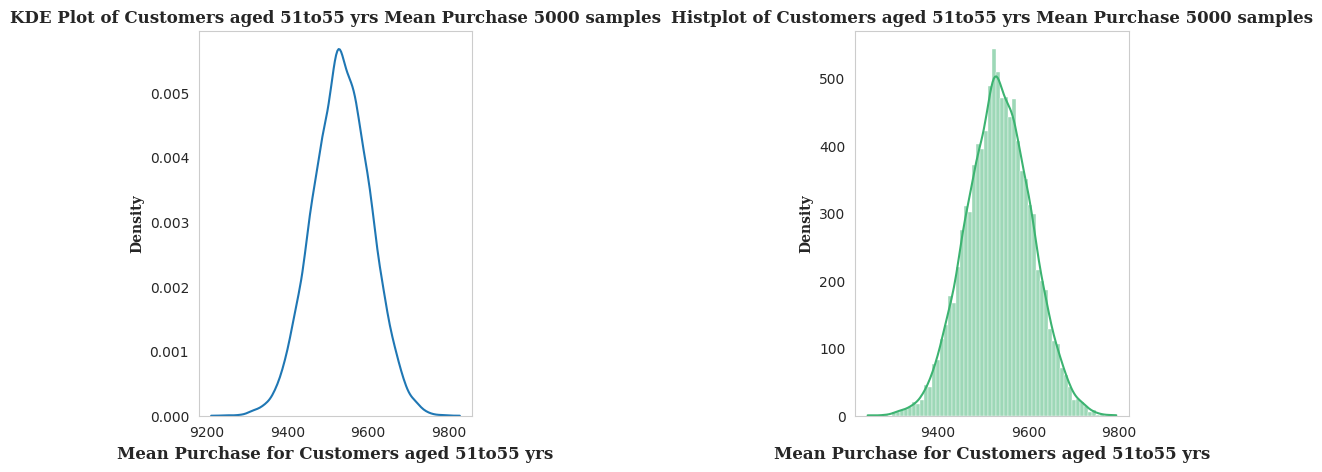

In [239]:
# Computing means through bootstrapping
cust_51to55_years_mean_purch_5000_samp = []
for i in range(10000):
    bootstraped_sample = np.random.choice(df_age_51to55_cust_purch, size = 5000)
    bootstraped_mean = np.mean(bootstraped_sample)
    cust_51to55_years_mean_purch_5000_samp.append(bootstraped_mean)

# Calculating CI at 90%,95% and 99%
CI_51to55_years_cust_90_pct = np.percentile(cust_51to55_years_mean_purch_5000_samp,[5,95])
CI_51to55_years_cust_95_pct = np.percentile(cust_51to55_years_mean_purch_5000_samp,[2.5,97.5])
CI_51to55_years_cust_99_pct = np.percentile(cust_51to55_years_mean_purch_5000_samp,[0.5,99.5])

print(f'CI for customers aged 51 to 55 years at 90% for a sample size of 5000: [{np.round(CI_51to55_years_cust_90_pct[0],2)} , {np.round(CI_51to55_years_cust_90_pct[1],2)}]')
print(f'CI for customers aged 51 to 55 years at 95% for a sample size of 5000: [{np.round(CI_51to55_years_cust_95_pct[0],2)} , {np.round(CI_51to55_years_cust_95_pct[1],2)}]')
print(f'CI for customers aged 51 to 55 years at 99% for a sample size of 5000: [{np.round(CI_51to55_years_cust_99_pct[0],2)} , {np.round(CI_51to55_years_cust_99_pct[1],2)}]')
print("\n")

std_error_cust_51to55_years_5000_samples = (df_age_51to55_cust_purch.std() / np.sqrt(5000))
print(f'Standard error for customers aged 51 to 55 years for a sample size of 5000: {np.round(std_error_cust_51to55_years_5000_samples,2)}')

# Standard error using bootstraping
print(f'Standard error for customers aged 51 to 55 years for a sample size of 5000 using bootstrapping: {np.round(pd.Series(cust_51to55_years_mean_purch_5000_samp).std(),2)}')
print("\n")

# Visualizing the CI for customers aged 51 to 55 years for a sample size of 5000 with a KDE plot and a histplot
sns.set_style("whitegrid")
plt.figure(figsize = (12,5))

plt.subplot(1,3,1)
sns.kdeplot(cust_51to55_years_mean_purch_5000_samp)
plt.title('KDE Plot of Customers aged 51to55 yrs Mean Purchase 5000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 51to55 yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.subplot(1,3,3)
sns.histplot(cust_51to55_years_mean_purch_5000_samp, kde = True, color = 'mediumseagreen')
plt.title('Histplot of Customers aged 51to55 yrs Mean Purchase 5000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 51to55 yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.show()

# **Part D3: Age Group - 55+ Years**

In [240]:
# CLT and CI for Customers aged 55+ Years
df_age_55plus_cust_purch = df[df['Age'] == '55+']['Purchase']
df_age_55plus_cust_purch

4          7969
159        8596
160        5248
161       10592
162        3482
          ...  
549925      121
549989       12
550008       50
550030      376
550066      365
Name: Purchase, Length: 21504, dtype: int64

In [241]:
print("Mean of the purchase amounts for customers aged 55+ years: ", df_age_55plus_cust_purch.mean())

Mean of the purchase amounts for customers aged 55+ years:  9336.280459449405


# **Sample size 1000 and computing means through bootstraping**

CI for customers aged 55 plus years at 90% for a sample size of 1000: [9069.91 , 9592.37]
CI for customers aged 55 plus years at 95% for a sample size of 1000: [9023.16 , 9643.76]
CI for customers aged 55 plus years at 99% for a sample size of 1000: [8914.79 , 9739.28]


Standard error for customers aged 55 plus years for a sample size of 1000: 158.48
Standard error for customers aged 55 plus years for a sample size of 1000 using bootstrapping: 159.47




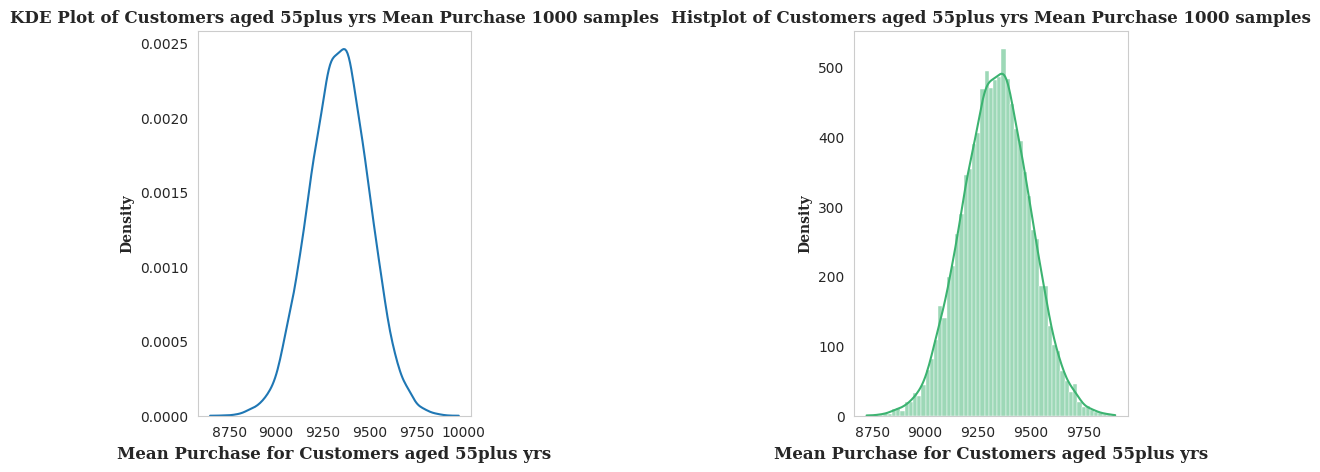

In [242]:
# Computing means through bootstrapping
cust_55plus_years_mean_purch_1000_samp = []
for i in range(10000):
    bootstraped_sample = np.random.choice(df_age_55plus_cust_purch, size = 1000)
    bootstraped_mean = np.mean(bootstraped_sample)
    cust_55plus_years_mean_purch_1000_samp.append(bootstraped_mean)

# Calculating CI at 90%,95% and 99%
CI_55plus_years_cust_90_pct = np.percentile(cust_55plus_years_mean_purch_1000_samp,[5,95])
CI_55plus_years_cust_95_pct = np.percentile(cust_55plus_years_mean_purch_1000_samp,[2.5,97.5])
CI_55plus_years_cust_99_pct = np.percentile(cust_55plus_years_mean_purch_1000_samp,[0.5,99.5])

print(f'CI for customers aged 55 plus years at 90% for a sample size of 1000: [{np.round(CI_55plus_years_cust_90_pct[0],2)} , {np.round(CI_55plus_years_cust_90_pct[1],2)}]')
print(f'CI for customers aged 55 plus years at 95% for a sample size of 1000: [{np.round(CI_55plus_years_cust_95_pct[0],2)} , {np.round(CI_55plus_years_cust_95_pct[1],2)}]')
print(f'CI for customers aged 55 plus years at 99% for a sample size of 1000: [{np.round(CI_55plus_years_cust_99_pct[0],2)} , {np.round(CI_55plus_years_cust_99_pct[1],2)}]')
print("\n")

std_error_cust_55plus_years_1000_samples = (df_age_55plus_cust_purch.std() / np.sqrt(1000))
print(f'Standard error for customers aged 55 plus years for a sample size of 1000: {np.round(std_error_cust_55plus_years_1000_samples,2)}')

# Standard error using bootstraping
print(f'Standard error for customers aged 55 plus years for a sample size of 1000 using bootstrapping: {np.round(pd.Series(cust_55plus_years_mean_purch_1000_samp).std(),2)}')
print("\n")

# Visualizing the CI for customers aged 55 plus years for a sample size of 1000 with a KDE plot and a histplot
sns.set_style("whitegrid")
plt.figure(figsize = (12,5))

plt.subplot(1,3,1)
sns.kdeplot(cust_55plus_years_mean_purch_1000_samp)
plt.title('KDE Plot of Customers aged 55plus yrs Mean Purchase 1000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 55plus yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.subplot(1,3,3)
sns.histplot(cust_55plus_years_mean_purch_1000_samp, kde = True, color = 'mediumseagreen')
plt.title('Histplot of Customers aged 55plus yrs Mean Purchase 1000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 55plus yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.show()

# **Sample size 2500 and computing means through bootstraping**

CI for customers aged 55 plus years at 90% for a sample size of 2500: [9171.45 , 9501.14]
CI for customers aged 55 plus years at 95% for a sample size of 2500: [9143.82 , 9530.42]
CI for customers aged 55 plus years at 99% for a sample size of 2500: [9081.37 , 9599.31]


Standard error for customers aged 55 plus years for a sample size of 2500: 100.23
Standard error for customers aged 55 plus years for a sample size of 2500 using bootstrapping: 99.9




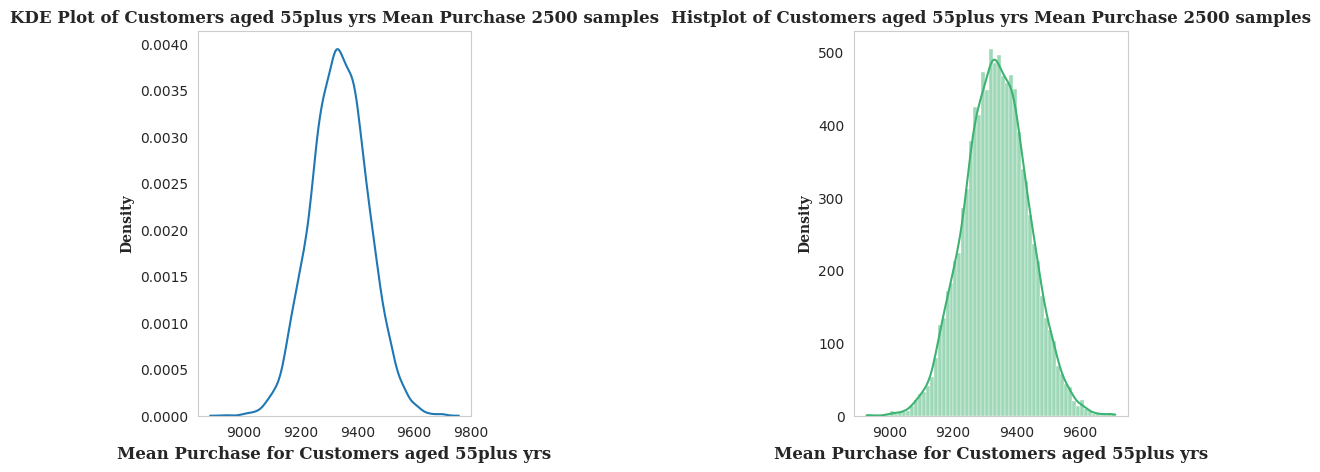

In [243]:
# Computing means through bootstrapping
cust_55plus_years_mean_purch_2500_samp = []
for i in range(10000):
    bootstraped_sample = np.random.choice(df_age_55plus_cust_purch, size = 2500)
    bootstraped_mean = np.mean(bootstraped_sample)
    cust_55plus_years_mean_purch_2500_samp.append(bootstraped_mean)

# Calculating CI at 90%,95% and 99%
CI_55plus_years_cust_90_pct = np.percentile(cust_55plus_years_mean_purch_2500_samp,[5,95])
CI_55plus_years_cust_95_pct = np.percentile(cust_55plus_years_mean_purch_2500_samp,[2.5,97.5])
CI_55plus_years_cust_99_pct = np.percentile(cust_55plus_years_mean_purch_2500_samp,[0.5,99.5])

print(f'CI for customers aged 55 plus years at 90% for a sample size of 2500: [{np.round(CI_55plus_years_cust_90_pct[0],2)} , {np.round(CI_55plus_years_cust_90_pct[1],2)}]')
print(f'CI for customers aged 55 plus years at 95% for a sample size of 2500: [{np.round(CI_55plus_years_cust_95_pct[0],2)} , {np.round(CI_55plus_years_cust_95_pct[1],2)}]')
print(f'CI for customers aged 55 plus years at 99% for a sample size of 2500: [{np.round(CI_55plus_years_cust_99_pct[0],2)} , {np.round(CI_55plus_years_cust_99_pct[1],2)}]')
print("\n")

std_error_cust_55plus_years_2500_samples = (df_age_55plus_cust_purch.std() / np.sqrt(2500))
print(f'Standard error for customers aged 55 plus years for a sample size of 2500: {np.round(std_error_cust_55plus_years_2500_samples,2)}')

# Standard error using bootstraping
print(f'Standard error for customers aged 55 plus years for a sample size of 2500 using bootstrapping: {np.round(pd.Series(cust_55plus_years_mean_purch_2500_samp).std(),2)}')
print("\n")

# Visualizing the CI for customers aged 55 plus years for a sample size of 2500 with a KDE plot and a histplot
sns.set_style("whitegrid")
plt.figure(figsize = (12,5))

plt.subplot(1,3,1)
sns.kdeplot(cust_55plus_years_mean_purch_2500_samp)
plt.title('KDE Plot of Customers aged 55plus yrs Mean Purchase 2500 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 55plus yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.subplot(1,3,3)
sns.histplot(cust_55plus_years_mean_purch_2500_samp, kde = True, color = 'mediumseagreen')
plt.title('Histplot of Customers aged 55plus yrs Mean Purchase 2500 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 55plus yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.show()

# **Sample size 5000 and computing means through bootstraping**

CI for customers aged 55 plus years at 90% for a sample size of 5000: [9219.34 , 9455.71]
CI for customers aged 55 plus years at 95% for a sample size of 5000: [9195.77 , 9477.88]
CI for customers aged 55 plus years at 99% for a sample size of 5000: [9151.19 , 9521.41]


Standard error for customers aged 55 plus years for a sample size of 5000: 70.87
Standard error for customers aged 55 plus years for a sample size of 5000 using bootstrapping: 71.86




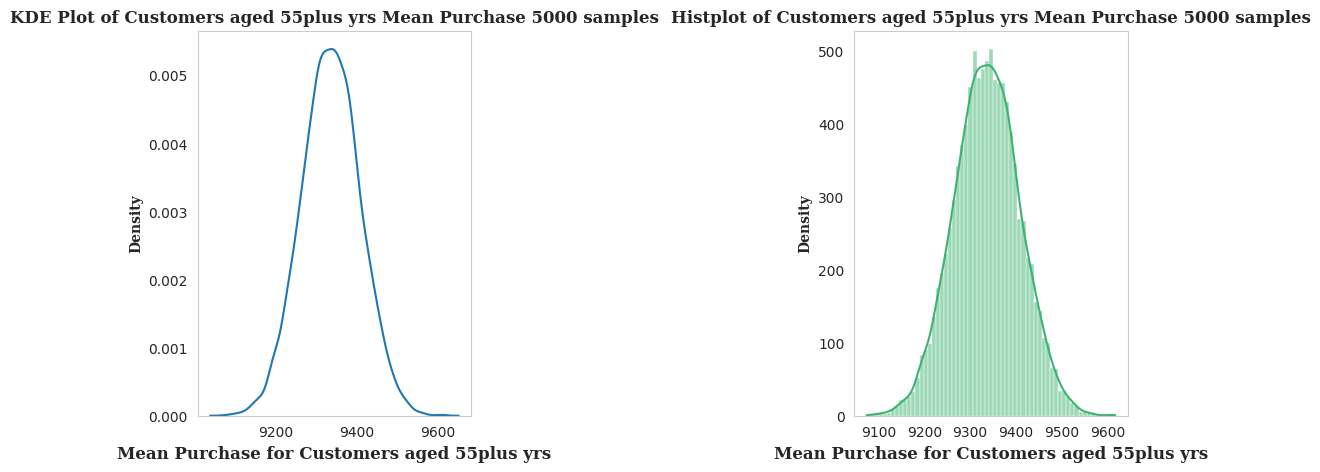

In [244]:
# Computing means through bootstrapping
cust_55plus_years_mean_purch_5000_samp = []
for i in range(10000):
    bootstraped_sample = np.random.choice(df_age_55plus_cust_purch, size = 5000)
    bootstraped_mean = np.mean(bootstraped_sample)
    cust_55plus_years_mean_purch_5000_samp.append(bootstraped_mean)

# Calculating CI at 90%,95% and 99%
CI_55plus_years_cust_90_pct = np.percentile(cust_55plus_years_mean_purch_5000_samp,[5,95])
CI_55plus_years_cust_95_pct = np.percentile(cust_55plus_years_mean_purch_5000_samp,[2.5,97.5])
CI_55plus_years_cust_99_pct = np.percentile(cust_55plus_years_mean_purch_5000_samp,[0.5,99.5])

print(f'CI for customers aged 55 plus years at 90% for a sample size of 5000: [{np.round(CI_55plus_years_cust_90_pct[0],2)} , {np.round(CI_55plus_years_cust_90_pct[1],2)}]')
print(f'CI for customers aged 55 plus years at 95% for a sample size of 5000: [{np.round(CI_55plus_years_cust_95_pct[0],2)} , {np.round(CI_55plus_years_cust_95_pct[1],2)}]')
print(f'CI for customers aged 55 plus years at 99% for a sample size of 5000: [{np.round(CI_55plus_years_cust_99_pct[0],2)} , {np.round(CI_55plus_years_cust_99_pct[1],2)}]')
print("\n")

std_error_cust_55plus_years_5000_samples = (df_age_55plus_cust_purch.std() / np.sqrt(5000))
print(f'Standard error for customers aged 55 plus years for a sample size of 5000: {np.round(std_error_cust_55plus_years_5000_samples,2)}')

# Standard error using bootstraping
print(f'Standard error for customers aged 55 plus years for a sample size of 5000 using bootstrapping: {np.round(pd.Series(cust_55plus_years_mean_purch_5000_samp).std(),2)}')
print("\n")

# Visualizing the CI for customers aged 55 plus years for a sample size of 5000 with a KDE plot and a histplot
sns.set_style("whitegrid")
plt.figure(figsize = (12,5))

plt.subplot(1,3,1)
sns.kdeplot(cust_55plus_years_mean_purch_5000_samp)
plt.title('KDE Plot of Customers aged 55plus yrs Mean Purchase 5000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 55plus yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.subplot(1,3,3)
sns.histplot(cust_55plus_years_mean_purch_5000_samp, kde = True, color = 'mediumseagreen')
plt.title('Histplot of Customers aged 55plus yrs Mean Purchase 5000 samples', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.xlabel('Mean Purchase for Customers aged 55plus yrs', fontsize = 12, fontweight = 'bold', fontname = 'Serif')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold', fontname = 'Serif')
plt.grid(False)

plt.show()

# **Part E: Insights and Recommendations:**

**Observations on Genderwise Spending:**

1. 28% customers are Female and 72% customers are Male.

2. Male customers typically spend more on average than female customers. The confidence interval for male purchases shows a greater upper bound and a broader range than the confidence interval for female purchases, with male consumers initiating 75.3% of transactions and female customers 24.7%.

**Recommendations:**
1. Wide selection of products from clothing and beauty products to household essentials that align with the preferences and requirements of female customers.

2. Active feedback from customers to understand their preferences, concerns, and suggestions to make improvements that cater to their needs.

3. Loyalty programs, exclusive perks like discounts, early access to sales, and unique rewards can enhance engagement and attract customers.

**Observations on Marital Status wise Spending:**

1. The overlapping confidence intervals of average spending for married and unmarried customers indicate that both male and female customers spend a similar amount per transaction and a resemblance in spending behavior between the two.

**Recommendations:**

1. Enhance the shopping experience for both married and unmarried customers Unified category evn by treating both categories as unified for more effective results.

**Observations on CLT and CI for Gender, Marital Status and Age Category:**

1. As the sample size increases, the groups diverge and the standard error of the mean in the samples falls as the sample size increases.

2. The mean purchase value by gender, calculated using confidence interval 90%, has a similar trend to that obtained using confidence intervals 95% and 99%.

3. The spread increases as the confidence percentage does. There is an overlap in the spending patterns of married and unmarried customers, suggesting that consumers spend the same amount whether they are married or not.

**Observations on Age Group wise Spending:**

1. Spending by Age_group 0-17 is low compared to other age groups. Customers in Age_group 51-55 spend the most.

**Recommendations:**

1. Toys, clothing, electronics, books, school supplies, and other items that appeal to children and teenagers should be available in a variety of products that are both entertaining and suitable for their age.

2. Entertaining and safe play spaces where kids may do developmental activities through learning resources, craft kits, and educational toys.

3. Make Walmart the preferred shopping destination for kids and parents by introducing specific deals and discounts for the 0–17 age range.